In [72]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

## 1. Import Data

In [73]:
# Read the first 5 rows of dataset
df = pd.read_csv('/content/drive/MyDrive/Python/Data sets/NY-House-Dataset.csv')
df.head(5)

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [74]:
# Lower the column names to call easier
df.columns = ['brokertitle', 'type', 'price', 'beds', 'bath', 'property_sqft', 'address', 'state', 'main_address', 'admin_area_lev2', 'locality', 'sublocality', 'street_name', 'long_name','formatted_add', 'lat', 'long']

## 2. Insights from the Dataset

###<h3>2.1. Shape of dataset</h3>

In [75]:
# Check the number of observations and features
df.shape

(4801, 17)

###<h3>2.2. Last 5 rows </h3>

In [76]:
# Extract last 5 rows
df.tail(5)

brokertitle            type    price  \
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      beds  bath  property_sqft                    address  \
4796     1   1.0    2184.207862       222 E 80th St Apt 3A   
4797     1   1.0    2184.207862        97-40 62 Dr Unit Lg   
4798     1   1.0    2184.207862  427 W 21st St Unit Garden   
4799     2   1.0     655.000000   91-23 Corona Ave Unit 4G   
4800     1   1.0     750.000000    460 Neptune Ave Apt 14O   

                    state                                 main_address  \
4796  Manhattan, NY 10075      222 E 80th St Apt 3AManhattan, NY 10075   
4797  Rego Park, NY 11374       97-40 62 Dr Unit LgRego Park, NY 11374   
4798   New York, NY 10011  427 W 21st St Unit GardenNew York, NY 10011   
4799   Elmhurst, NY 11373   91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800   Brooklyn, NY 11224    460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     admin_area_lev2         locality      sublocality   street_name  \
4796        New York  New York County         New York     Manhattan   
4797   United States         New York    Queens County        Queens   
4798   United States         New York  New York County      New York   
4799        New York    Queens County           Queens      Flushing   
4800        New York     Kings County         Brooklyn  Coney Island   

             long_name                                   formatted_add  \
4796               222      222 E 80th St #3a, New York, NY 10075, USA   
4797        62nd Drive         97-40 62nd Dr, Rego Park, NY 11374, USA   
4798  West 21st Street          427 W 21st St, New York, NY 10011, USA   
4799             91-23  91-23 Corona Ave. #4b, Flushing, NY 11373, USA   
4800               460   460 Neptune Ave #14a, Brooklyn, NY 11224, USA   

            lat       long  
4796  40.774350 -73.955879  
4797  40.732538 -73.860152  
4798  40.745882 -74.003398  
4799  40.742770 -73.872752  
4800  40.579147 -73.970949

###<h3>2.3. Count of non-Null values and data types of each feature</h3>

In [77]:
# Extract the count of non-null values for each feature as well as its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brokertitle      4801 non-null   object 
 1   type             4801 non-null   object 
 2   price            4801 non-null   int64  
 3   beds             4801 non-null   int64  
 4   bath             4801 non-null   float64
 5   property_sqft    4801 non-null   float64
 6   address          4801 non-null   object 
 7   state            4801 non-null   object 
 8   main_address     4801 non-null   object 
 9   admin_area_lev2  4801 non-null   object 
 10  locality         4801 non-null   object 
 11  sublocality      4801 non-null   object 
 12  street_name      4801 non-null   object 
 13  long_name        4801 non-null   object 
 14  formatted_add    4801 non-null   object 
 15  lat              4801 non-null   float64
 16  long             4801 non-null   float64
dtypes: float64(4),

###<h3>2.4. Satatistics summary</h3>

In [78]:
# Check the statistics summary of entire dataset
df.describe(include = 'all')

brokertitle            type         price         beds  \
count                  4801            4801  4.801000e+03  4801.000000   
unique                 1036              13           NaN          NaN   
top     Brokered by COMPASS  Co-op for sale           NaN          NaN   
freq                    456            1450           NaN          NaN   
mean                    NaN             NaN  2.356940e+06     3.356801   
std                     NaN             NaN  3.135525e+07     2.602315   
min                     NaN             NaN  2.494000e+03     1.000000   
25%                     NaN             NaN  4.990000e+05     2.000000   
50%                     NaN             NaN  8.250000e+05     3.000000   
75%                     NaN             NaN  1.495000e+06     4.000000   
max                     NaN             NaN  2.147484e+09    50.000000   

               bath  property_sqft          address               state  \
count   4801.000000    4801.000000             4801                4801   
unique          NaN            NaN             4582                 308   
top             NaN            NaN  2619 Shore Pkwy  Brooklyn, NY 11235   
freq            NaN            NaN                3                 102   
mean       2.373861    2184.207862              NaN                 NaN   
std        1.946962    2377.140894              NaN                 NaN   
min        0.000000     230.000000              NaN                 NaN   
25%        1.000000    1200.000000              NaN                 NaN   
50%        2.000000    2184.207862              NaN                 NaN   
75%        3.000000    2184.207862              NaN                 NaN   
max       50.000000   65535.000000              NaN                 NaN   

                             main_address admin_area_lev2  locality  \
count                                4801            4801      4801   
unique                               4583              29        11   
top     2619 Shore PkwyBrooklyn, NY 11223   United States  New York   
freq                                    3            2484      2505   
mean                                  NaN             NaN       NaN   
std                                   NaN             NaN       NaN   
min                                   NaN             NaN       NaN   
25%                                   NaN             NaN       NaN   
50%                                   NaN             NaN       NaN   
75%                                   NaN             NaN       NaN   
max                                   NaN             NaN       NaN   

       sublocality street_name long_name  \
count         4801        4801      4801   
unique          21         174      2731   
top       New York   Manhattan         2   
freq          1016         979        20   
mean           NaN         NaN       NaN   
std            NaN         NaN       NaN   
min            NaN         NaN       NaN   
25%            NaN         NaN       NaN   
50%            NaN         NaN       NaN   
75%            NaN         NaN       NaN   
max            NaN         NaN       NaN   

                                            formatted_add          lat  \
count                                                4801  4801.000000   
unique                                               4550          NaN   
top     61-20 Grand Central Pkwy, Forest Hills, NY 113...          NaN   
freq                                                    4          NaN   
mean                                                  NaN    40.714227   
std                                                   NaN     0.087676   
min                                                   NaN    40.499546   
25%                                                   NaN    40.639375   
50%                                                   NaN    40.726749   
75%                                                   NaN    40.771923   
max                           

###<h3>2.5. Handling missing values</h3>

In [79]:
# The count of missing values
missing_count = df.isnull().sum()
# The count of all values
value_count = df.isnull().count()
# The percentage of missing values
missing_percentage = round(missing_count/value_count * 100, 2)
# Create a dataframe
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
print(missing_df)

                 count  percentage
brokertitle          0         0.0
type                 0         0.0
price                0         0.0
beds                 0         0.0
bath                 0         0.0
property_sqft        0         0.0
address              0         0.0
state                0         0.0
main_address         0         0.0
admin_area_lev2      0         0.0
locality             0         0.0
sublocality          0         0.0
street_name          0         0.0
long_name            0         0.0
formatted_add        0         0.0
lat                  0         0.0
long                 0         0.0


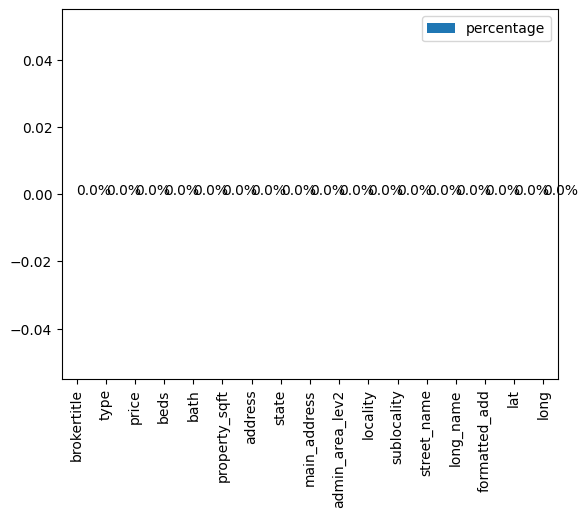

In [80]:
# Visualize the percentage of missing values:
missing_chart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percentage):
  missing_chart.text(index, percentage, str(percentage) + '%')

There is no missing values in this dataset.

###<h3>2.6. Handling dupplicated values</h3>

In [81]:
# Check the duplicate rows
df[df.duplicated()]

brokertitle  \
81        Brokered by Douglas Elliman - 575 Madison Ave   
115                              Brokered by Sowae Corp   
116                              Brokered by Sowae Corp   
149          Brokered by CENTURY 21 PROFESSIONAL REALTY   
214                                 Brokered by COMPASS   
...                                                 ...   
4752                                Brokered by COMPASS   
4753                    Brokered by Keller Williams NYC   
4775                    Brokered by EXIT REALTY PREMIER   
4780                                           NoBroker   
4782  Brokered by Sotheby's International Realty - E...   

                            type    price  beds      bath  property_sqft  \
81                Condo for sale  1650000     2  2.000000    1065.000000   
115               House for sale   400000     4  2.000000    1980.000000   
116   Multi-family home for sale   346000     5  2.000000    2184.207862   
149               House for sale   659000     8  3.000000    2184.207862   
214               Co-op for sale   695000     2  2.000000    2184.207862   
...                          ...      ...   ...       ...            ...   
4752              Co-op for sale   795000     3  1.000000    2184.207862   
4753              Co-op for sale   872500     1  1.000000    2184.207862   
4775              House for sale   749000     3  2.373861    2002.000000   
4780  Multi-family home for sale  2000000     8  2.373861    2184.207862   
4782              Condo for sale  2600000     3  2.000000    1729.000000   

                        address                 state  \
81        200 E 94th St Apt 414    New York, NY 10128   
115             781 Sheperd Ave    Brooklyn, NY 11208   
116             103-12 104th St  Ozone Park, NY 11417   
149            148-05 111th Ave     Jamaica, NY 11435   
214      575 Park Ave Unit 1101   Manhattan, NY 10065   
...                         ...                   ...   
4752    720 Greenwich St Apt 9G   Manhattan, NY 10014   
4753  32 Gramercy Park S Apt 8B    New York, NY 10003   
4775               631 Essex St    Brooklyn, NY 11208   
4780               2324 60th St    Brooklyn, NY 11204   
4782        242 E 15th St Apt 1    New York, NY 10003   

                                     main_address admin_area_lev2  \
81        200 E 94th St Apt 414New York, NY 10128        New York   
115             781 Sheperd AveBrooklyn, NY 11208   United States   
116           103-12 104th StOzone Park, NY 11417   United States   
149             148-05 111th AveJamaica, NY 11435   United States   
214     575 Park Ave Unit 1101Manhattan, NY 10065        New York   
...                                           ...             ...   
4752   720 Greenwich St Apt 9GManhattan, NY 10014        New York   
4753  32 Gramercy Park S Apt 8BNew York, NY 10003        New York   
4775               631 Essex StBrooklyn, NY 11208   United States   
4780               2324 60th StBrooklyn, NY 11204   United States   
4782        242 E 15th St Apt 1New York, NY 10003        New York   

             locality    sublocality street_name        long_name  \
81    New York County       New York   Manhattan              200   
115          New York   Kings County    Brooklyn  Shepherd Avenue   
116          New York  Queens County      Queens     104th Street   
149          New York  Queens County      Queens     111th Avenue   
214   New York County       New York   Manhattan              575   
...               ...            ...         ...              ...   
4752  New York County       New York   Manhattan              720   
4753  New York County       New York   Manhattan               32   
4775         New York   Kings County    Brooklyn     Essex Street   
4780         New York   Kings County    Brooklyn      60th Street   
4782  New York County       New York   Manhattan              242   

                                       formatted_add        lat       long  
81

There are 214 duplicated rows needed to remove as bad effect to our training model later.

In [82]:
# Remove duplicates
df = df.drop_duplicates()

###<h3>2.7. Handling Incorrect Values and Outliers</h3>

In [83]:
# Investigate 'price'
df.sort_values(by='price', ascending = True).head(10)

brokertitle            type  price  beds  \
317          Brokered by Living NY - Main Office        For sale   2494     2   
310          Brokered by Living NY - Main Office        For sale   3225     3   
360          Brokered by Century 21 Realty First   Land for sale   5800     3   
463         Brokered by Morris Park Realty Group  Co-op for sale  49500     3   
979                          Brokered by COMPASS  Condo for sale  60000     3   
188   Brokered by All American Realty Management        For sale  65000     3   
252             Brokered by BESMATCH REAL ESTATE  Co-op for sale  69000     1   
3                            Brokered by COMPASS  Condo for sale  69000     3   
132               Brokered by Utopia Real Estate  Co-op for sale  69900     2   
4003           Brokered by Prestige Homes Ny Inc   Land for sale  75000     3   

          bath  property_sqft                       address  \
317   1.000000    2184.207862         635 W 170th St Apt 4F   
310   1.000000    2184.207862         635 W 170th St Apt 2C   
360   2.373861    2184.207862           4515 Avenue N Lot 5   
463   2.373861     800.000000   150 City Island Ave Unit E3   
979   1.000000     445.000000       2 E 55th St Unit 809W35   
188   1.000000     230.000000  1287266 45 Madison St Unit 1   
252   1.000000     850.000000      1185 Anderson Ave Apt 2E   
3     1.000000     445.000000       2 E 55th St Unit 908W33   
132   1.000000     700.000000      61 Edgewater Park Unit B   
4003  2.373861    2184.207862                      199th St   

                       state                                     main_address  \
317       New York, NY 10032          635 W 170th St Apt 4FNew York, NY 10032   
310       New York, NY 10032          635 W 170th St Apt 2CNew York, NY 10032   
360       Brooklyn, NY 11234            4515 Avenue N Lot 5Brooklyn, NY 11234   
463          Bronx, NY 10464       150 City Island Ave Unit E3Bronx, NY 10464   
979      Manhattan, NY 10022       2 E 55th St Unit 809W35Manhattan, NY 10022   
188      Manhattan, NY 10038  1287266 45 Madison St Unit 1Manhattan, NY 10038   
252          Bronx, NY 10452          1185 Anderson Ave Apt 2EBronx, NY 10452   
3        Manhattan, NY 10022       2 E 55th St Unit 908W33Manhattan, NY 10022   
132          Bronx, NY 10465          61 Edgewater Park Unit BBronx, NY 10465   
4003  Saint Albans, NY 11412                   199th StSaint Albans, NY 11412   

     admin_area_lev2         locality      sublocality    street_name  \
317         New York  New York County         New York      Manhattan   
310         New York  New York County         New York      Manhattan   
360         New York     Kings County         Brooklyn      Flatlands   
463         New York     Bronx County        The Bronx    City Island   
979         New York  New York County         New York      Manhattan   
188         New York  New York County         New York      Manhattan   
252         New York     Bronx County        The Bronx     Highbridge   
3      United States         New York  New York County       New York   
132    United States         New York     Bronx County      The Bronx   
4003           11412    United States         New York  Queens County   

             long_name                                  formatted_add  \
317                635    635 W 170th St #4f, New York, NY 10032, USA   
310                635    635 W 170th St #2c, New York, NY 10032, USA   
360               4515      4515 Avenue N #5, Brooklyn, NY 11234, USA   
463                150  150 City Island Ave #3e, Bronx, NY 10464, USA   
979                  2    2 E 55th St 809 35, New York, NY 10022, USA   
188                 45      45 Madison St #1, New York, NY 10038, USA   
252               1185    1185 Anderson Ave #2e, Bronx, NY 10452, USA   
3     East 55th Street           2 E 55th St, New York, NY 10022, USA   
132     Edgewater Park        61 Edgewater Park, Bronx, NY 10465, USA   
4003           Jamaica   

Seem the price of *2000 Dollar* to *5000 Dollar* for a house in New York is impossible and unfounded. So we will remove 3 smallest values of 'price' in dataset.

In [84]:
# Remove 3 smallest values of 'price'
df_sorted = df.sort_values(by='price', ascending = True)
df = df_sorted.iloc[3:]

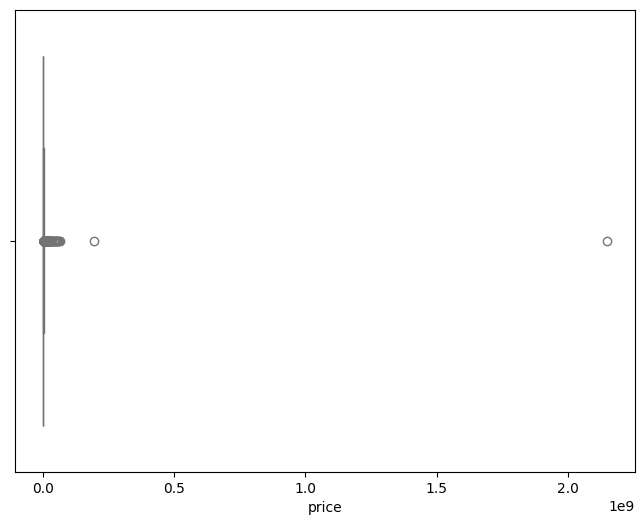

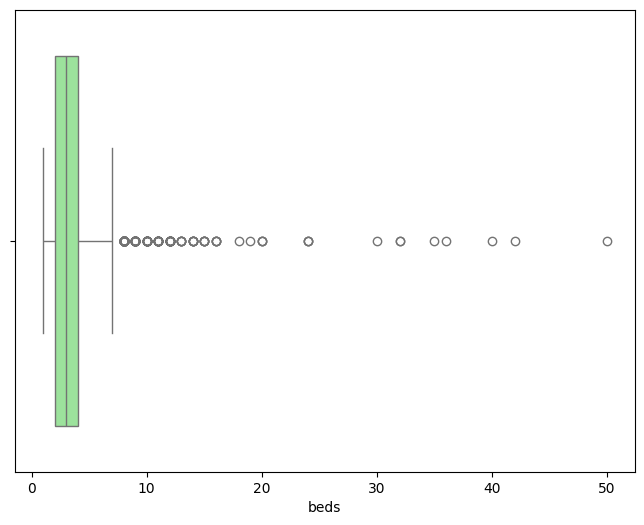

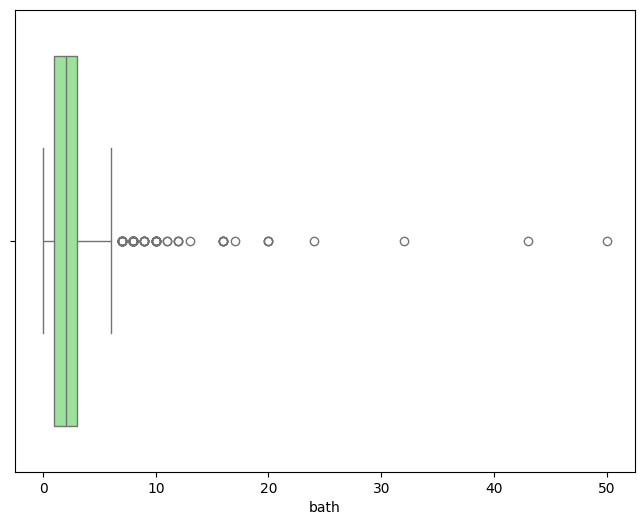

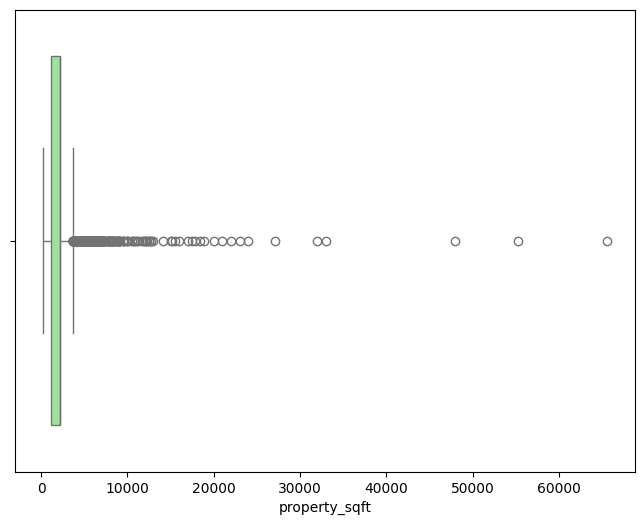

In [85]:
# Loop for ploting Outliers:
df_num = df[['price', 'beds', 'bath', 'property_sqft']]

for feature in df_num.columns:
  plt.figure(figsize =(8,6))
  sns.boxplot(x=df_num[feature], color = 'lightgreen')
  plt.show()

In [86]:
# Remove 2 largest values of 'price'
df_sorted = df.sort_values(by='price', ascending = False)
df = df_sorted.iloc[2:]
df.sort_values(by='beds', ascending = False).head(5)

brokertitle  \
1143    Brokered by Blue Key Real Estate Brokerage   
2653               Brokered by NEUHAUS REALTY INC.   
3276       Brokered by Weichert Realtors TMT Group   
2488  Brokered by RE MAX Real Estate Professionals   
765                        Brokered by RE MAX Edge   

                            type     price  beds  bath  property_sqft  \
1143  Multi-family home for sale  11000000    50  50.0        22035.0   
2653  Multi-family home for sale  10700000    42  43.0        27152.0   
3276  Multi-family home for sale   5980000    40  20.0        15500.0   
2488  Multi-family home for sale   3099000    36  16.0        12460.0   
765   Multi-family home for sale   4380000    35  16.0        15000.0   

                        address                      state  \
1143              8820 Avenue J         Brooklyn, NY 11236   
2653  646-662 Port Richmond Ave    Staten Island, NY 10302   
3276              35-54 95th St  Jackson Heights, NY 11372   
2488               5206 6th Ave         Brooklyn, NY 11220   
765       8699 Bay Pkwy Unit 16         Brooklyn, NY 11214   

                                          main_address admin_area_lev2  \
1143                   8820 Avenue JBrooklyn, NY 11236   United States   
2653  646-662 Port Richmond AveStaten Island, NY 10302   United States   
3276            35-54 95th StJackson Heights, NY 11372   United States   
2488                    5206 6th AveBrooklyn, NY 11220   United States   
765            8699 Bay Pkwy Unit 16Brooklyn, NY 11214   United States   

      locality      sublocality    street_name             long_name  \
1143  New York     Kings County       Brooklyn              Avenue J   
2653  New York  Richmond County  Staten Island  Port Richmond Avenue   
3276  New York    Queens County         Queens           95th Street   
2488  New York     Kings County       Brooklyn            6th Avenue   
765   New York     Kings County       Brooklyn                  8699   

                                          formatted_add        lat       long  
1143             8820 Avenue J, Brooklyn, NY 11236, USA  40.637696 -73.904836  
2653  646 Port Richmond Ave, Staten Island, NY 10302...  40.627671 -74.142352  
3276             35-54 95th St, Flushing, NY 11372, USA  40.751468 -73.872619  
2488              5206 6th Ave, Brooklyn, NY 11220, USA  40.642652 -74.009674  
765          8699 Bay Pkwy #16, Brooklyn, NY 11214, USA  40.599715 -73.995694

In [87]:
# Remove 3 largest values of 'beds'
df_sorted = df.sort_values(by='beds', ascending = False)
df = df_sorted.iloc[2:]
df.sort_values(by='bath', ascending = False).head(5)

brokertitle                        type  \
622         Brokered by Momentum Real Estate Llc  Multi-family home for sale   
2564  Brokered by Coldwell Banker American Homes  Multi-family home for sale   
3276     Brokered by Weichert Realtors TMT Group  Multi-family home for sale   
3603              Brokered by BHHS Fillmore R.E.  Multi-family home for sale   
1214                         Brokered by COMPASS  Multi-family home for sale   

        price  beds  bath  property_sqft                   address  \
622   3000000     3  32.0        11760.0      8001 New Utrecht Ave   
2564  2700000    24  24.0        18936.0  3520 Newkirk Ave Unit 24   
3276  5980000    40  20.0        15500.0             35-54 95th St   
3603  3500000    30  20.0        18400.0          1319 Newkirk Ave   
1214  6995000    20  20.0        12492.0              76 Irving Pl   

                          state                                main_address  \
622          Brooklyn, NY 11214      8001 New Utrecht AveBrooklyn, NY 11214   
2564         Brooklyn, NY 11203  3520 Newkirk Ave Unit 24Brooklyn, NY 11203   
3276  Jackson Heights, NY 11372      35-54 95th StJackson Heights, NY 11372   
3603         Brooklyn, NY 11230          1319 Newkirk AveBrooklyn, NY 11230   
1214        Manhattan, NY 10003             76 Irving PlManhattan, NY 10003   

     admin_area_lev2      locality      sublocality   street_name  \
622    United States      New York     Kings County      Brooklyn   
2564        New York  Kings County         Brooklyn  Little Haiti   
3276   United States      New York    Queens County        Queens   
3603   United States      New York     Kings County      Brooklyn   
1214   United States      New York  New York County      New York   

               long_name                                  formatted_add  \
622   New Utrecht Avenue  8001 New Utrecht Ave, Brooklyn, NY 11214, USA   
2564                3520  3520 Newkirk Ave #24, Brooklyn, NY 11203, USA   
3276         95th Street         35-54 95th St, Flushing, NY 11372, USA   
3603      Newkirk Avenue      1319 Newkirk Ave, Brooklyn, NY 11230, USA   
1214        Irving Place          76 Irving Pl, New York, NY 10003, USA   

            lat       long  
622   40.611548 -74.000866  
2564  40.640181 -73.942939  
3276  40.751468 -73.872619  
3603  40.635180 -73.964614  
1214  40.736804 -73.986479

In [88]:
# Remove 3 largest values of 'bath'
df_sorted = df.sort_values(by='bath', ascending = False)
df = df_sorted.iloc[1:]
df.sort_values(by='property_sqft', ascending = False).head(5)

brokertitle                        type  \
4623  Brokered by EVERGREEN REALTY & INVESTMENTS  Multi-family home for sale   
2146            Brokered by Myc & Associates Inc  Multi-family home for sale   
823          Brokered by Andrew Lichtenstein Inc  Multi-family home for sale   
7              Brokered by Connie Profaci Realty              House for sale   
3130                   Brokered by Prime Ny Inc.  Multi-family home for sale   

         price  beds       bath  property_sqft          address  \
4623  31500000     3   2.373861        65535.0      467 Keap St   
2146   5827000     3   2.373861        55300.0    9944 62nd Ave   
823    7200000     3   2.373861        48000.0  3650 Bronx Blvd   
7     16800000     8  16.000000        33000.0  177 Benedict Rd   
3130   6950000     6   6.000000        32000.0   367 E 201st St   

                        state                            main_address  \
4623       Brooklyn, NY 11211           467 Keap StBrooklyn, NY 11211   
2146         Queens, NY 11374           9944 62nd AveQueens, NY 11374   
823           Bronx, NY 10467          3650 Bronx BlvdBronx, NY 10467   
7     Staten Island, NY 10304  177 Benedict RdStaten Island, NY 10304   
3130          Bronx, NY 10458           367 E 201st StBronx, NY 10458   

     admin_area_lev2  locality      sublocality    street_name  \
4623   United States  New York     Kings County       Brooklyn   
2146   United States  New York    Queens County         Queens   
823    United States  New York     Bronx County      The Bronx   
7      United States  New York  Richmond County  Staten Island   
3130   United States  New York     Bronx County      The Bronx   

              long_name                                  formatted_add  \
4623        Keap Street           467 Keap St, Brooklyn, NY 11211, USA   
2146        62nd Avenue        99-44 62nd Ave, Flushing, NY 11374, USA   
823     Bronx Boulevard          3650 Bronx Blvd, Bronx, NY 10467, USA   
7         Benedict Road  177 Benedict Rd, Staten Island, NY 10304, USA   
3130  East 201st Street           367 E 201st St, Bronx, NY 10458, USA   

            lat       long  
4623  40.712980 -73.952445  
2146  40.735274 -73.856655  
823   40.881464 -73.867129  
7     40.595002 -74.106424  
3130  40.869460 -73.882195

## 3. Feature Engineering

Our dataset contains 17 features as checked above. This part will dive onto each of these features and see how relevant they are.

###<h3>3.1. Brokertitle</h3>

* Remove 'Brokered by'

In [89]:
# Transform 'brokertitle'
df['brokertitle'] = df['brokertitle'].str.replace('Brokered by', '')
print(df['brokertitle'])

2564     Coldwell Banker American Homes
3276        Weichert Realtors TMT Group
3603                 BHHS Fillmore R.E.
1214                            COMPASS
4691      Elite Real Estate Group 1 Llc
                     ...               
3442                            COMPASS
1926               R Jaundoo Realty Llc
616            BHHS New York Properties
3379               Brown Harris Stevens
2699                            COMPASS
Name: brokertitle, Length: 4579, dtype: object


<ipython-input-89-6c8e1f643134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brokertitle'] = df['brokertitle'].str.replace('Brokered by', '')


* Transform into numeric variable for further used in the correlation analysis

In [90]:
# Transform into numeric variable
df['broker_len'] = df['brokertitle'].apply(len)
df.head(3)

<ipython-input-90-c17cc043d5f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['broker_len'] = df['brokertitle'].apply(len)


brokertitle                        type    price  \
2564   Coldwell Banker American Homes  Multi-family home for sale  2700000   
3276      Weichert Realtors TMT Group  Multi-family home for sale  5980000   
3603               BHHS Fillmore R.E.  Multi-family home for sale  3500000   

      beds  bath  property_sqft                   address  \
2564    24  24.0        18936.0  3520 Newkirk Ave Unit 24   
3276    40  20.0        15500.0             35-54 95th St   
3603    30  20.0        18400.0          1319 Newkirk Ave   

                          state                                main_address  \
2564         Brooklyn, NY 11203  3520 Newkirk Ave Unit 24Brooklyn, NY 11203   
3276  Jackson Heights, NY 11372      35-54 95th StJackson Heights, NY 11372   
3603         Brooklyn, NY 11230          1319 Newkirk AveBrooklyn, NY 11230   

     admin_area_lev2      locality    sublocality   street_name  \
2564        New York  Kings County       Brooklyn  Little Haiti   
3276   United States      New York  Queens County        Queens   
3603   United States      New York   Kings County      Brooklyn   

           long_name                                  formatted_add  \
2564            3520  3520 Newkirk Ave #24, Brooklyn, NY 11203, USA   
3276     95th Street         35-54 95th St, Flushing, NY 11372, USA   
3603  Newkirk Avenue      1319 Newkirk Ave, Brooklyn, NY 11230, USA   

            lat       long  broker_len  
2564  40.640181 -73.942939          31  
3276  40.751468 -73.872619          28  
3603  40.635180 -73.964614          19

###<h3>3.2. Address</h3>

Transform into numeric variable for further used in the correlation analysis.

In [91]:
# Transform into numeric variable
df['formatted_add_len'] = df['formatted_add'].apply(len)
df.head(3)

<ipython-input-91-60f9dfb7560f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['formatted_add_len'] = df['formatted_add'].apply(len)


brokertitle                        type    price  \
2564   Coldwell Banker American Homes  Multi-family home for sale  2700000   
3276      Weichert Realtors TMT Group  Multi-family home for sale  5980000   
3603               BHHS Fillmore R.E.  Multi-family home for sale  3500000   

      beds  bath  property_sqft                   address  \
2564    24  24.0        18936.0  3520 Newkirk Ave Unit 24   
3276    40  20.0        15500.0             35-54 95th St   
3603    30  20.0        18400.0          1319 Newkirk Ave   

                          state                                main_address  \
2564         Brooklyn, NY 11203  3520 Newkirk Ave Unit 24Brooklyn, NY 11203   
3276  Jackson Heights, NY 11372      35-54 95th StJackson Heights, NY 11372   
3603         Brooklyn, NY 11230          1319 Newkirk AveBrooklyn, NY 11230   

     admin_area_lev2      locality    sublocality   street_name  \
2564        New York  Kings County       Brooklyn  Little Haiti   
3276   United States      New York  Queens County        Queens   
3603   United States      New York   Kings County      Brooklyn   

           long_name                                  formatted_add  \
2564            3520  3520 Newkirk Ave #24, Brooklyn, NY 11203, USA   
3276     95th Street         35-54 95th St, Flushing, NY 11372, USA   
3603  Newkirk Avenue      1319 Newkirk Ave, Brooklyn, NY 11230, USA   

            lat       long  broker_len  formatted_add_len  
2564  40.640181 -73.942939          31                 45  
3276  40.751468 -73.872619          28                 38  
3603  40.635180 -73.964614          19                 41

###<h3>3.3. Price</h3>

In [92]:
# Transform 'price' to Million Dollar
df['price_mil'] = df['price']/1000000
df.drop('price', axis=1, inplace = True)
df.head(5)

<ipython-input-92-8813762069f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_mil'] = df['price']/1000000
<ipython-input-92-8813762069f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price', axis=1, inplace = True)


brokertitle                        type  beds  bath  \
2564   Coldwell Banker American Homes  Multi-family home for sale    24  24.0   
3276      Weichert Realtors TMT Group  Multi-family home for sale    40  20.0   
3603               BHHS Fillmore R.E.  Multi-family home for sale    30  20.0   
1214                          COMPASS  Multi-family home for sale    20  20.0   
4691    Elite Real Estate Group 1 Llc  Multi-family home for sale     6  17.0   

      property_sqft                   address                      state  \
2564        18936.0  3520 Newkirk Ave Unit 24         Brooklyn, NY 11203   
3276        15500.0             35-54 95th St  Jackson Heights, NY 11372   
3603        18400.0          1319 Newkirk Ave         Brooklyn, NY 11230   
1214        12492.0              76 Irving Pl        Manhattan, NY 10003   
4691        12733.0          2245 Creston Ave            Bronx, NY 10453   

                                    main_address admin_area_lev2  \
2564  3520 Newkirk Ave Unit 24Brooklyn, NY 11203        New York   
3276      35-54 95th StJackson Heights, NY 11372   United States   
3603          1319 Newkirk AveBrooklyn, NY 11230   United States   
1214             76 Irving PlManhattan, NY 10003   United States   
4691             2245 Creston AveBronx, NY 10453   United States   

          locality      sublocality   street_name       long_name  \
2564  Kings County         Brooklyn  Little Haiti            3520   
3276      New York    Queens County        Queens     95th Street   
3603      New York     Kings County      Brooklyn  Newkirk Avenue   
1214      New York  New York County      New York    Irving Place   
4691      New York     Bronx County     The Bronx  Creston Avenue   

                                      formatted_add        lat       long  \
2564  3520 Newkirk Ave #24, Brooklyn, NY 11203, USA  40.640181 -73.942939   
3276         35-54 95th St, Flushing, NY 11372, USA  40.751468 -73.872619   
3603      1319 Newkirk Ave, Brooklyn, NY 11230, USA  40.635180 -73.964614   
1214          76 Irving Pl, New York, NY 10003, USA  40.736804 -73.986479   
4691         2245 Creston Ave, Bronx, NY 10453, USA  40.856930 -73.901697   

      broker_len  formatted_add_len  price_mil  
2564          31                 45      2.700  
3276          28                 38      5.980  
3603          19                 41      3.500  
1214           8                 37      6.995  
4691          30                 38      4.195

###<h3>3.4. Investigating and Transforming 'street' and 'locality'</h3>

In [93]:
df[['street_name', 'state', 'locality']].head(5)

street_name                      state      locality
2564  Little Haiti         Brooklyn, NY 11203  Kings County
3276        Queens  Jackson Heights, NY 11372      New York
3603      Brooklyn         Brooklyn, NY 11230      New York
1214      New York        Manhattan, NY 10003      New York
4691     The Bronx            Bronx, NY 10453      New York

In [94]:
# Unique values of 'street_name'
df['street_name'].unique()

array(['Little Haiti', 'Queens', 'Brooklyn', 'New York', 'The Bronx',
       'Little Caribbean', 'Staten Island', 'Manhattan',
       'Mariners Harbor', 'Crown Heights', 'Queens County',
       'Brooklyn Heights', 'Elmhurst', 'Clifton', 'East Flatbush',
       'Kings County', 'Williamsburg', 'Richmond County', 'Flatlands',
       'Dumbo', 'East 74th Street', 'Queens Village', 'Riverdale',
       'Red Hook', 'Glen Oaks', 'Prospect Heights', 'East 88th Street',
       'PECK SLIP', 'Bayside', 'East 22nd Street', 'East Bronx',
       'John Street', 'North Riverdale', 'Bergen Beach', 'Fordham Manor',
       'Boerum Hill', 'Spuyten Duyvil', 'Flushing', 'New York County',
       'Mapleton', 'West 13th Street', 'Greenpoint', 'Park Slope',
       'Southside', 'West 56th Street', 'Central Park West', 'Gravesend',
       'Brighton Beach', 'East 55th Street', 'Gowanus', 'Todt Hill',
       'Kensington', 'Midwood', 'Fort Greene', 'City Island',
       'Bedford-Stuyvesant', 'Mill Basin', 'Jamaica', 

Because there are large amount of unique of street name. So that it will be removed from this analysis.

In [95]:
# Unique values of 'state'
df['state'].unique()

array(['Brooklyn, NY 11203', 'Jackson Heights, NY 11372',
       'Brooklyn, NY 11230', 'Manhattan, NY 10003', 'Bronx, NY 10453',
       'Staten Island, NY 10304', 'Brooklyn, NY 11219',
       'Brooklyn, NY 11220', 'Brooklyn, NY 11214', 'New York, NY 10011',
       'New York, NY 10029', 'College Point, NY 11356',
       'Brooklyn, NY 11221', 'New York, NY 10013', 'New York, NY 10075',
       'New York, NY 10025', 'Manhattan, NY 10024', 'New York, NY 10014',
       'Brooklyn Heights, NY 11201', 'New York, NY 10128',
       'New York, NY 10016', 'New York, NY 10028', 'New York, NY 10003',
       'New York, NY 10019', 'Ridgewood, NY 11385', 'Flushing, NY 11358',
       'Brooklyn, NY 11212', 'New York, NY 10021', 'New York, NY 10065',
       'Brooklyn, NY 11224', 'New York, NY 10024', 'Brooklyn, NY 11222',
       'New York, NY 10023', 'Manhattan, NY 10025', 'Astoria, NY 11103',
       'Bronx, NY 10456', 'Manhattan, NY 10128', 'Manhattan, NY 10075',
       'Staten Island, NY 10303', 'Manhatt

* State

In [96]:
# Extract state name only
df['city'] = df['state'].str.split(',').str[0]
df['city'] = df['city'].str.strip()
df['city'].unique()

<ipython-input-96-f2cacbee430c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['state'].str.split(',').str[0]
<ipython-input-96-f2cacbee430c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].str.strip()


array(['Brooklyn', 'Jackson Heights', 'Manhattan', 'Bronx',
       'Staten Island', 'New York', 'College Point', 'Brooklyn Heights',
       'Ridgewood', 'Flushing', 'Astoria', 'Fresh Meadows', 'Corona',
       'Woodside', 'East Elmhurst', 'Howard Beach', 'Queens',
       'Whitestone', 'Malba', 'Glendale', 'Bayside', 'Rego Park',
       'Elmhurst', 'Stuyvesant Heights', 'Jamaica', 'Springfield Gardens',
       'South Ozone Park', 'Arverne', 'Rockaway Park', 'Woodhaven',
       'Rosedale', 'Floral Park', 'Glen Oaks', 'Far Rockaway',
       'Ozone Park', 'Bellerose', 'Douglaston', 'Little Neck',
       'Queens Village', 'Maspeth', 'Briarwood', 'Kew Gardens',
       'Forest Hills', 'Saint Albans', 'Crown Heights', 'Hollis',
       'Middle Village', 'Bedford Stuyvesant', 'East Flatbush',
       'Long Island City', 'Richmond Hill', 'Cambria Heights', 'Canarsie',
       'Bronx Ny', 'Nyc', 'Belle Harbor', 'Beechhurst',
       'Richmond Hill South', 'New York City', 'Old Mill Basin', 'Ny',
    

There are large amount of unique of street name. So that it will be removed from this analysis after used for correcting values in 'locality'

In [97]:
# Unique values of 'locality'
df['locality'].unique()

array(['Kings County', 'New York', 'New York County', 'Richmond County',
       'United States', 'Queens County', 'Bronx County', 'Brooklyn',
       'Queens', 'The Bronx', 'Flatbush'], dtype=object)

In [98]:
df['locality'].value_counts()

New York           2390
New York County     928
Queens County       536
Kings County        441
Bronx County        172
Richmond County      58
United States        37
Brooklyn              6
Queens                6
The Bronx             4
Flatbush              1
Name: locality, dtype: int64

In [99]:
# Inspect value 'United State' in 'locality' with respective value in 'city'
rows_with_united_states = df[df['locality'] == 'United States']
rows_with_united_states['city'].unique()

array(['Queens', 'Brooklyn', 'Staten Island', 'New York', 'Howard Beach',
       'Saint Albans', 'Bronx'], dtype=object)

In [100]:
valid_cities = ['Brooklyn', 'Queens', 'Staten Island', 'New York', 'Howard Beach', 'Saint Albans', 'Bronx']


# Update 'locality' column for rows where 'city' is in the valid_cities array
df.loc[(df['city'].isin(valid_cities)) & (df['locality'] == 'United States'), 'locality'] = df['city']


In [101]:
df['locality'].unique()

array(['Kings County', 'New York', 'New York County', 'Richmond County',
       'Queens', 'Queens County', 'Brooklyn', 'Staten Island',
       'Bronx County', 'Howard Beach', 'Saint Albans', 'Bronx',
       'The Bronx', 'Flatbush'], dtype=object)

In [102]:
# Correct values
df['locality'].replace('New York', 'Manhattan', inplace = True)
df['locality'].replace('New York County', 'Manhattan', inplace = True)
df['locality'].replace('Queens County', 'Queens', inplace = True)
df['locality'].replace('The Bronx', 'Bronx', inplace = True)
df['locality'].replace('Bronx County', 'Bronx', inplace = True)
df['locality'].replace('Kings County', 'Brooklyn', inplace = True)
df['locality'].replace('Richmond County', 'Staten Island', inplace = True)
df['locality'].replace('Howard Beach', 'Queens', inplace = True)
df['locality'].replace('Saint Albans', 'Queens', inplace = True)
df['locality'].replace('Flatbush', 'Brooklyn', inplace = True)
df['locality'].value_counts()


<ipython-input-102-3fc8982cafa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality'].replace('New York', 'Manhattan', inplace = True)
<ipython-input-102-3fc8982cafa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality'].replace('New York County', 'Manhattan', inplace = True)
<ipython-input-102-3fc8982cafa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality'].replace('Queens County', 'Queens', inplace 

Manhattan        3324
Queens            545
Brooklyn          462
Bronx             181
Staten Island      67
Name: locality, dtype: int64

In [103]:
# Encode the 'locality'
# Get dummies 'locality'
loc_dummies = pd.get_dummies(df['locality'])
least_common_loc = df['locality'].value_counts().idxmin()
loc_dummies = loc_dummies.drop(columns = [least_common_loc])
# Concatenate type_dummies with original df
df1 = pd.concat([df, loc_dummies], axis = 1)
df1.columns

Index(['brokertitle', 'type', 'beds', 'bath', 'property_sqft', 'address',
       'state', 'main_address', 'admin_area_lev2', 'locality', 'sublocality',
       'street_name', 'long_name', 'formatted_add', 'lat', 'long',
       'broker_len', 'formatted_add_len', 'price_mil', 'city', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens'],
      dtype='object')

###<h3>3.5. Type</h3>

In [104]:
df['type'].unique()

array(['Multi-family home for sale', 'House for sale',
       'Townhouse for sale', 'Pending', 'Contingent', 'Co-op for sale',
       'Condo for sale', 'Foreclosure', 'For sale', 'Coming Soon',
       'Mobile house for sale', 'Land for sale', 'Condop for sale'],
      dtype=object)

In [105]:
# Create dummy dataframe for 'type' feature
type_dummies = pd.get_dummies(df['type'])
least_common_type = df['type'].value_counts().idxmin()
type_dummies = type_dummies.drop(columns = [least_common_type])
# Concatenate type_dummies with original df
df1 = pd.concat([df1, type_dummies], axis = 1)
df1.columns

Index(['brokertitle', 'type', 'beds', 'bath', 'property_sqft', 'address',
       'state', 'main_address', 'admin_area_lev2', 'locality', 'sublocality',
       'street_name', 'long_name', 'formatted_add', 'lat', 'long',
       'broker_len', 'formatted_add_len', 'price_mil', 'city', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Co-op for sale', 'Coming Soon',
       'Condo for sale', 'Condop for sale', 'Contingent', 'For sale',
       'Foreclosure', 'House for sale', 'Land for sale',
       'Multi-family home for sale', 'Pending', 'Townhouse for sale'],
      dtype='object')

###<h3>3.6. Beds</h3>

###<h3>3.7. Bath and Property_sqft</h3>

In [106]:
# Round the 'bath' and 'property_sqft'
df1[['bath', 'property_sqft']] = df1[['bath', 'property_sqft']].round(0)

###<h3>3.8. Trimming out and Dividing dataset</h3>

In [107]:
# Remove unnecessary columns
df1 = df1.drop(['address', 'state','main_address', 'admin_area_lev2', 'sublocality', 'street_name','long_name', 'formatted_add', 'city'], axis=1)
df1.head(5)

brokertitle                        type  beds  bath  \
2564   Coldwell Banker American Homes  Multi-family home for sale    24  24.0   
3276      Weichert Realtors TMT Group  Multi-family home for sale    40  20.0   
3603               BHHS Fillmore R.E.  Multi-family home for sale    30  20.0   
1214                          COMPASS  Multi-family home for sale    20  20.0   
4691    Elite Real Estate Group 1 Llc  Multi-family home for sale     6  17.0   

      property_sqft   locality        lat       long  broker_len  \
2564        18936.0   Brooklyn  40.640181 -73.942939          31   
3276        15500.0  Manhattan  40.751468 -73.872619          28   
3603        18400.0  Manhattan  40.635180 -73.964614          19   
1214        12492.0  Manhattan  40.736804 -73.986479           8   
4691        12733.0  Manhattan  40.856930 -73.901697          30   

      formatted_add_len  ...  Condo for sale  Condop for sale  Contingent  \
2564                 45  ...               0                0           0   
3276                 38  ...               0                0           0   
3603                 41  ...               0                0           0   
1214                 37  ...               0                0           0   
4691                 38  ...               0                0           0   

      For sale  Foreclosure  House for sale  Land for sale  \
2564         0            0               0              0   
3276         0            0               0              0   
3603         0            0               0              0   
1214         0            0               0              0   
4691         0            0               0              0   

      Multi-family home for sale  Pending  Townhouse for sale  
2564                           1        0                   0  
3276                           1        0                   0  
3603                           1        0                   0  
1214                           1        0                   0  
4691                           1        0                   0  

[5 rows x 27 columns]

The remaining variables are categorized into numerical and categorical, since univariate analysis and multivariate analysis require different approaches to handle different data types.

In [108]:
# Populate the list of numeri attributes and categorical attributes
num_df1 = []
cat_df1 = []

for column in df1.columns:
  if is_numeric_dtype(df1[column]):
    num_df1.append(column)
  elif is_string_dtype(df1[column]):
    cat_df1.append(column)

print(num_df1)
print(cat_df1)


['beds', 'bath', 'property_sqft', 'lat', 'long', 'broker_len', 'formatted_add_len', 'price_mil', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Co-op for sale', 'Coming Soon', 'Condo for sale', 'Condop for sale', 'Contingent', 'For sale', 'Foreclosure', 'House for sale', 'Land for sale', 'Multi-family home for sale', 'Pending', 'Townhouse for sale']
['brokertitle', 'type', 'locality']


## 4. Univariate Analysis



<ipython-input-109-27e631f49999>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(column)


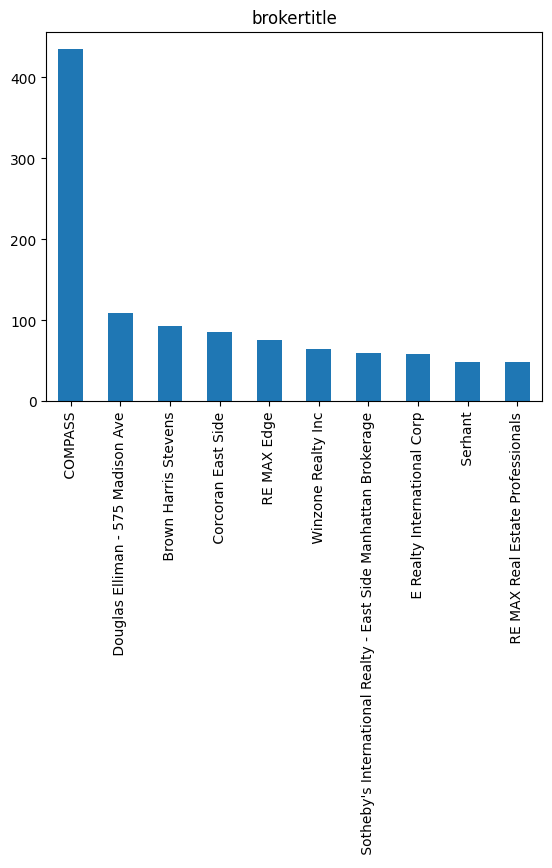

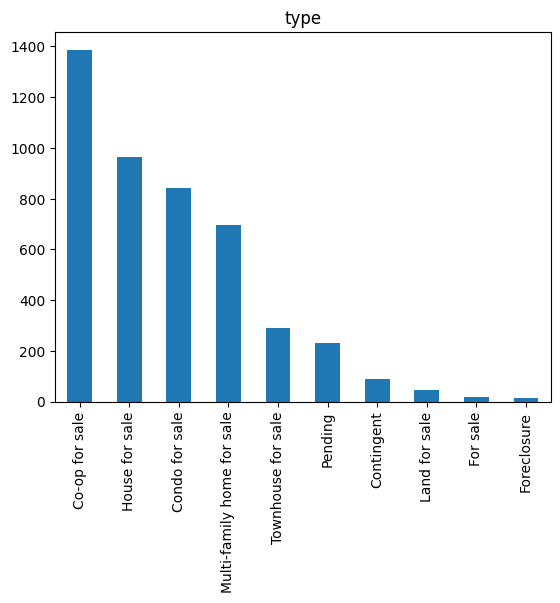

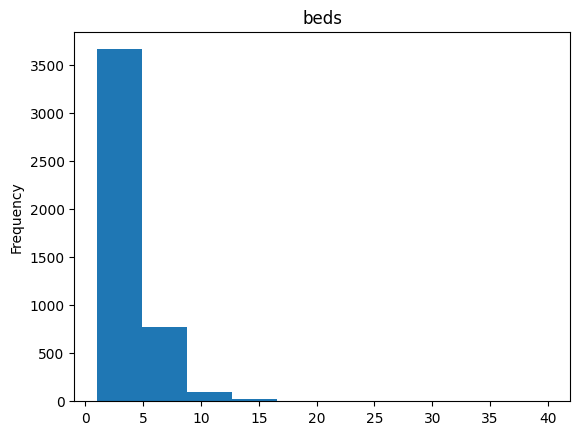

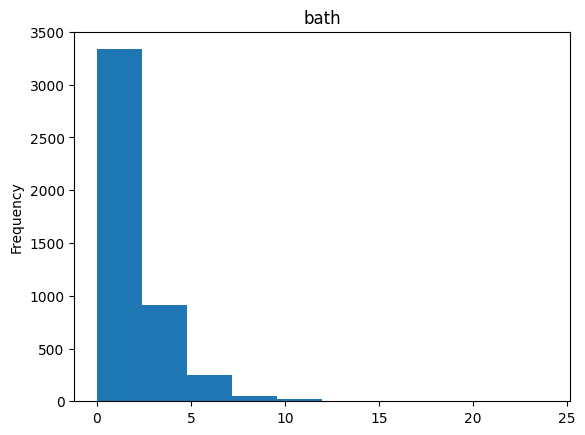

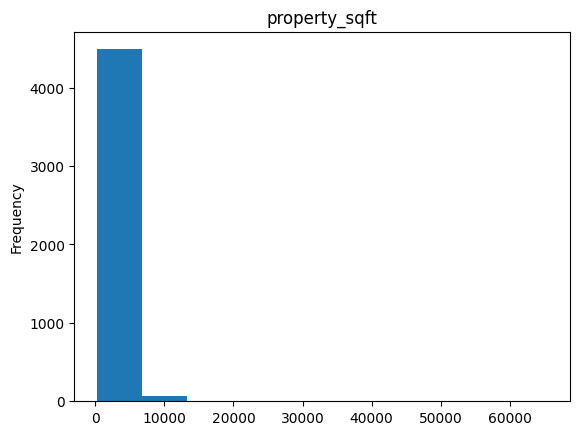

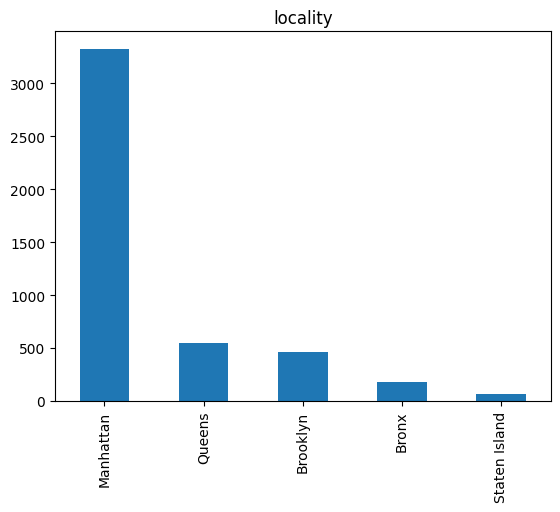

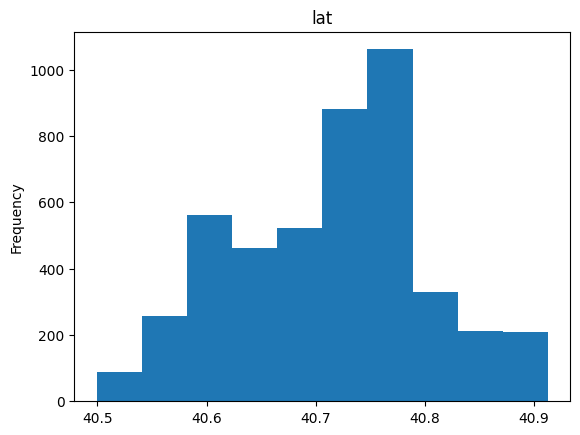

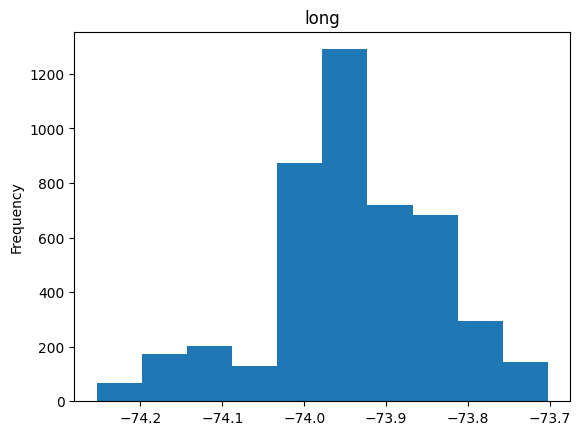

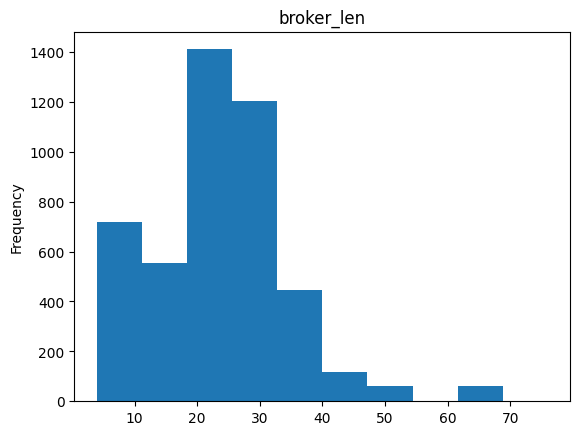

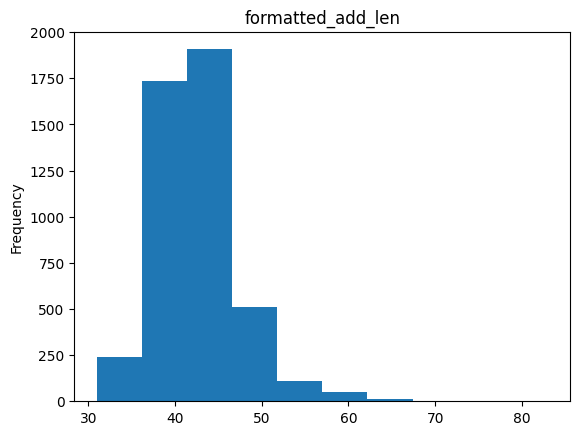

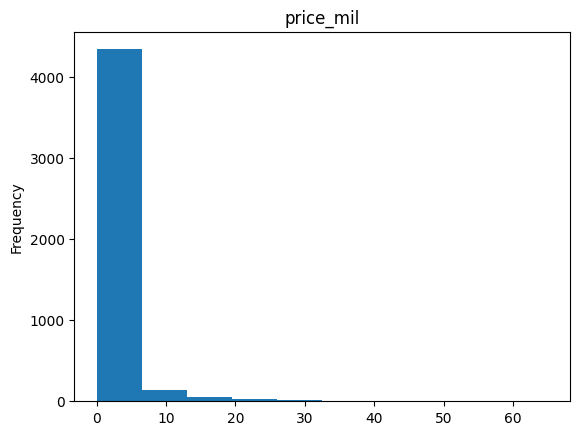

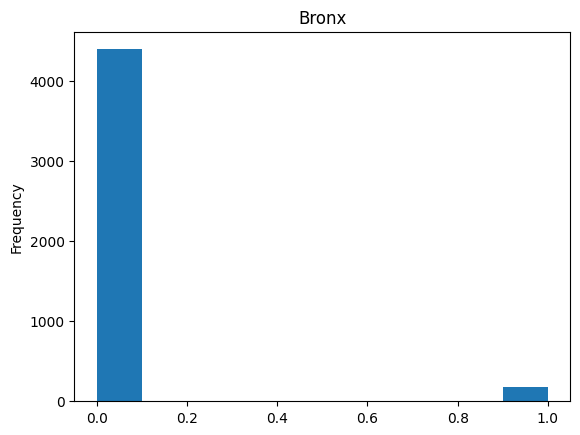

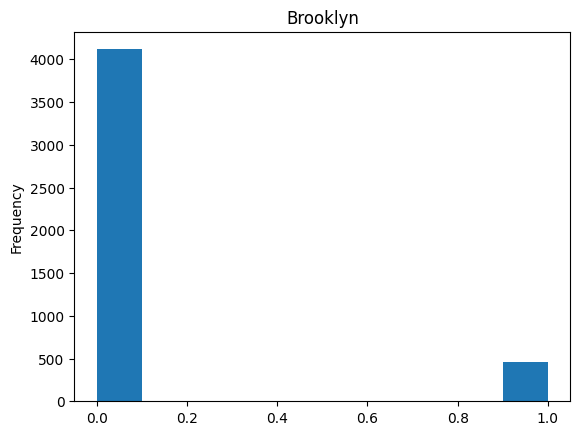

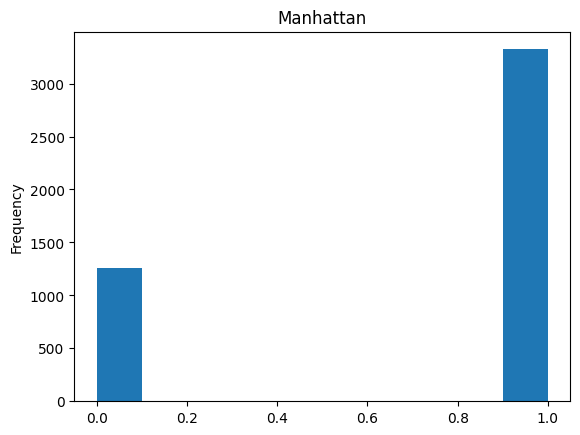

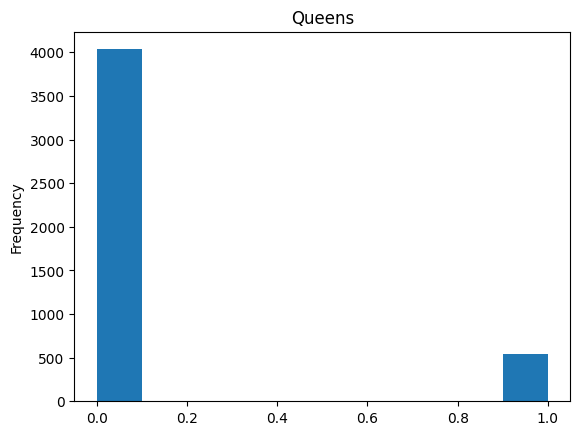

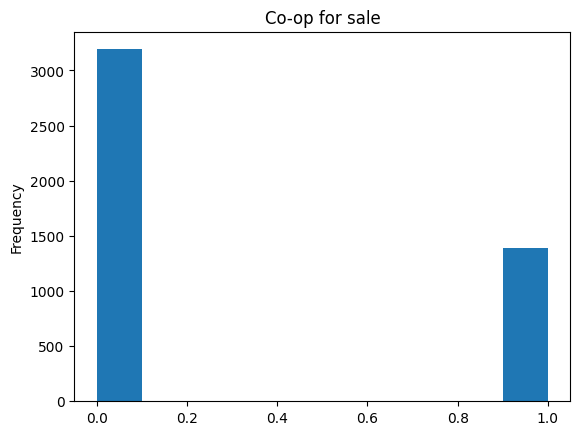

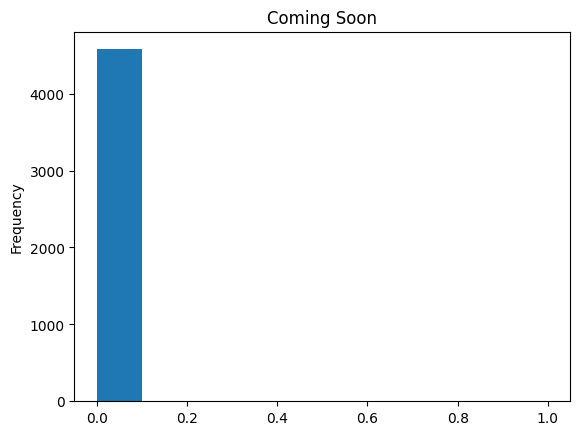

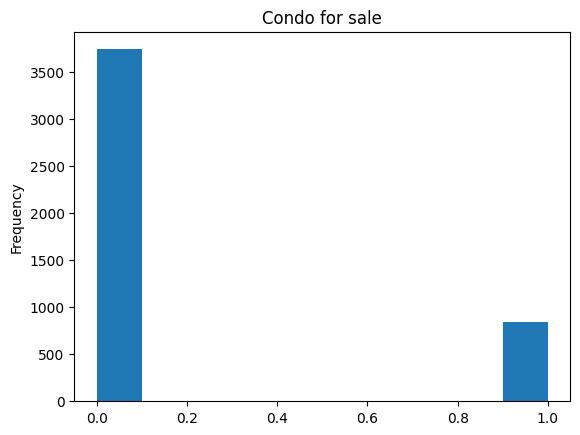

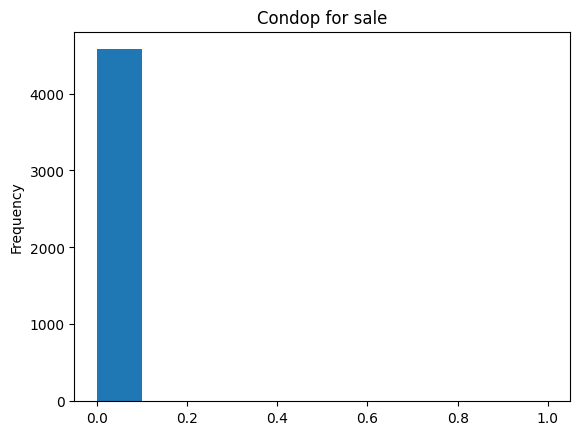

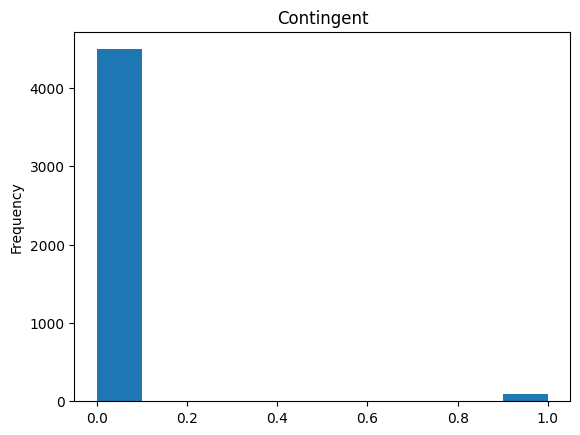

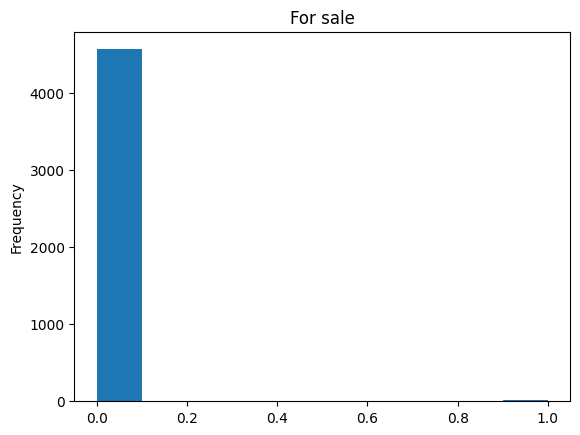

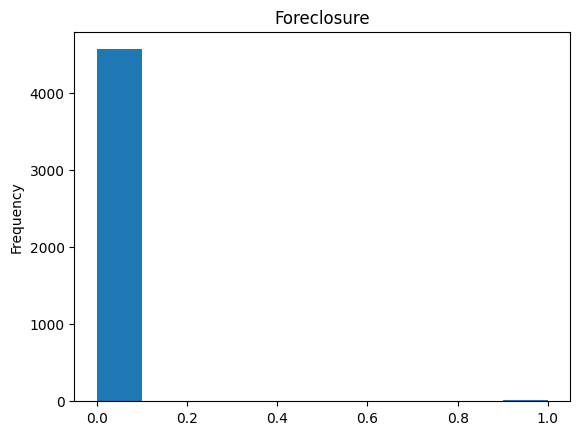

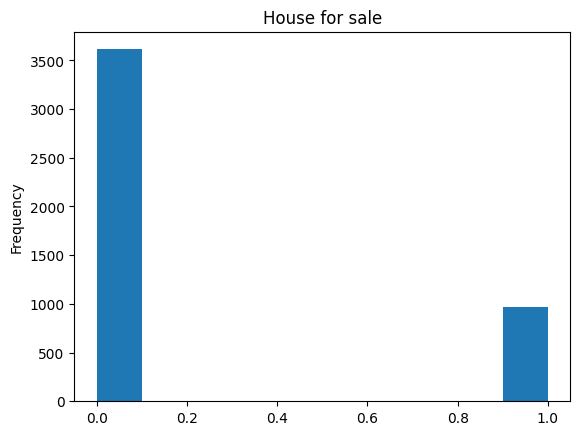

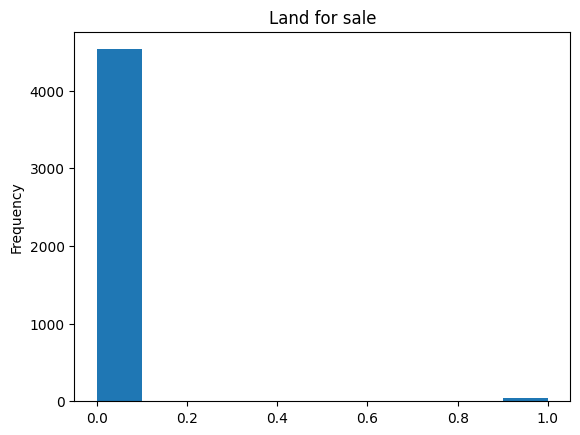

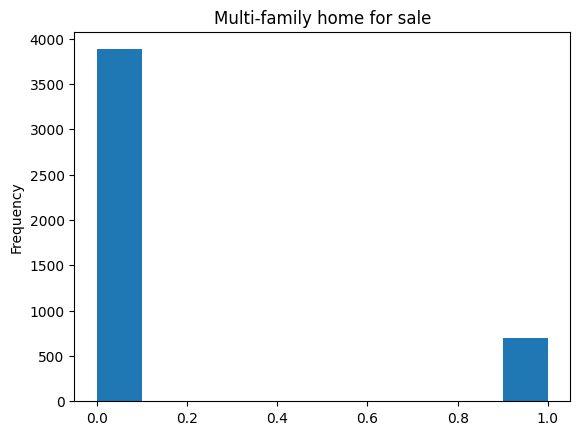

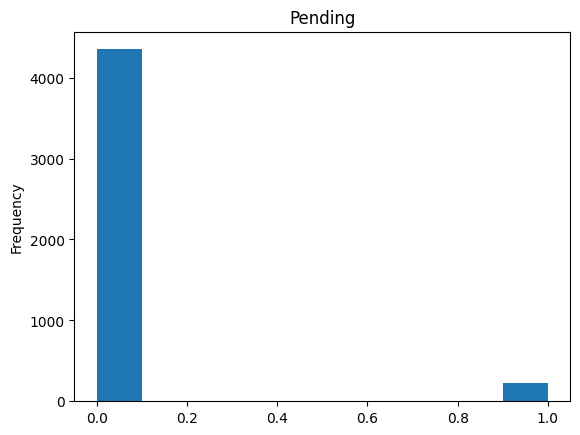

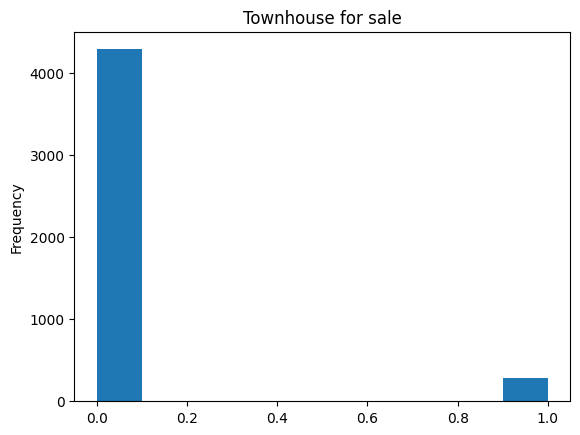

In [109]:
for column in df1.columns:
  plt.figure(column)
  plt.title(column)
  if is_numeric_dtype(df1[column]):
    df1[column].plot(kind = 'hist')
  elif is_string_dtype(df[column]):
    # Show only the top 10 value count of each categorical feature
    df1[column].value_counts()[:10].plot(kind = 'bar')

### 4.1. Price Analysis

1. What is the average price of houses?
2. What is the median price of houses?
4. How does the distribution of house prices?

In [110]:
# The average price
print('The average price of houses is ', df1['price_mil'].mean(), 'million Dollars')

#The median price
print('The median price of houses is ', df1['price_mil'].median(), 'million Dollars')

#The minimum price
print('The mimimum price of houses is ', df1['price_mil'].min(), 'million Dollars')

#The maximum price
print('The maximum price of houses is ', df1['price_mil'].max(), 'million Dollars')

The average price of houses is  1.8683641277571523 million Dollars
The median price of houses is  0.825 million Dollars
The mimimum price of houses is  0.0495 million Dollars
The maximum price of houses is  65.0 million Dollars


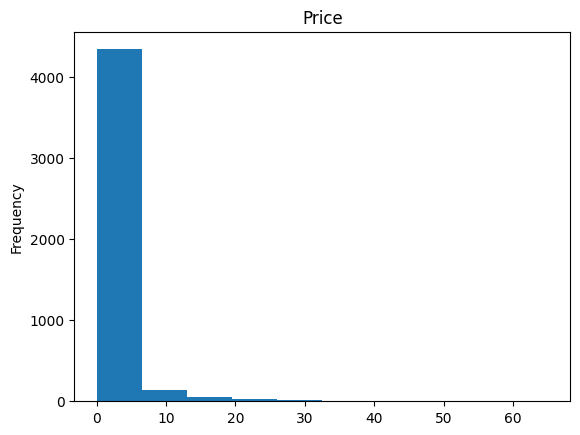

In [111]:
# The distribution of price range
df1['price_mil'].plot(kind = 'hist')
plt.title('Price')
plt.show()

The price of houses in New York ranges from **49 Thousand Dollars** up to **65 Million Dollars**, and the average price is **1.8 Milliion Dollars**. Most of the houses have the price below **1 Million Dollars**.

### 4.2. Property Size Analysis

1. What is the average size of houses?
2. What is the median size of houses?
4. How does the distribution of house size?

In [112]:
# The average property size
print('The average property size of houses is ', df1['property_sqft'].mean(), 'square feet')

#The median property size
print('The median property size of houses is ', df1['property_sqft'].median(), 'square feet')

#The minimum property size
print('The minimum property size of houses is ', df1['property_sqft'].min(), 'square feet')

#The maximum property size
print('The maximum property size of houses is ', df1['property_sqft'].max(), 'square feet')

The average property size of houses is  2160.6907621751475 square feet
The median property size of houses is  2184.0 square feet
The minimum property size of houses is  230.0 square feet
The maximum property size of houses is  65535.0 square feet


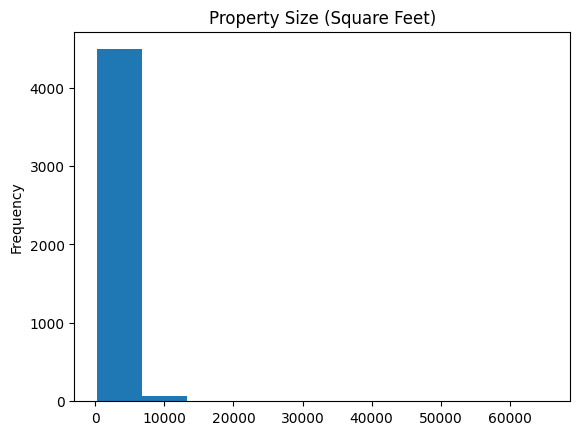

In [113]:
# The distribution of property size range
df1['property_sqft'].plot(kind = 'hist')
plt.title('Property Size (Square Feet)')
plt.show()

The size of houses range from 230 sq.ft up to 65.5 thousand sq.ft. The average size is 2160 sq.ft. Most of houses in New York City have size lower than 2000 sq.ft.

### 4.3. Broker Analysis

1. What is the distribution of Brokers?
2. Which Broker has most houses for sale?
3. Which Broker has the most expensive average price?
4. Which Broker has the largest average size of sale houses?

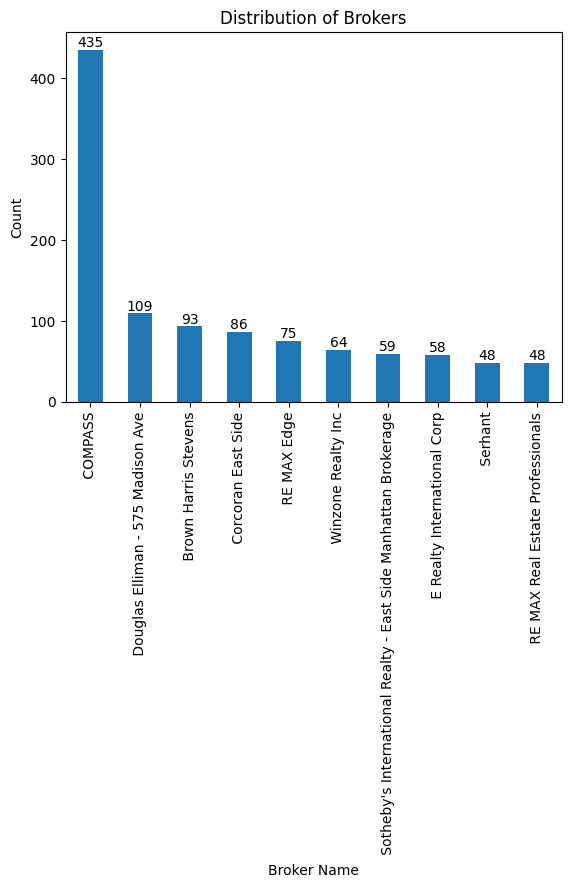

In [114]:
# Create the distribution bar chart
broker_counts = df1['brokertitle'].value_counts()[:10]
broker_counts.plot(kind='bar')

# Add annotations (value counts) on top of the bars
for i, count in enumerate(broker_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and axis labels
plt.title('Distribution of Brokers')
plt.xlabel('Broker Name')
plt.ylabel('Count')

# Display the plot
plt.show()

In [115]:
# Brokertitle grouped by average price and value counts
broker_count_mean = df1.groupby('brokertitle')['price_mil'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as Broker with more than 2 values
broker_count_mean[broker_count_mean['count']>2].sort_values('mean', ascending = False)

brokertitle  count      mean
422                    Garfield, Leslie J. & Co., Inc.     14  9.579929
171                   CHRISTIE'S INT.REAL ESTATE GROUP      6  8.465833
755     Peter Ashe Real Estate- Peter Ashe Real Estate      7  8.253429
921   Sotheby's International Realty - East Side Ma...     59  8.093000
251                                 Corcoran East Side     86  6.344784
..                                                 ...    ...       ...
543                     John Edwards Real Estate, Inc.      3  0.236333
879                               Robert E. Hill, Inc.      7  0.234908
22                              Affordable Realty Corp      3  0.219000
794                               R Jaundoo Realty Llc      3  0.206667
989                                 Utopia Real Estate      3  0.201433

[328 rows x 3 columns]

In [116]:
# Brokertitle grouped by average property_sqft and value counts
broker_count_mean = df1.groupby('brokertitle')['property_sqft'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as Broker with more than 2 values
broker_count_mean[broker_count_mean['count'] > 2].sort_values('mean', ascending = False)

brokertitle  count         mean
610                                   Link Ny Realty      4  8375.000000
242                            Connie Profaci Realty      5  8030.000000
74                                BHHS Fillmore R.E.      3  6920.000000
171                 CHRISTIE'S INT.REAL ESTATE GROUP      6  6025.333333
755   Peter Ashe Real Estate- Peter Ashe Real Estate      7  4835.285714
..                                               ...    ...          ...
325                    Dreamlife Realty New York Llc      3   775.000000
543                   John Edwards Real Estate, Inc.      3   719.333333
709                         New York Residential R E      3   703.333333
704                               New Heights Realty      3   571.666667
29                    All American Realty Management      3   518.666667

[328 rows x 3 columns]

**COMPASS** is the broker have the most houses on sale with 435 houses. While the broker **Garfield, Leslie J. & Co. Inc** has only 14 houses on sale but get highest average price as $9.6 Million for each house. **Link Ny Realty** is recorded as the broker selling largest houses with average size of 8375 sq.ft.

### 4.4. Type Analysis

1. What is the distribution of house types?
2. Which house type is the most popular?
3. Which house type has the most expensive average price?
4. Which house types is the the largest average size?

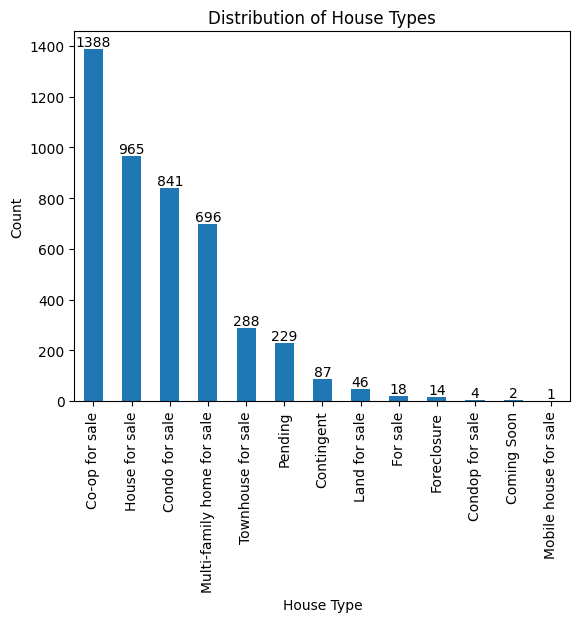

In [117]:
# Create the distribution bar chart
type_counts = df1['type'].value_counts()
type_counts.plot(kind='bar')

# Add annotations (value counts) on top of the bars
for i, count in enumerate(type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and axis labels
plt.title('Distribution of House Types')
plt.xlabel('House Type')
plt.ylabel('Count')

# Display the plot
plt.show()

In [118]:
# Types grouped by average price and value counts
type_count_mean = df1.groupby('type')['price_mil'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as type with more than 2 value counts
type_count_mean[type_count_mean['count']>2].sort_values('mean', ascending = False)

type  count      mean
12          Townhouse for sale    288  6.406234
2               Condo for sale    841  2.387024
5                     For sale     18  2.171389
10  Multi-family home for sale    696  1.638477
7               House for sale    965  1.565096
11                     Pending    229  1.362436
6                  Foreclosure     14  1.343010
8                Land for sale     46  1.128747
0               Co-op for sale   1388  1.113426
3              Condop for sale      4  0.967000
4                   Contingent     87  0.888693

In [119]:
# Types grouped by average property_sqft and value counts
type_count_mean = df1.groupby('type')['property_sqft'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as type with more than 2 value counts
type_count_mean[type_count_mean['count']>2].sort_values('mean', ascending = False)

type  count         mean
12          Townhouse for sale    288  3887.468750
10  Multi-family home for sale    696  3136.406609
6                  Foreclosure     14  2331.214286
7               House for sale    965  2246.374093
3              Condop for sale      4  2184.000000
8                Land for sale     46  2157.173913
5                     For sale     18  2108.888889
11                     Pending    229  2076.794760
4                   Contingent     87  1782.540230
0               Co-op for sale   1388  1658.389049
2               Condo for sale    841  1552.711058

**Co-op for sale** is the type having the most sales with 1388 houses. While **Townhouse for sale** has the highest price as $6.4 Million for each house and also is the largest house with average size of 3887 sq.ft.

### 4.5. Bed Count Analysis

1. What is the distribution of Bed Counts?
2. Which kind of bed count is the most popular?
3. Which bed count has the most expensive average price?
4. Which bed count has the the largest average size?

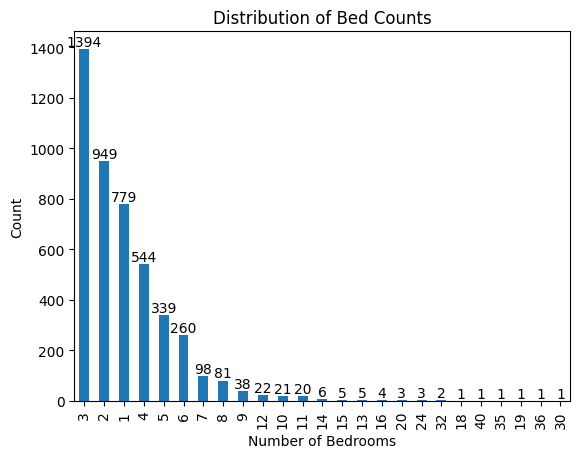

In [120]:
# Create the distribution bar chart
bed_counts = df1['beds'].value_counts()
bed_counts.plot(kind='bar')

# Add annotations (value counts) on top of the bars
for i, count in enumerate(bed_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and axis labels
plt.title('Distribution of Bed Counts')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Display the plot
plt.show()

In [121]:
# Number of Beds in dataset
print(sorted(df1['beds'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 24, 30, 32, 35, 36, 40]


In [122]:
# Bed Counts grouped by average price and value counts
bed_count_mean = df1.groupby('beds')['price_mil'].agg(['count', 'mean']).reset_index().sort_values('mean', ascending = False)
print(bed_count_mean)

    beds  count      mean
24    40      1  5.980000
18    20      3  5.698000
7      8     81  5.593926
9     10     21  5.539555
10    11     20  5.129839
6      7     98  4.878485
22    35      1  4.380000
4      5    339  4.046481
21    32      2  4.000000
20    30      1  3.500000
5      6    260  3.409610
23    36      1  3.099000
19    24      3  3.066667
11    12     22  3.050682
3      4    544  2.691941
16    18      1  2.499000
14    15      5  2.137777
8      9     38  2.096184
12    13      5  2.027800
17    19      1  1.998000
15    16      4  1.993500
13    14      6  1.675000
2      3   1394  1.456645
1      2    949  1.051336
0      1    779  0.529894


In [123]:
# Bed Counts grouped by average property size and value counts
bed_count_mean = df1.groupby('beds')['property_sqft'].agg(['count', 'mean']).reset_index().sort_values('mean', ascending = False)
print(bed_count_mean)

    beds  count          mean
20    30      1  18400.000000
24    40      1  15500.000000
22    35      1  15000.000000
19    24      3  13718.666667
23    36      1  12460.000000
18    20      3   7292.000000
21    32      2   7194.000000
15    16      4   6113.500000
17    19      1   5890.000000
14    15      5   5032.800000
10    11     20   4848.250000
7      8     81   4517.024691
9     10     21   4507.761905
13    14      6   4491.000000
11    12     22   4102.363636
6      7     98   4036.408163
8      9     38   3858.421053
12    13      5   3410.400000
5      6    260   3248.007692
4      5    339   2883.994100
16    18      1   2520.000000
3      4    544   2474.922794
2      3   1394   2009.109756
1      2    949   1488.984194
0      1    779   1387.408216


In [124]:
df1[(df1['beds'] == 40) | (df1['beds'] == 30)]

brokertitle                        type  beds  bath  \
3276   Weichert Realtors TMT Group  Multi-family home for sale    40  20.0   
3603            BHHS Fillmore R.E.  Multi-family home for sale    30  20.0   

      property_sqft   locality        lat       long  broker_len  \
3276        15500.0  Manhattan  40.751468 -73.872619          28   
3603        18400.0  Manhattan  40.635180 -73.964614          19   

      formatted_add_len  ...  Condo for sale  Condop for sale  Contingent  \
3276                 38  ...               0                0           0   
3603                 41  ...               0                0           0   

      For sale  Foreclosure  House for sale  Land for sale  \
3276         0            0               0              0   
3603         0            0               0              0   

      Multi-family home for sale  Pending  Townhouse for sale  
3276                           1        0                   0  
3603                           1        0                   0  

[2 rows x 27 columns]

The number of bedrooms ranges from 1 to 40. The most popular house is with **3 bedrooms** accounted for 1395 houses. The **Multi-family-home** type with **40 bedrooms** is recored as the most expensive house - **$5.9 Million*** for each; and the one with **30 bedrooms** is the one having largest size as ***18400 sq.ft*** for each house. However, there is only 1 value of each these types recorded in this dataset, leading the lack of credibility of this result.

### 4.6. Bath Count Analysis

1. What is the distribution of Bath Counts?
2. Which kind of bath count is the most popular?
3. Which bath count has the most expensive average price?
4. Which bath count has the the largest average size?

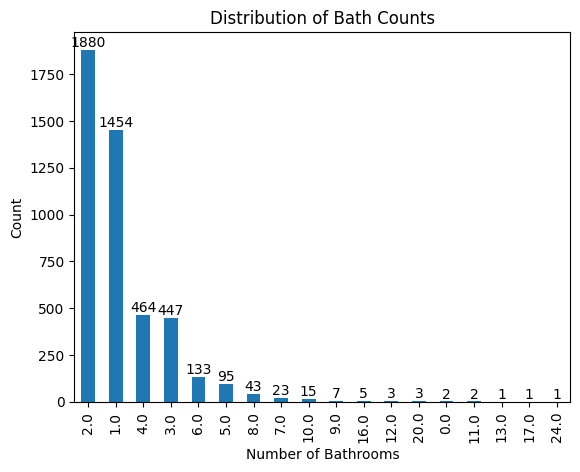

In [125]:
# Create the distribution bar chart
bath_counts = df1['bath'].value_counts()
bath_counts.plot(kind='bar')

# Add annotations (value counts) on top of the bars
for i, count in enumerate(bath_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and axis labels
plt.title('Distribution of Bath Counts')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

# Display the plot
plt.show()

In [126]:
# Number of Baths in dataset
print(sorted(df1['bath'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 16.0, 17.0, 20.0, 24.0]


In [127]:
# Bath Counts grouped by average price and value counts
bath_count_mean = df1.groupby('bath')['price_mil'].agg(['count', 'mean']).reset_index().sort_values('mean', ascending = False)
print(bath_count_mean)

    bath  count       mean
13  13.0      1  29.950000
10  10.0     15  15.877526
11  11.0      2  12.145000
8    8.0     43   9.991953
0    0.0      2   7.835000
6    6.0    133   7.510357
9    9.0      7   7.458412
7    7.0     23   6.056043
14  16.0      5   6.015800
16  20.0      3   5.491667
15  17.0      1   4.195000
12  12.0      3   3.499667
4    4.0    464   3.465509
5    5.0     95   3.225793
17  24.0      1   2.700000
3    3.0    447   1.708962
2    2.0   1880   1.699371
1    1.0   1454   0.474566


In [128]:
# Bath Counts grouped by average property size and value counts
bath_count_mean = df1.groupby('bath')['property_sqft'].agg(['count', 'mean']).reset_index().sort_values('mean', ascending = False)
print(bath_count_mean)

    bath  count          mean
17  24.0      1  18936.000000
14  16.0      5  16780.000000
16  20.0      3  15464.000000
15  17.0      1  12733.000000
13  13.0      1   8750.000000
11  11.0      2   8690.000000
10  10.0     15   7599.066667
9    9.0      7   5751.428571
12  12.0      3   5636.000000
8    8.0     43   5419.069767
6    6.0    133   4629.142857
7    7.0     23   4259.826087
5    5.0     95   3267.231579
4    4.0    464   2935.446121
0    0.0      2   2482.000000
3    3.0    447   2229.170022
2    2.0   1880   2051.170745
1    1.0   1454   1415.301238


In [129]:
df1[(df1['bath'] == 13) | (df1['bath'] == 24)]

brokertitle  \
2564                     Coldwell Banker American Homes   
631    Sotheby's International Realty - Downtown Man...   

                            type  beds  bath  property_sqft   locality  \
2564  Multi-family home for sale    24  24.0        18936.0   Brooklyn   
631           Townhouse for sale    10  13.0         8750.0  Manhattan   

            lat       long  broker_len  formatted_add_len  ...  \
2564  40.640181 -73.942939          31                 45  ...   
631   40.732221 -73.998628          52                 47  ...   

      Condo for sale  Condop for sale  Contingent  For sale  Foreclosure  \
2564               0                0           0         0            0   
631                0                0           0         0            0   

      House for sale  Land for sale  Multi-family home for sale  Pending  \
2564               0              0                           1        0   
631                0              0                           0        0   

      Townhouse for sale  
2564                   0  
631                    1  

[2 rows x 27 columns]

The number of bathrooms ranges from 0 to 24. The most popular house is the 2-bath house accounted for 1880 houses. The **13-bath house**, known as Townhouse type, has the most expensive average price - **$29.9 Million**; and the Multi-family home with 24 bathrooms ths the house having largest size as 18936sq.ft. however, there is only 1 value of each of these types recorded in this dataset, leading the lack of credibility of this result.

### 4.7. Locality Analysis

1. What is the distribution of localities?
2. Which locality is the most popular?
3. Which locality has the most expensive average price?
4. Which locality has the the largest average size?

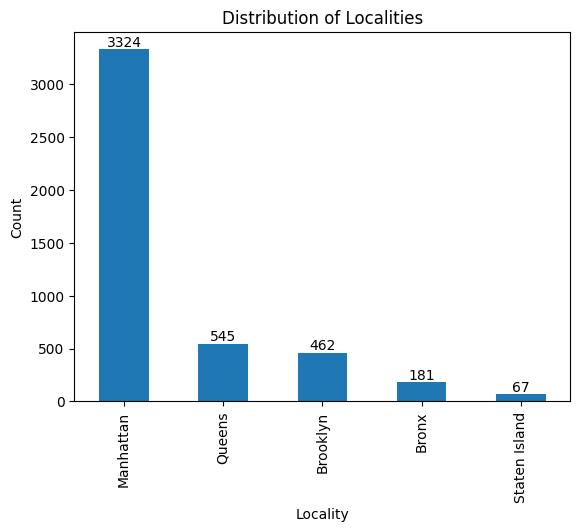

In [130]:
# Create the distribution bar chart
loc_counts = df1['locality'].value_counts()
loc_counts.plot(kind='bar')

# Add annotations (value counts) on top of the bars
for i, count in enumerate(loc_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and axis labels
plt.title('Distribution of Localities')
plt.xlabel('Locality')
plt.ylabel('Count')

# Display the plot
plt.show()

In [131]:
# Localities grouped by average price and value counts
loc_count_mean = df1.groupby('locality')['price_mil'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as Locality with more than 2 value counts
loc_count_mean[loc_count_mean['count']>2].sort_values('mean', ascending = False)


locality  count      mean
2      Manhattan   3324  2.346835
1       Brooklyn    462  0.882926
4  Staten Island     67  0.628563
3         Queens    545  0.445772
0          Bronx    181  0.339165

In [132]:
# Localities grouped by average property sizeand value counts
loc_count_mean = df1.groupby('locality')['property_sqft'].agg(['count', 'mean']).reset_index().sort_values('count', ascending = False)
# Filter as Locality with more than 2 value counts
loc_count_mean[loc_count_mean['count']>2].sort_values('mean', ascending = False)

locality  count         mean
2      Manhattan   3324  2434.314681
3         Queens    545  1581.730275
4  Staten Island     67  1385.313433
1       Brooklyn    462  1359.606061
0          Bronx    181  1210.740331

Known as a financial district and iconic landmarks, Mahattan is shown as the most popular borough with 3324 houses for sale and the highest average price of houses - **$2.3 Million**. Additionally, it also has the largest size as average of 2434 for each house. Although Bronx is well known as a rich historical borough, it is recorded as the borough having lowest average price of houses (340 Thousand Dollars), and smallest size (1210 sq.ft) for each house based on this dataset. And Staten Island is the least popular area with only 67 houses for sale.  

## 5. Multicariate Analysis

### 5.1. Numerical vs Numerical

<ipython-input-133-8a433e53b793>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

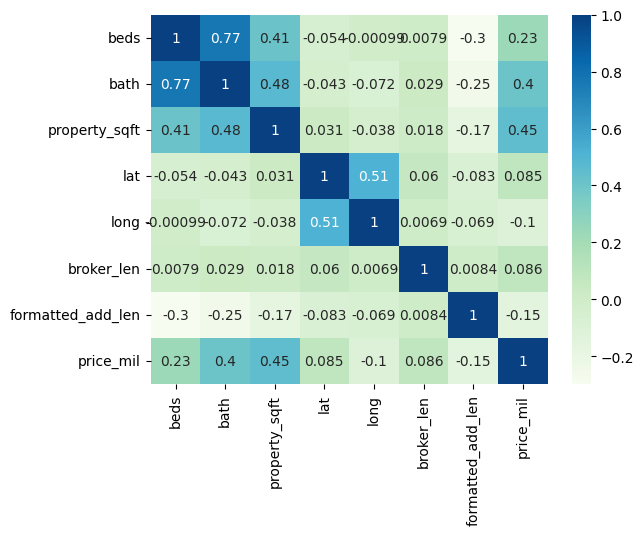

In [133]:
# The correatiob matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = 'GnBu', annot = True)

<ipython-input-134-513e33911d34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


<Axes: >

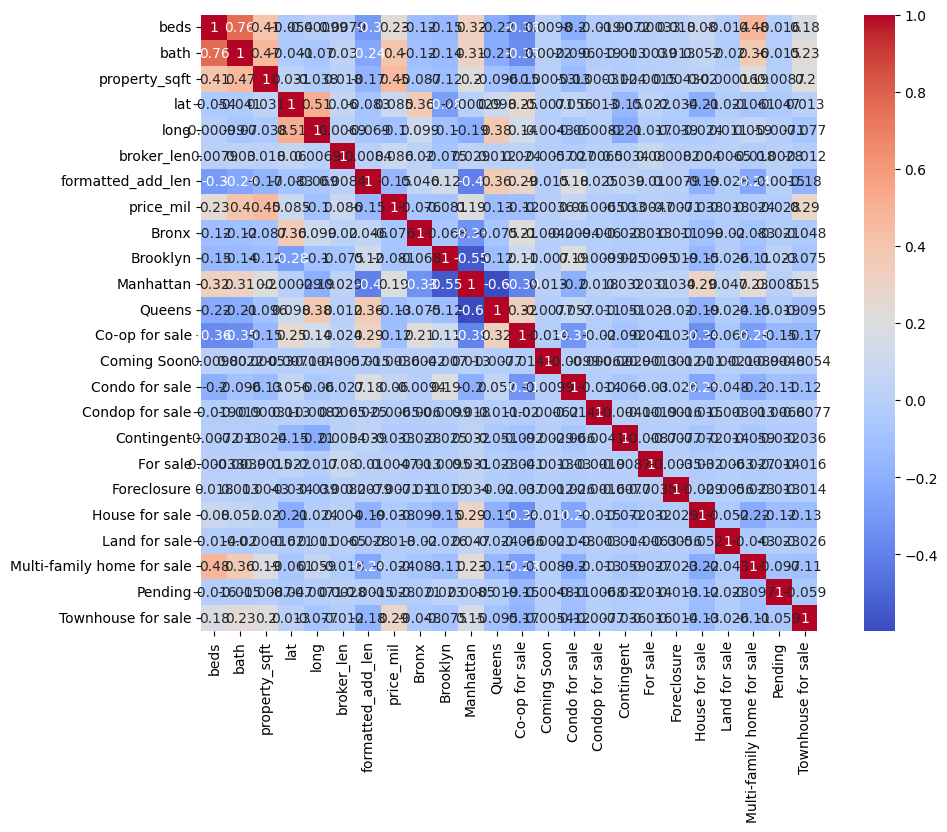

In [134]:
correlation = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)

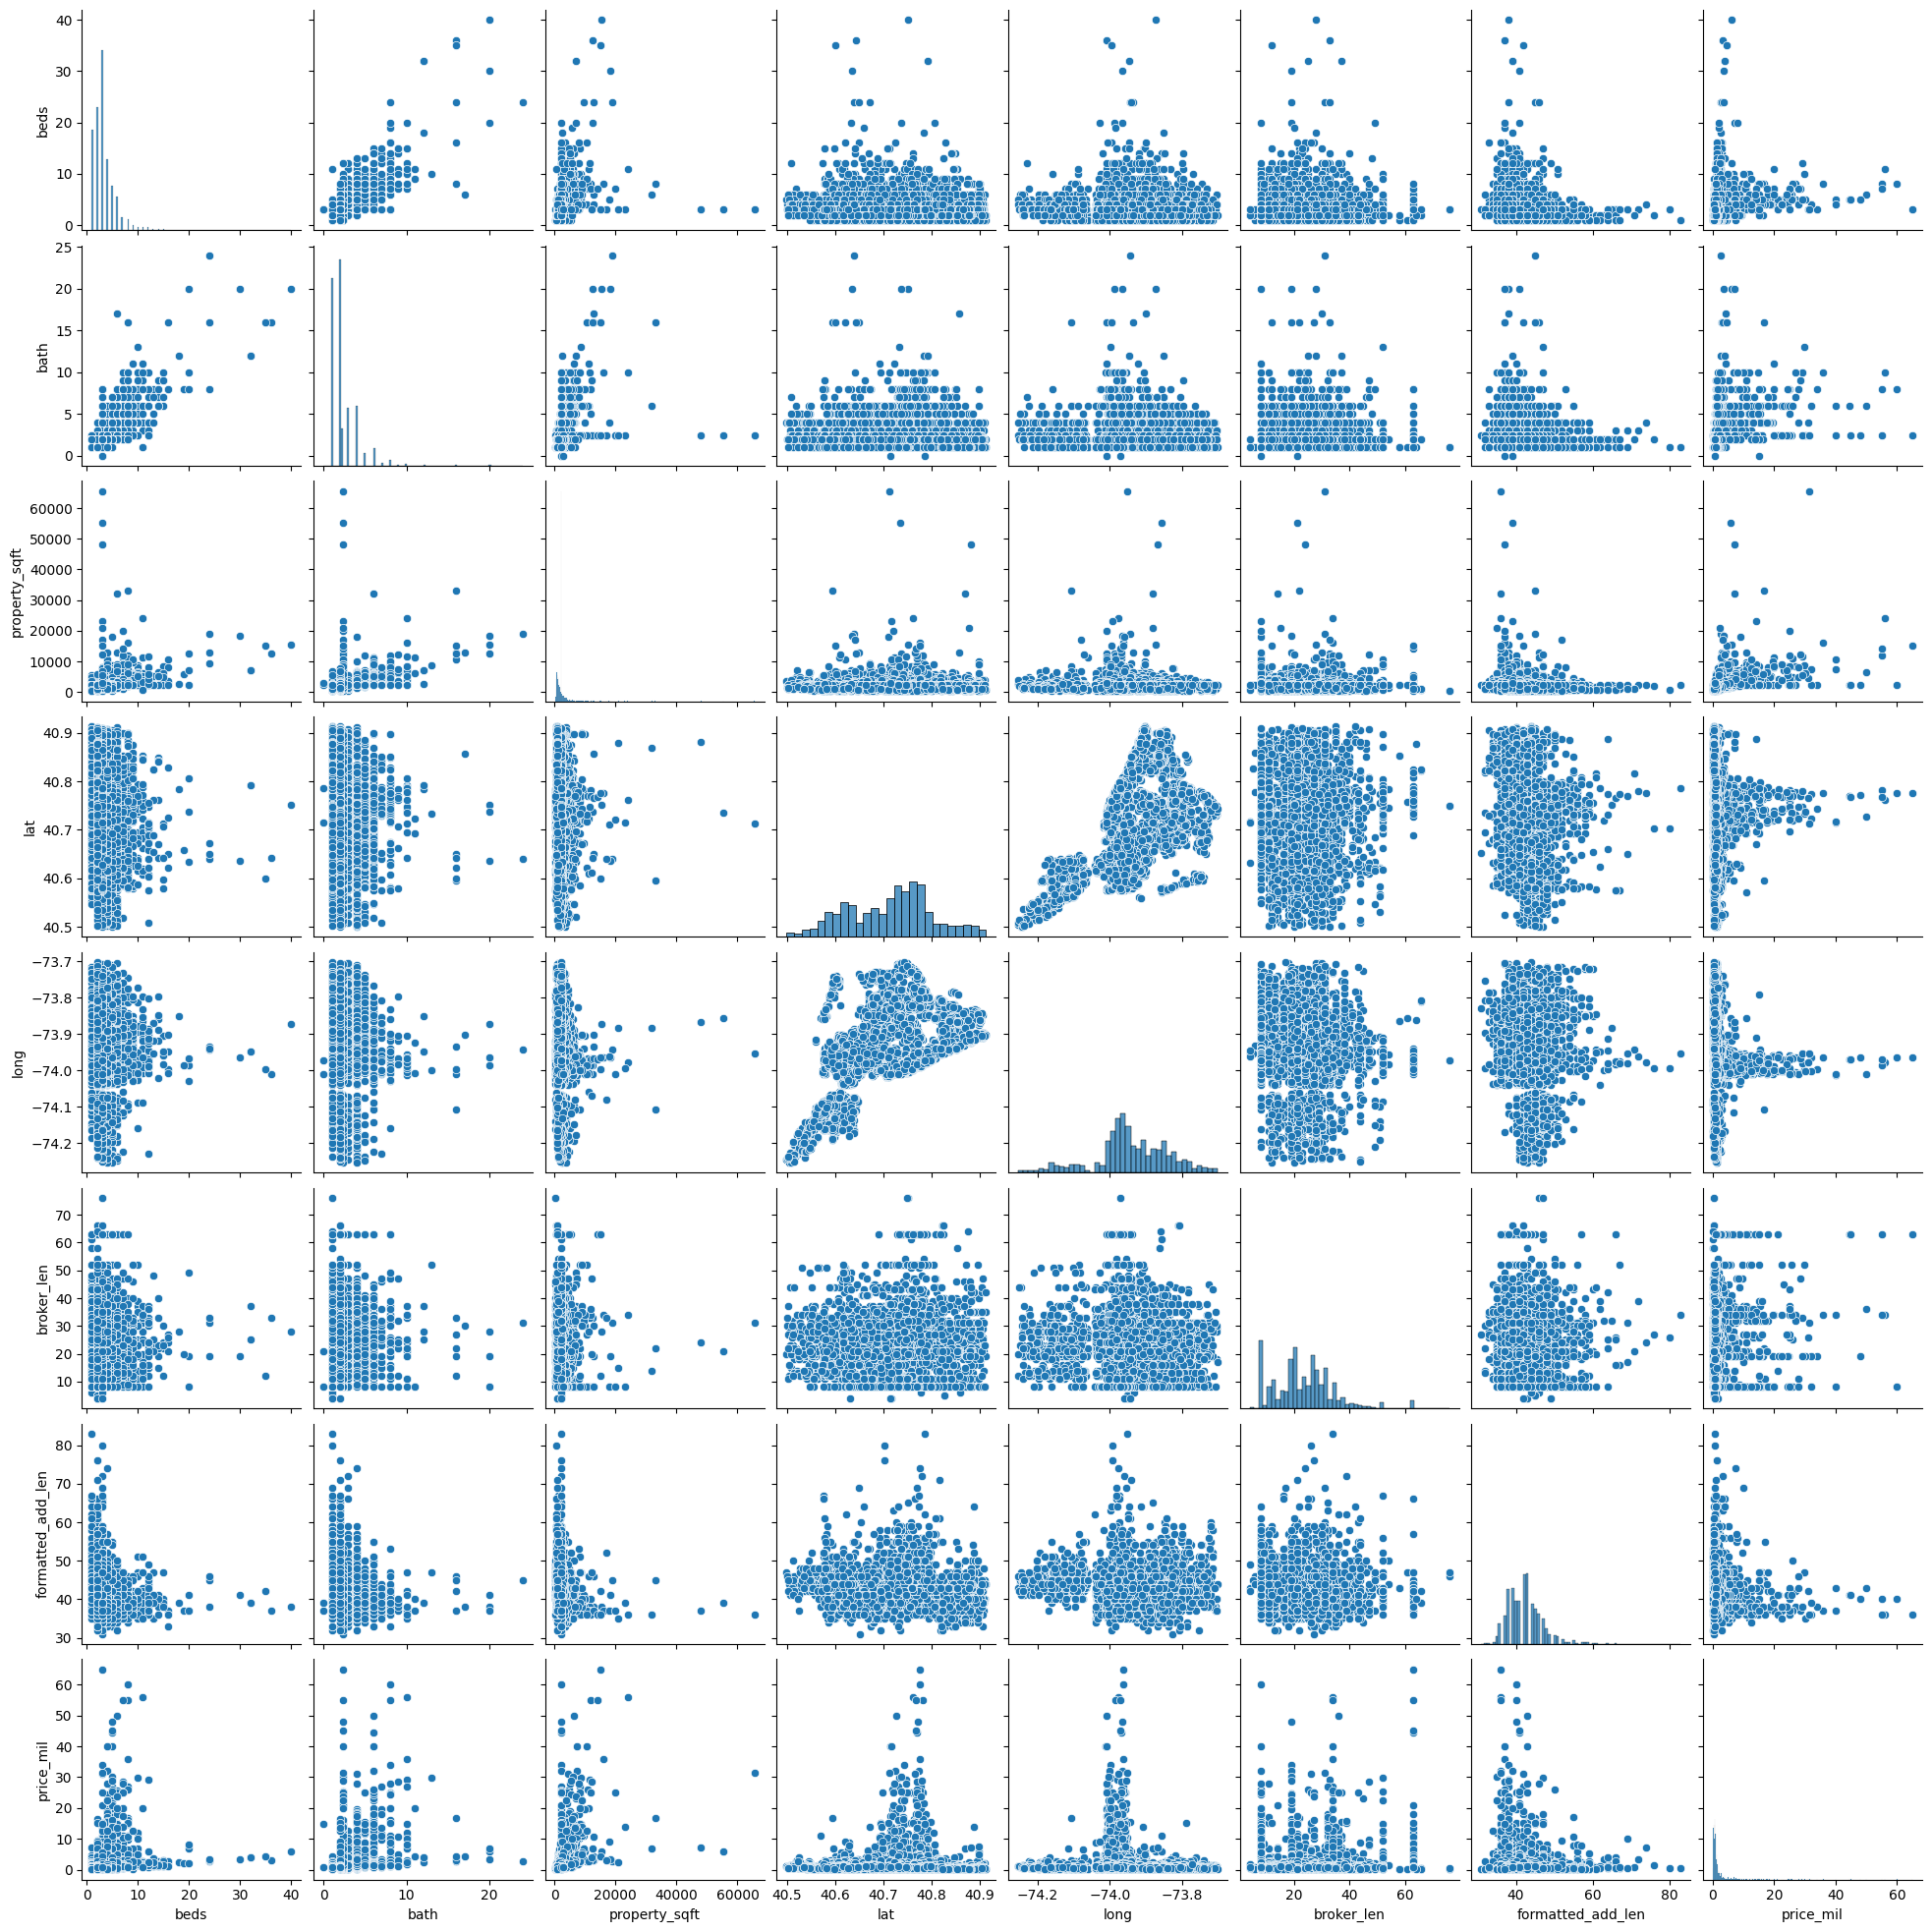

In [135]:
# Pairplot
sns.pairplot(df, height = 2.5)

### 5.2. Categorical vs. Categorical

* Top 10 Broker Titles vs. Types and vs. Localities

<ipython-input-136-96ed41b4f053>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)


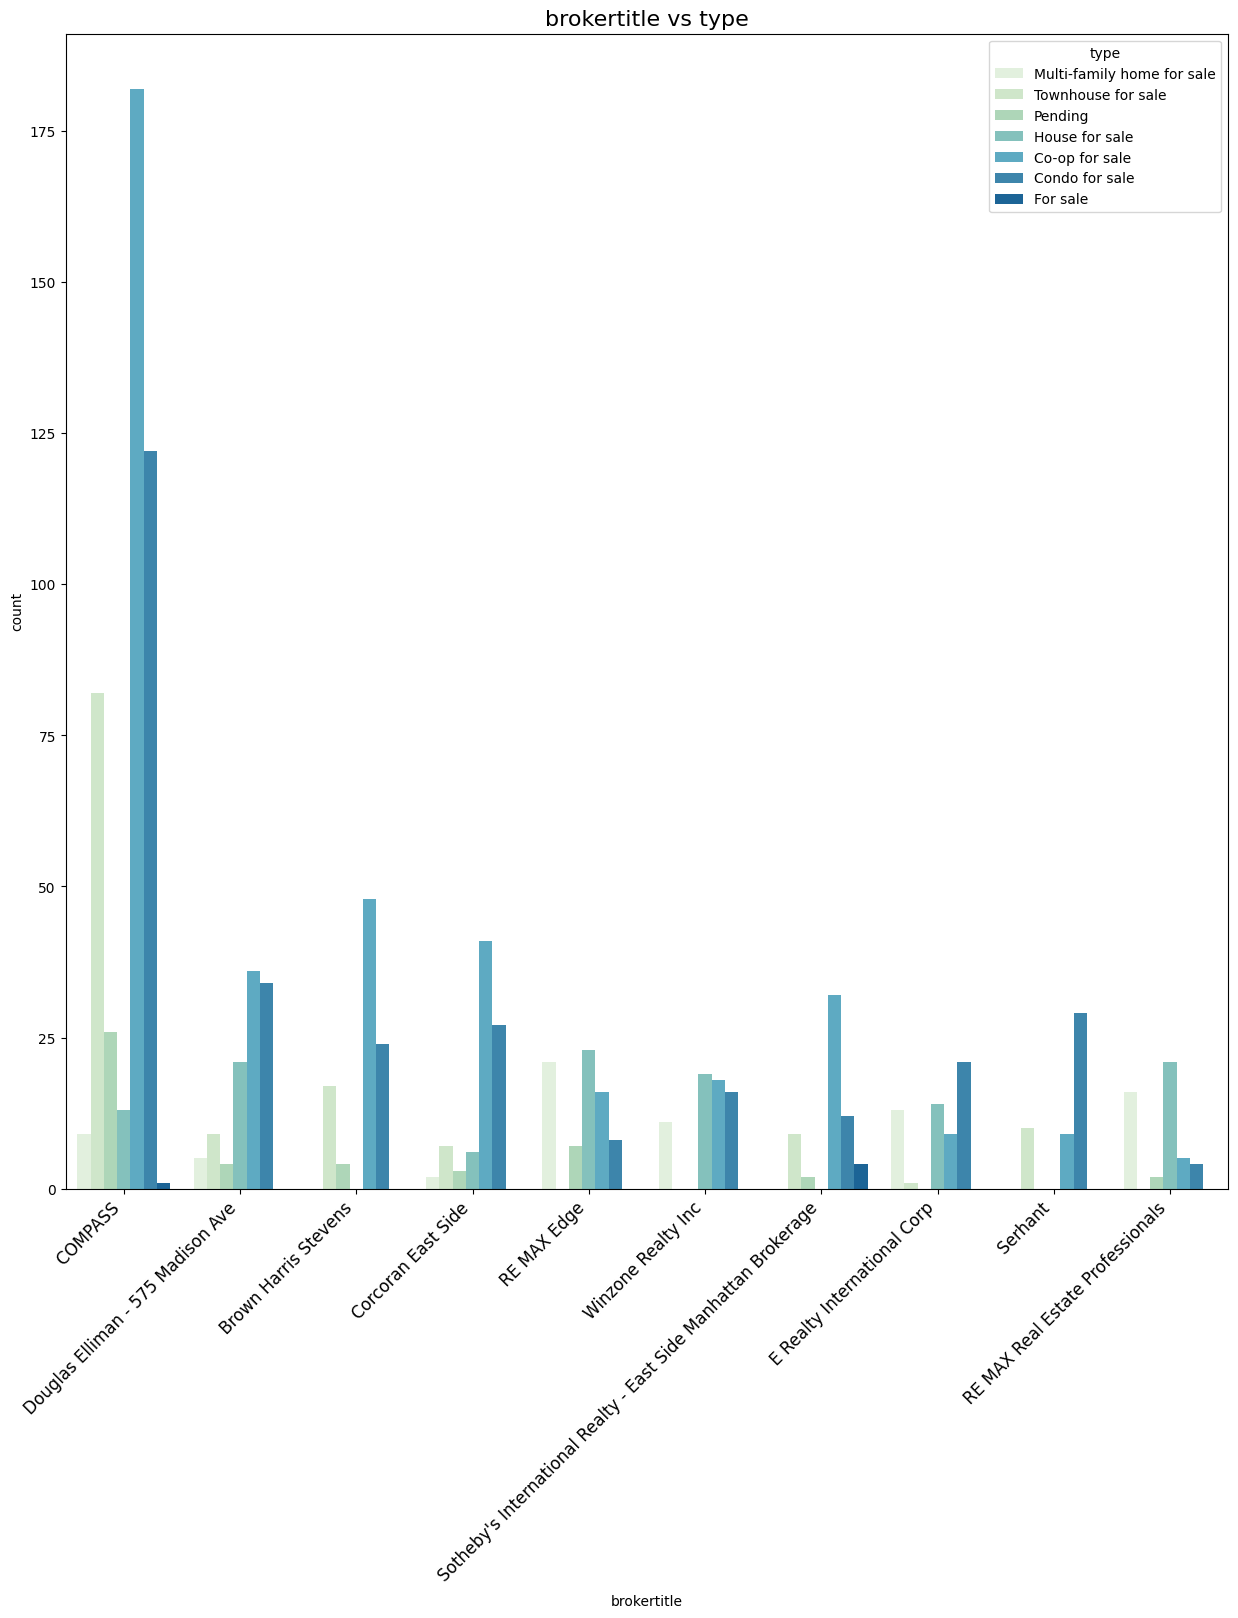

<ipython-input-136-96ed41b4f053>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)


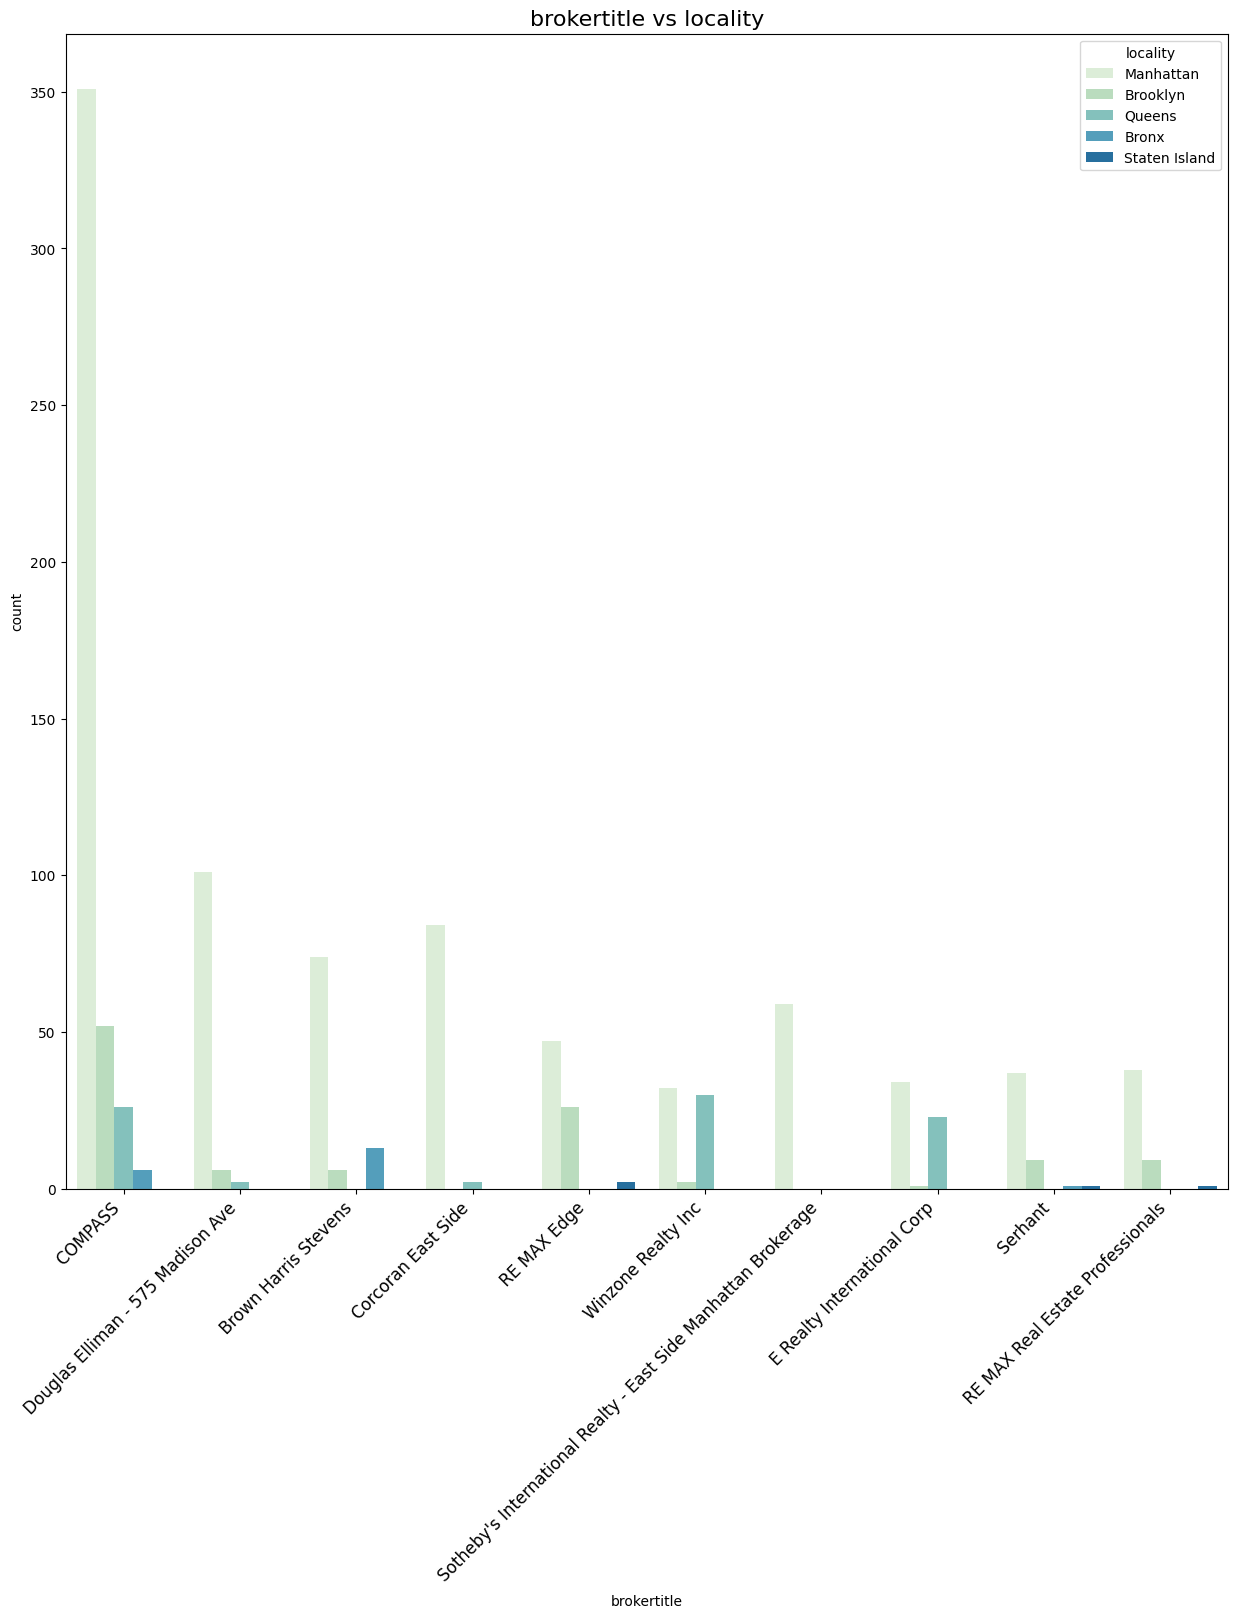

In [136]:
if 'brokertitle' in cat_df1:
    primary_cat = 'brokertitle'
    top_brokertitles = df[primary_cat].value_counts().iloc[:10].index

    for secondary_cat in cat_df1:
        if secondary_cat != primary_cat:
            plt.figure(figsize=(15, 15))
            chart = sns.countplot(
                data=df[df[primary_cat].isin(top_brokertitles)],
                x=primary_cat,
                hue=secondary_cat,
                palette='GnBu',
                order=top_brokertitles
            )
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)
            chart.set_title(f'{primary_cat} vs {secondary_cat}', fontsize=16)
            plt.show()


* Types vs. Broker Tittles

<ipython-input-137-1e2ca4a36726>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)


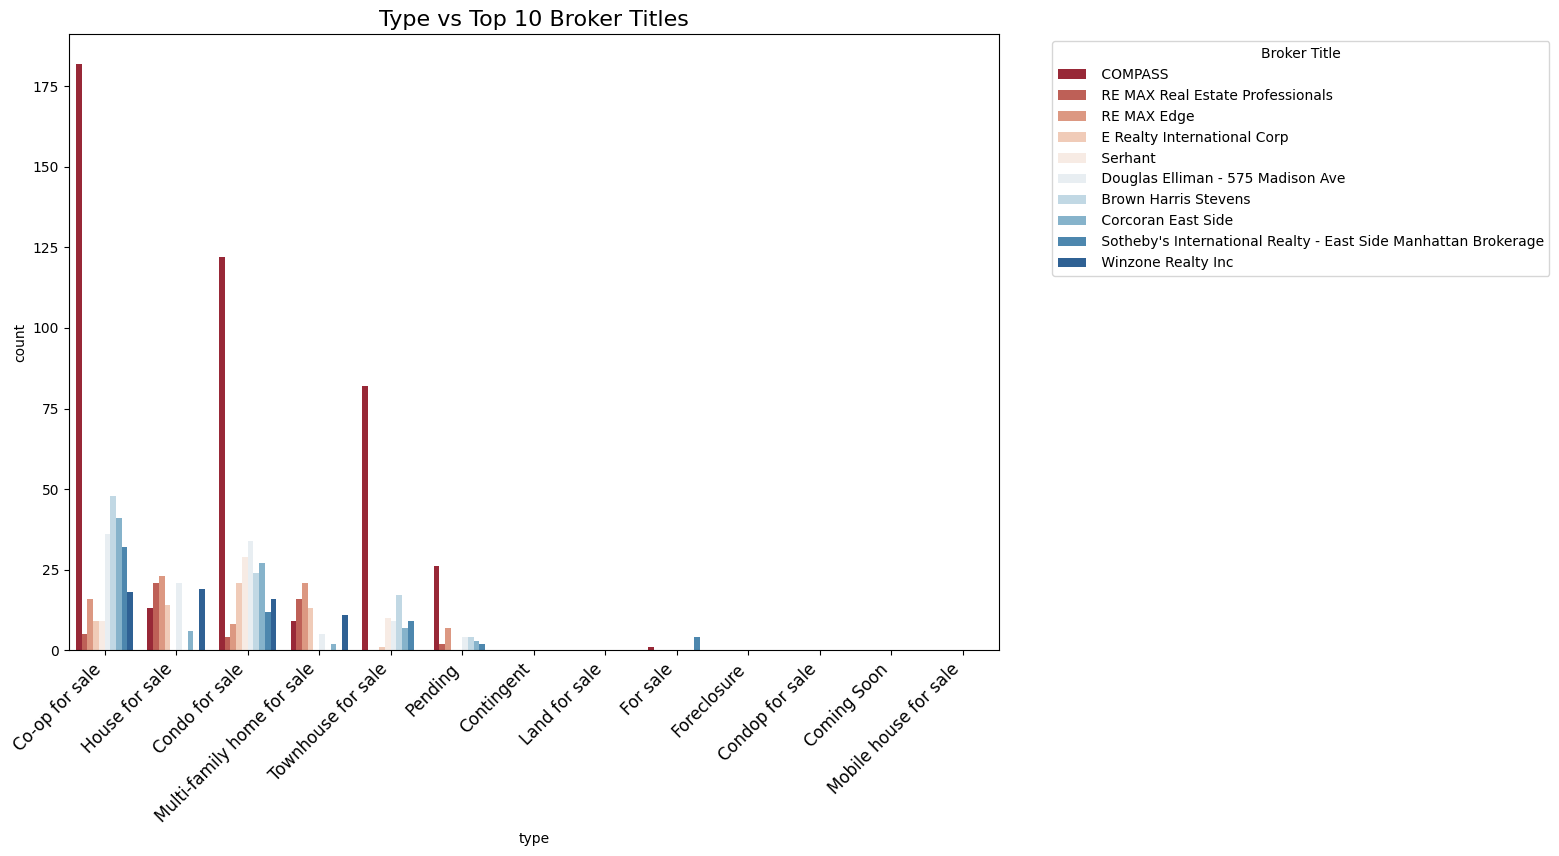

In [137]:
top_brokertitles = df1['brokertitle'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
chart = sns.countplot(
    data=df1[df1['brokertitle'].isin(top_brokertitles)],
    x='type',
    hue='brokertitle',
    palette='RdBu',
    order=df1['type'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)
chart.set_title('Type vs Top 10 Broker Titles', fontsize=16)
plt.legend(title='Broker Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Types vs. Localities

<ipython-input-138-7a410f51d096>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)


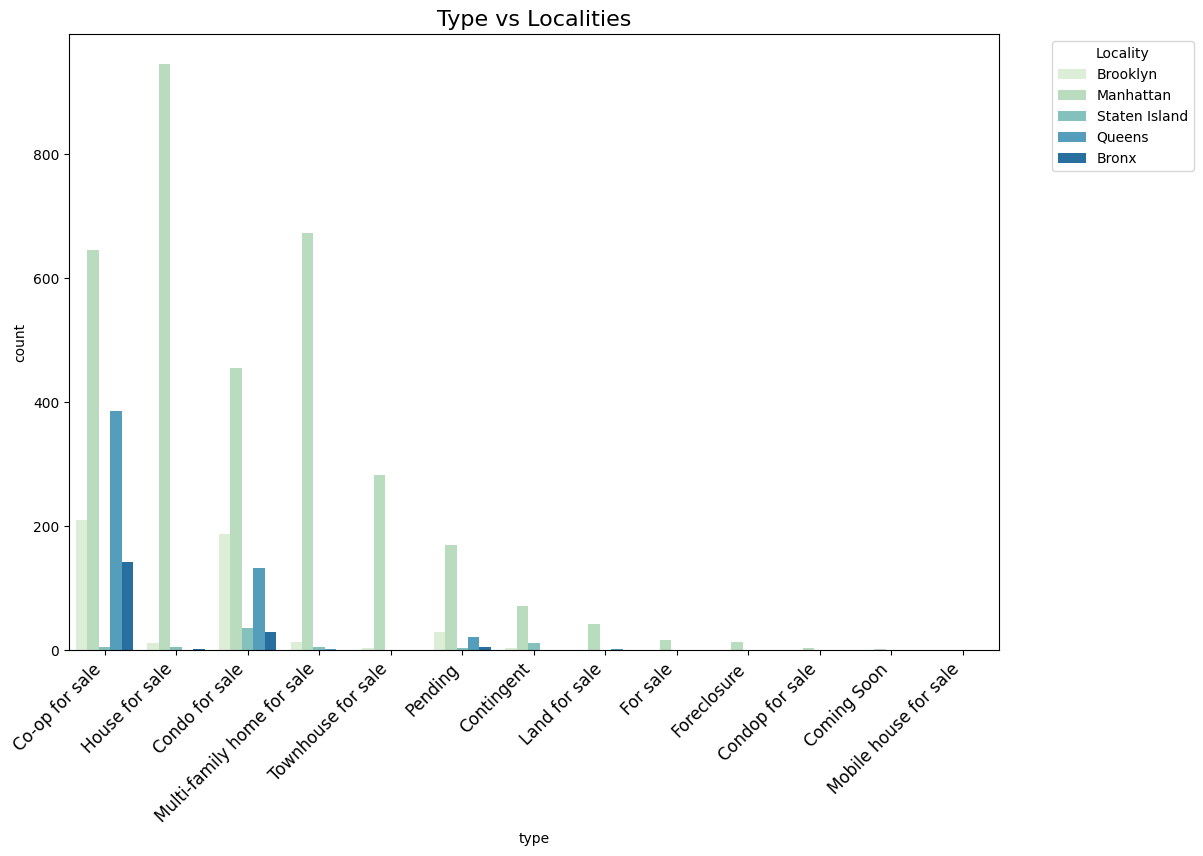

In [138]:
plt.figure(figsize=(12, 8))
chart = sns.countplot(
    data=df1[df1['locality'].notnull()],  # Filter out rows where 'locality' is null
    x='type',
    hue='locality',
    palette='GnBu',
    order=df1['type'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)
chart.set_title('Type vs Localities', fontsize=16)
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Localities vs. Broker Tites

<ipython-input-139-b87b2b12c74c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)


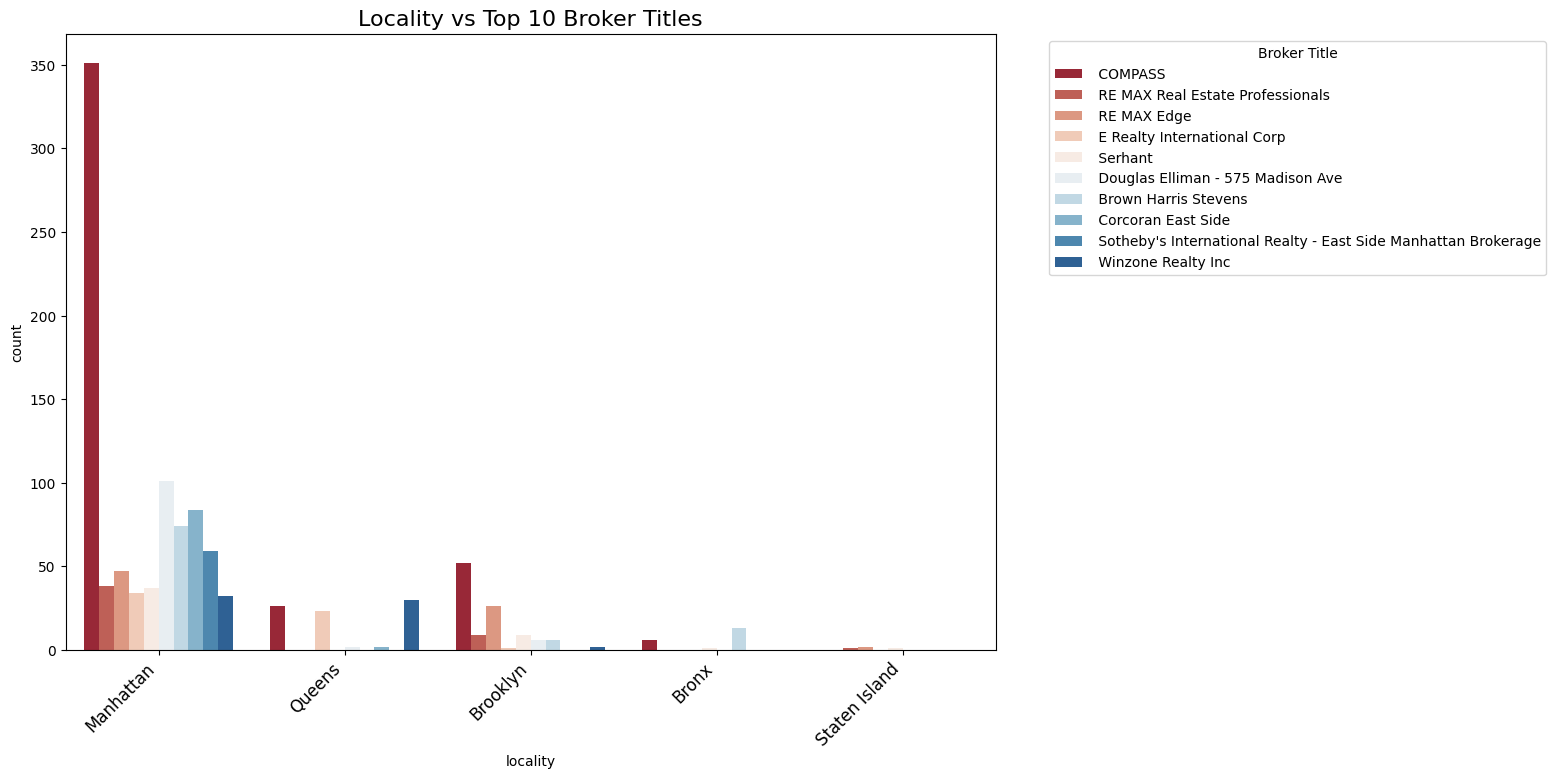

In [139]:
plt.figure(figsize=(12, 8))
chart = sns.countplot(
    data=df1[df1['brokertitle'].isin(top_brokertitles)],
    x='locality',
    hue='brokertitle',
    palette='RdBu',
    order=df1['locality'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)
chart.set_title('Locality vs Top 10 Broker Titles', fontsize=16)
plt.legend(title='Broker Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5.3. Categorical vs. Numerical

In [146]:
df.columns

Index(['brokertitle', 'type', 'beds', 'bath', 'property_sqft', 'address',
       'state', 'main_address', 'admin_area_lev2', 'locality', 'sublocality',
       'street_name', 'long_name', 'formatted_add', 'lat', 'long',
       'broker_len', 'formatted_add_len', 'price_mil', 'city'],
      dtype='object')

In [150]:
cat_df = df[['brokertitle', 'type', 'locality']]
num_df = df[['beds', 'bath', 'property_sqft', 'lat', 'long', 'broker_len', 'formatted_add_len','price_mil']]

* Type

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


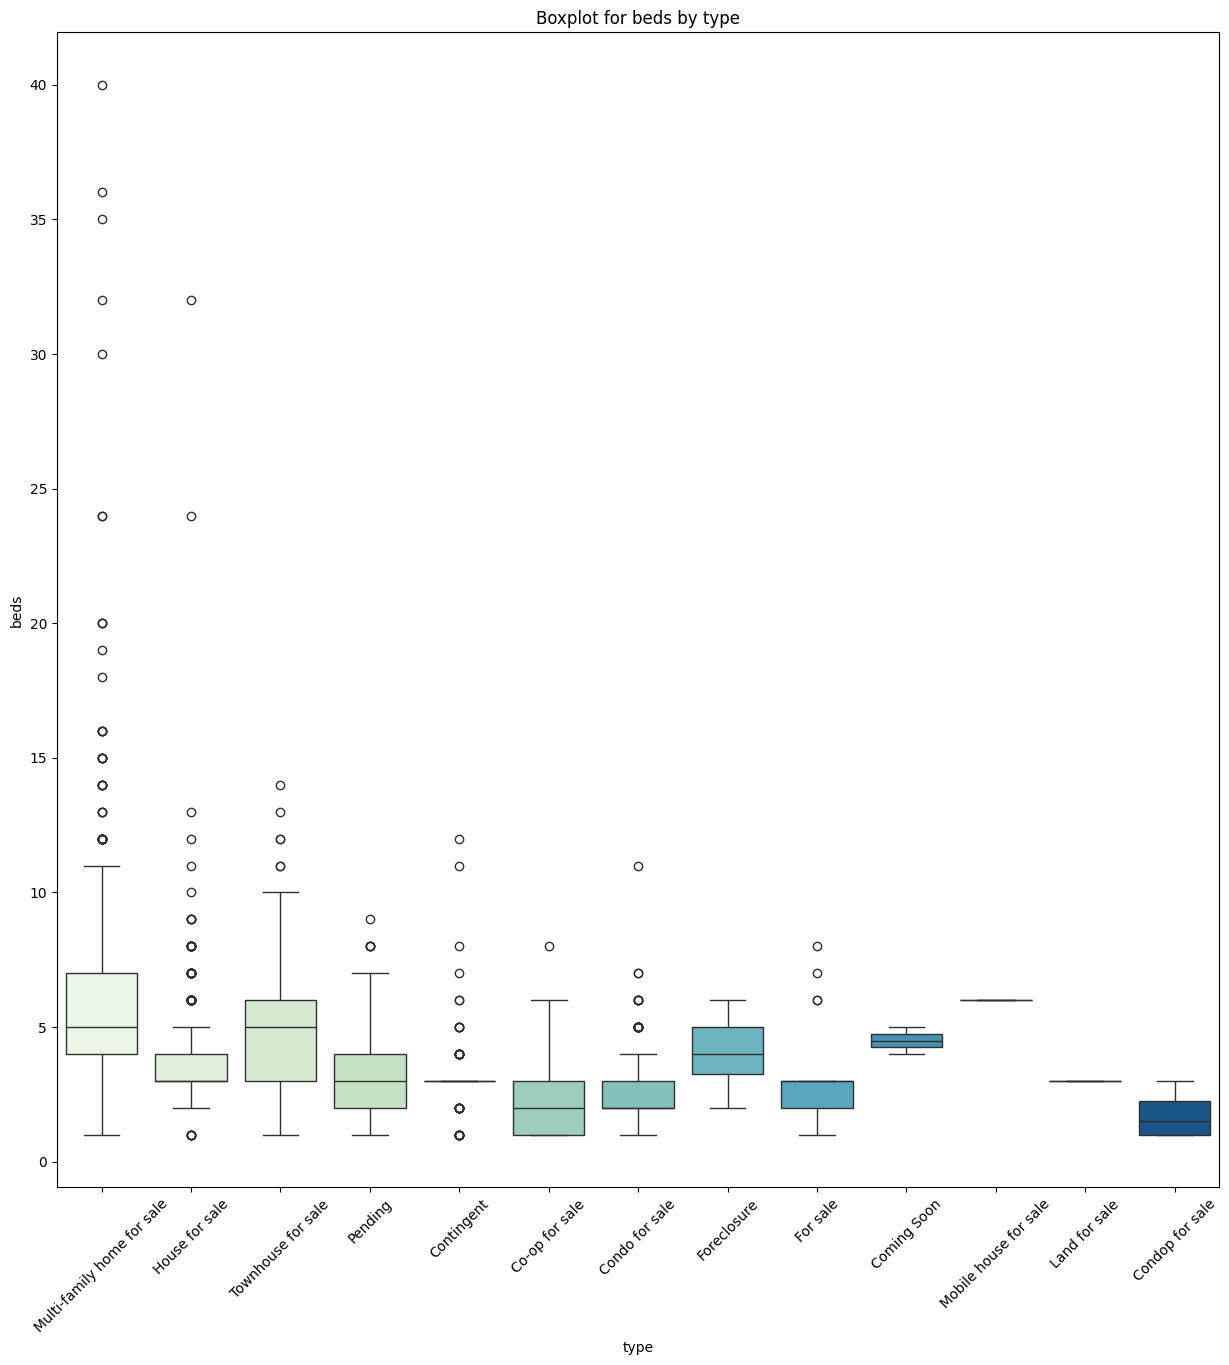

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


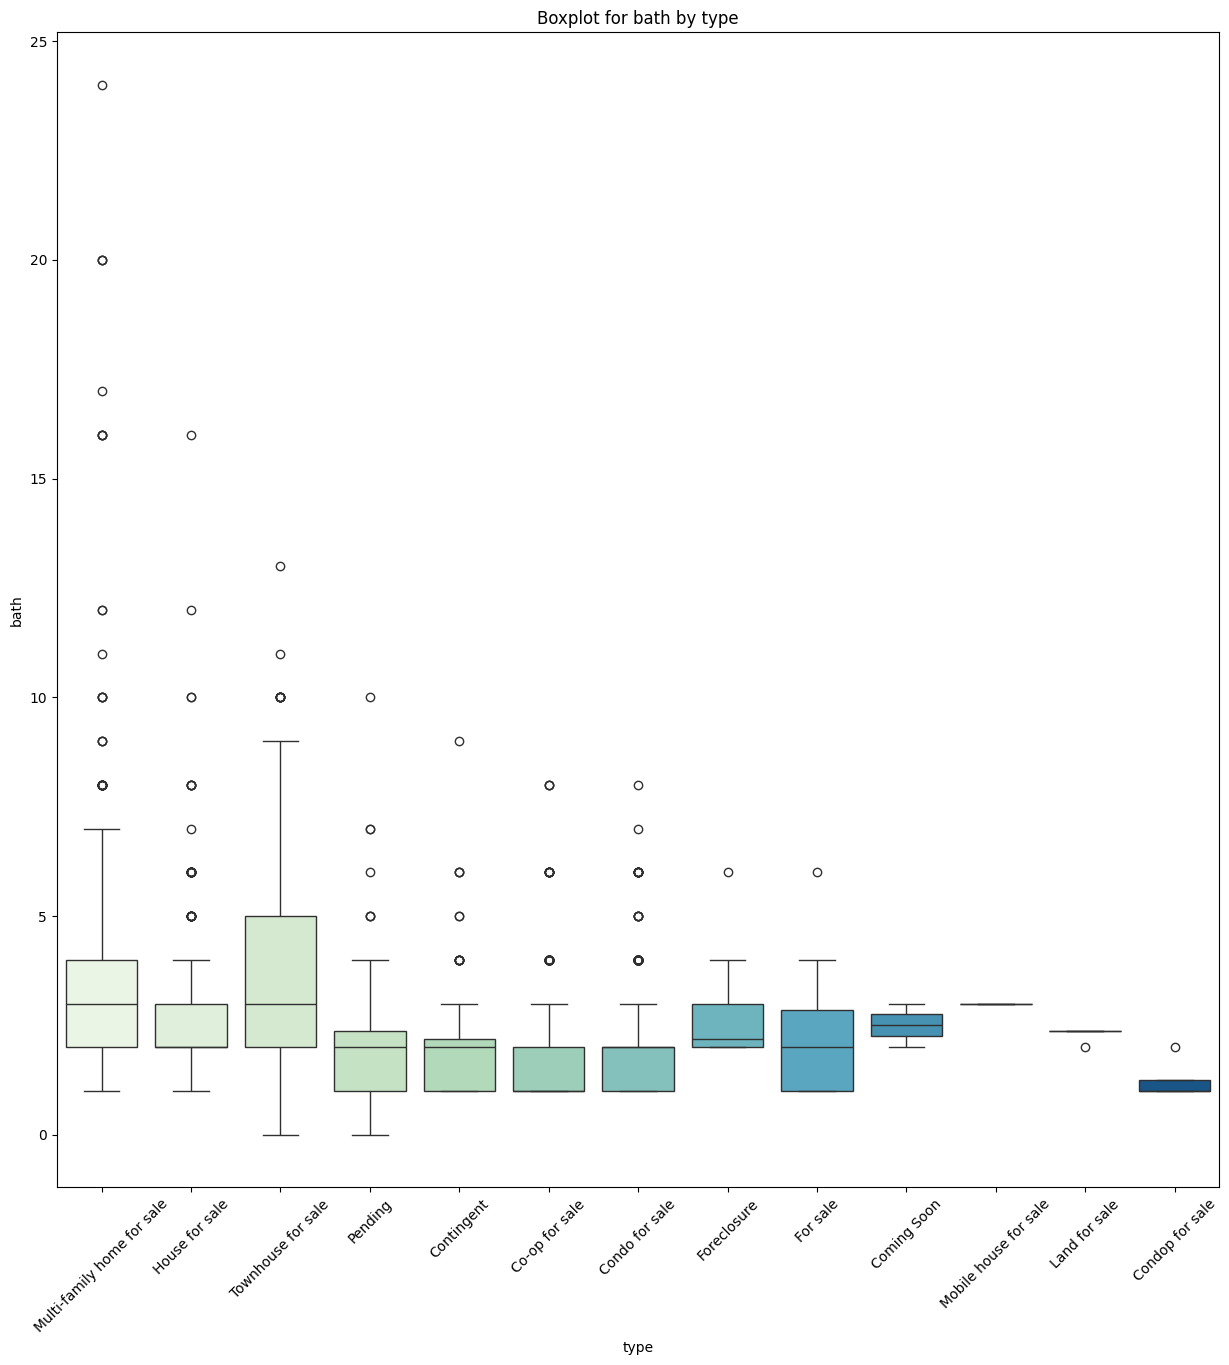

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


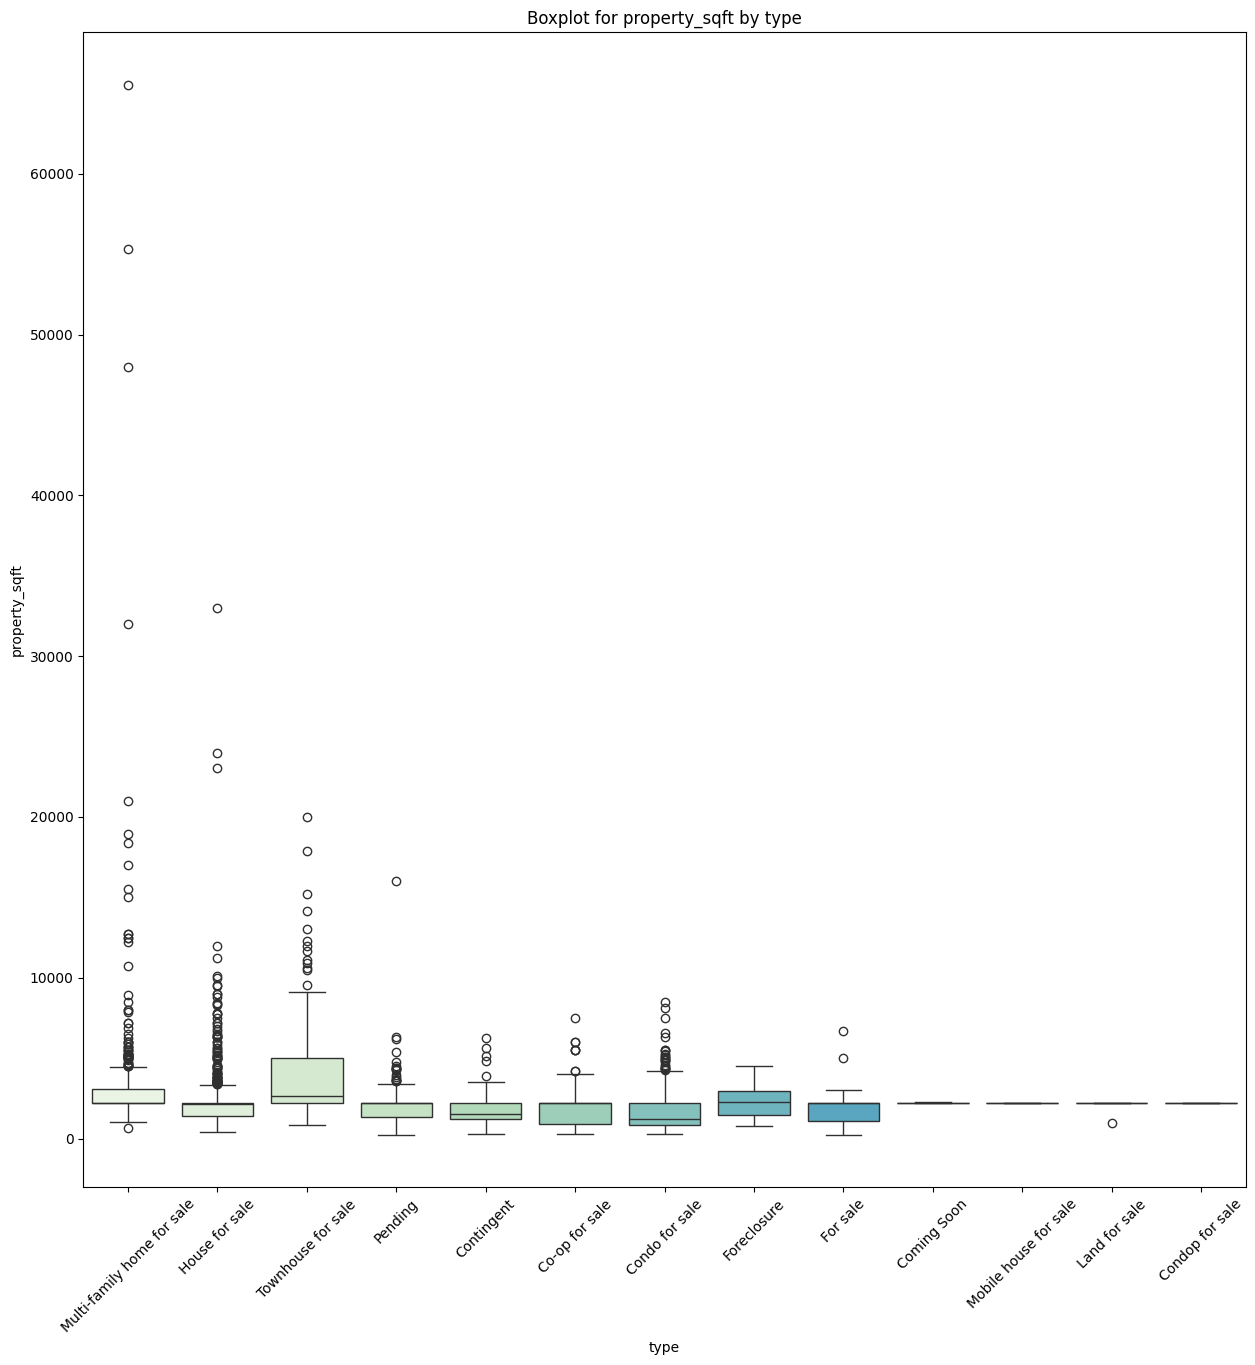

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


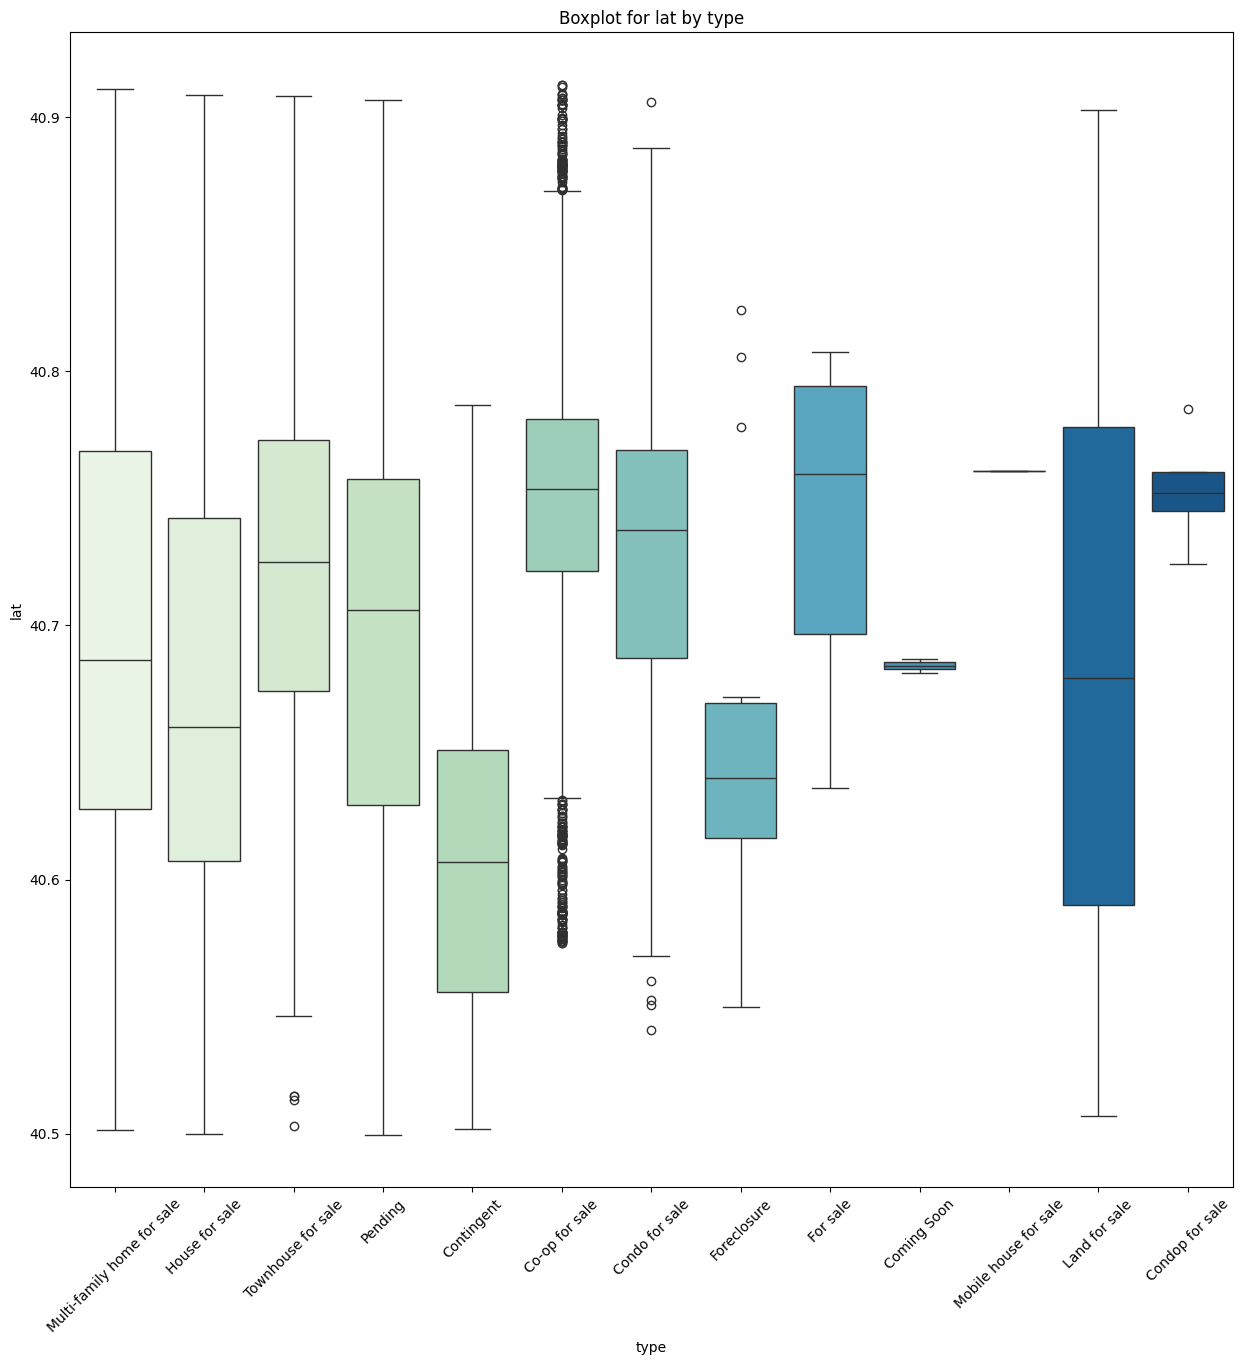

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


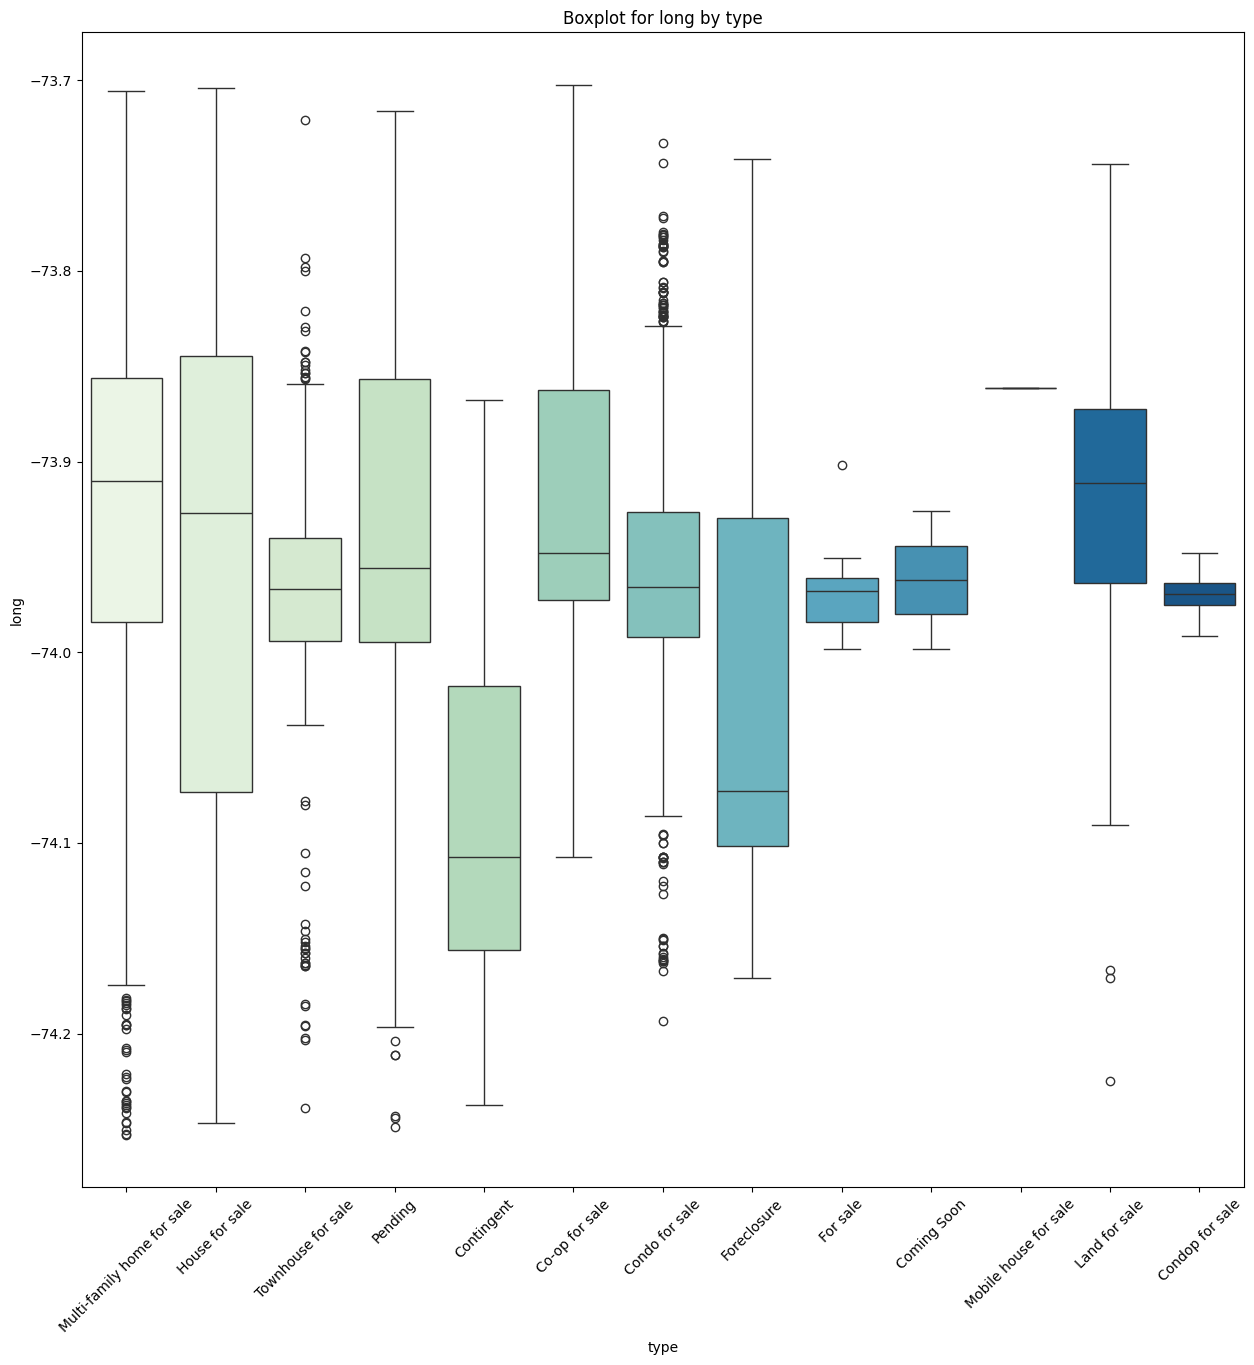

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


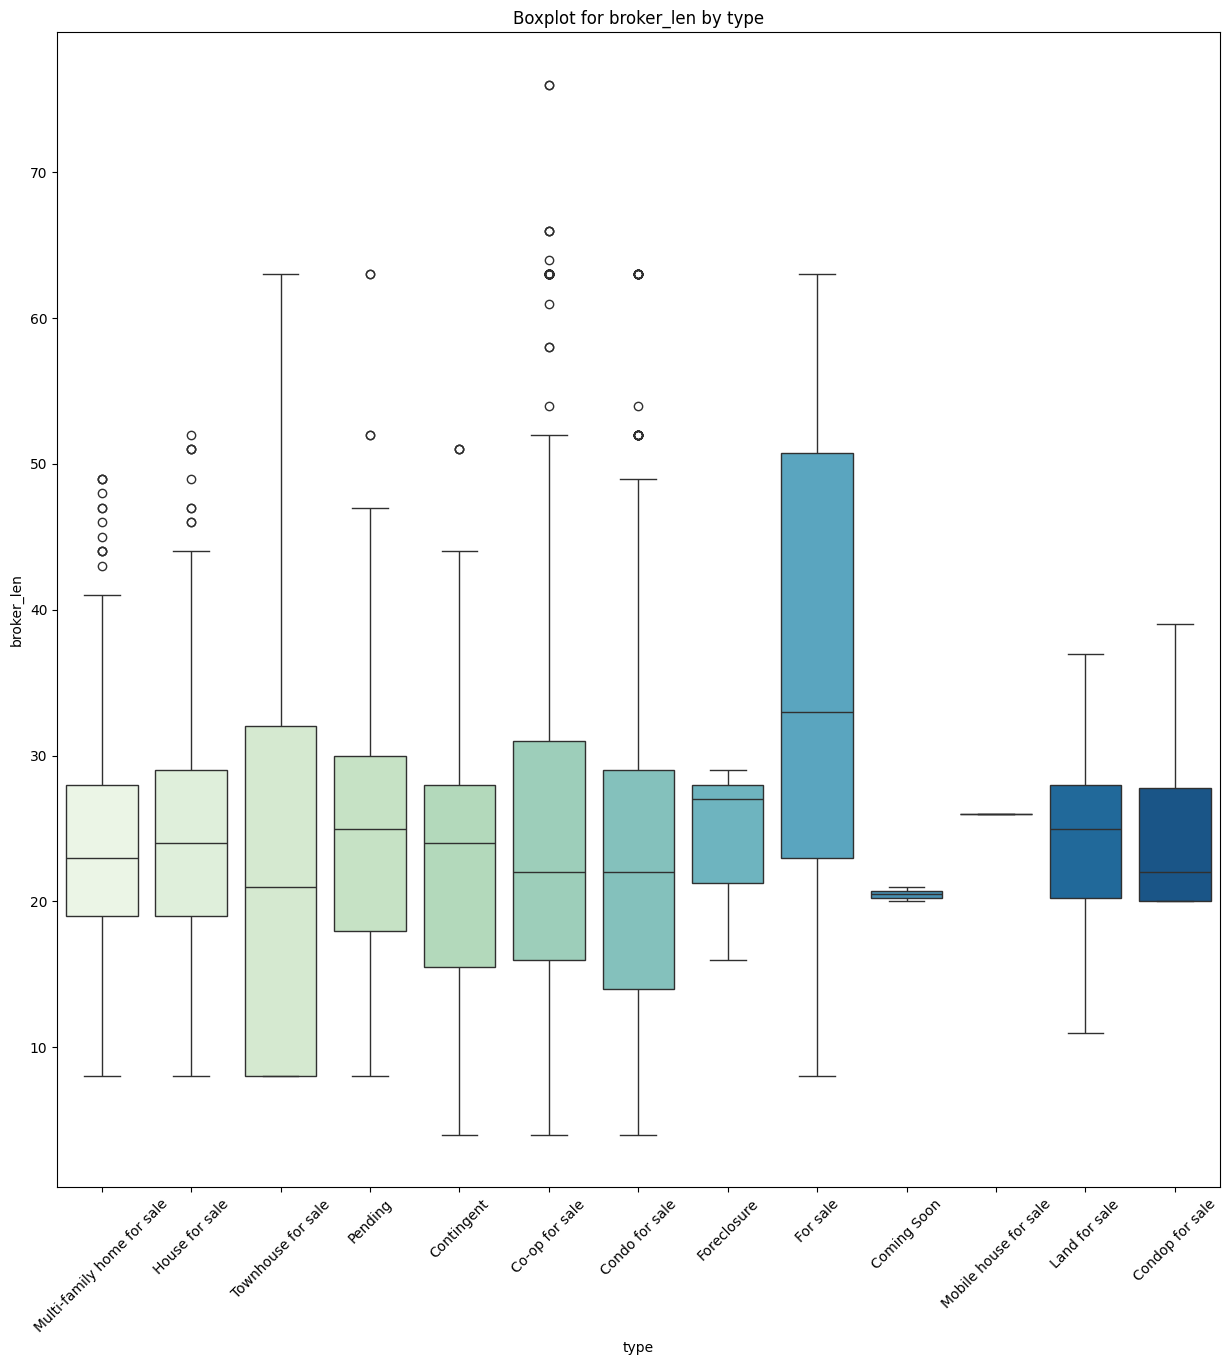

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


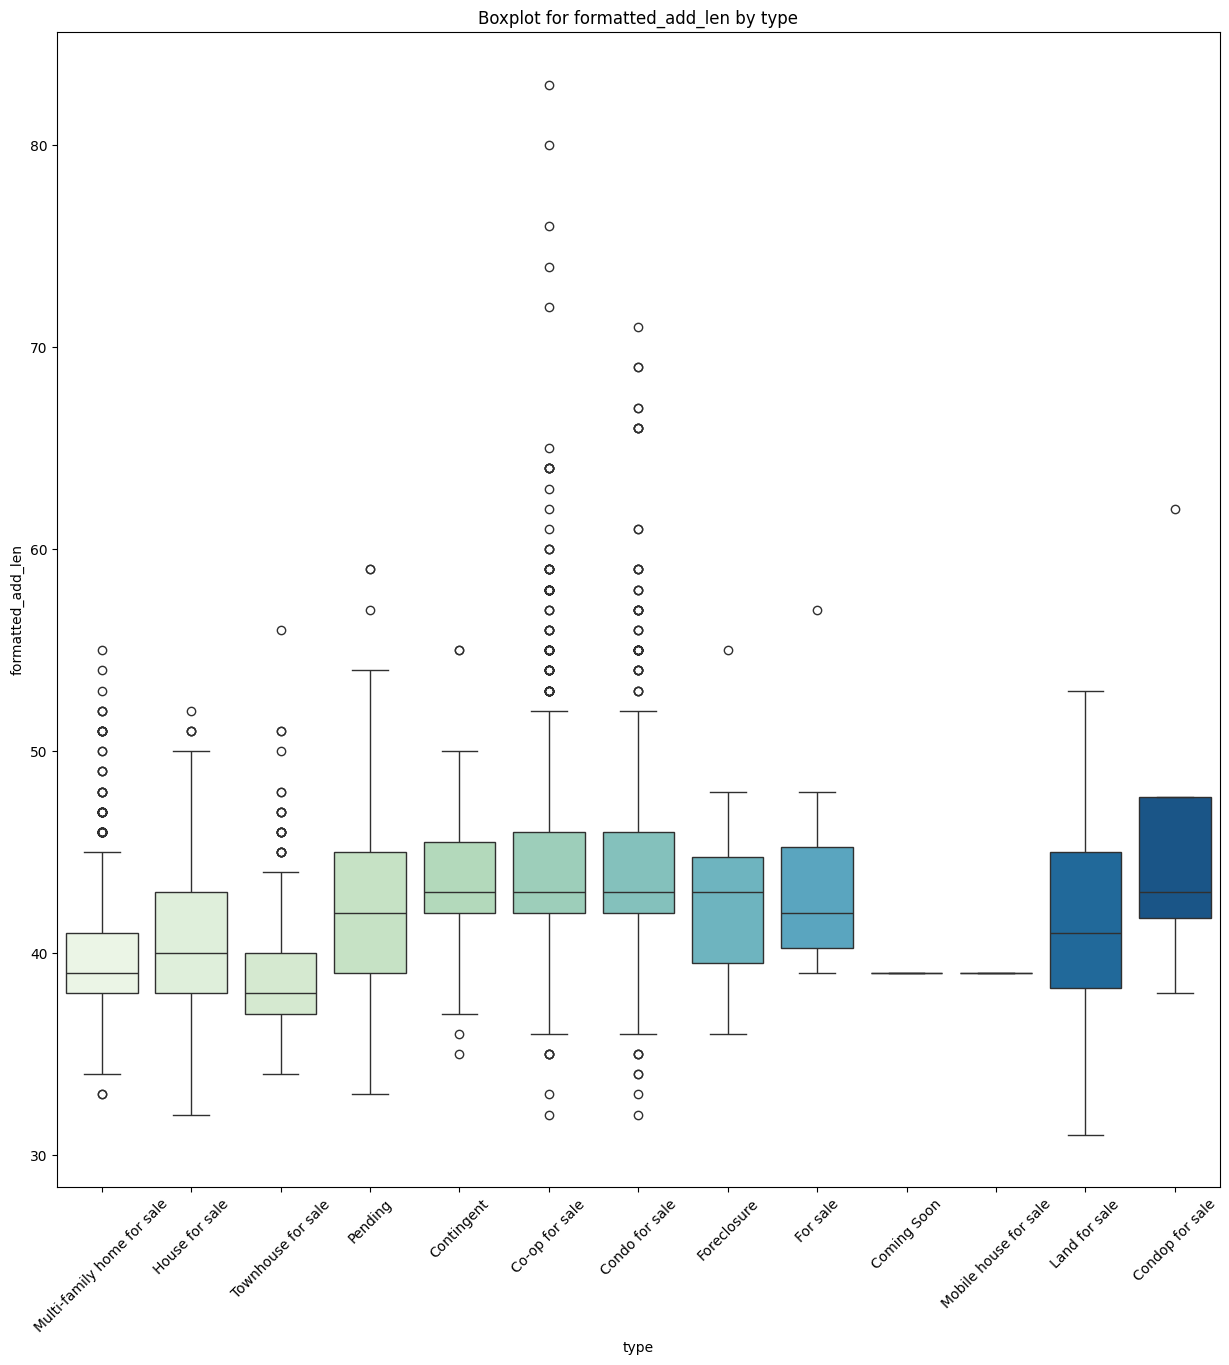

<ipython-input-154-9c53be6bda6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')


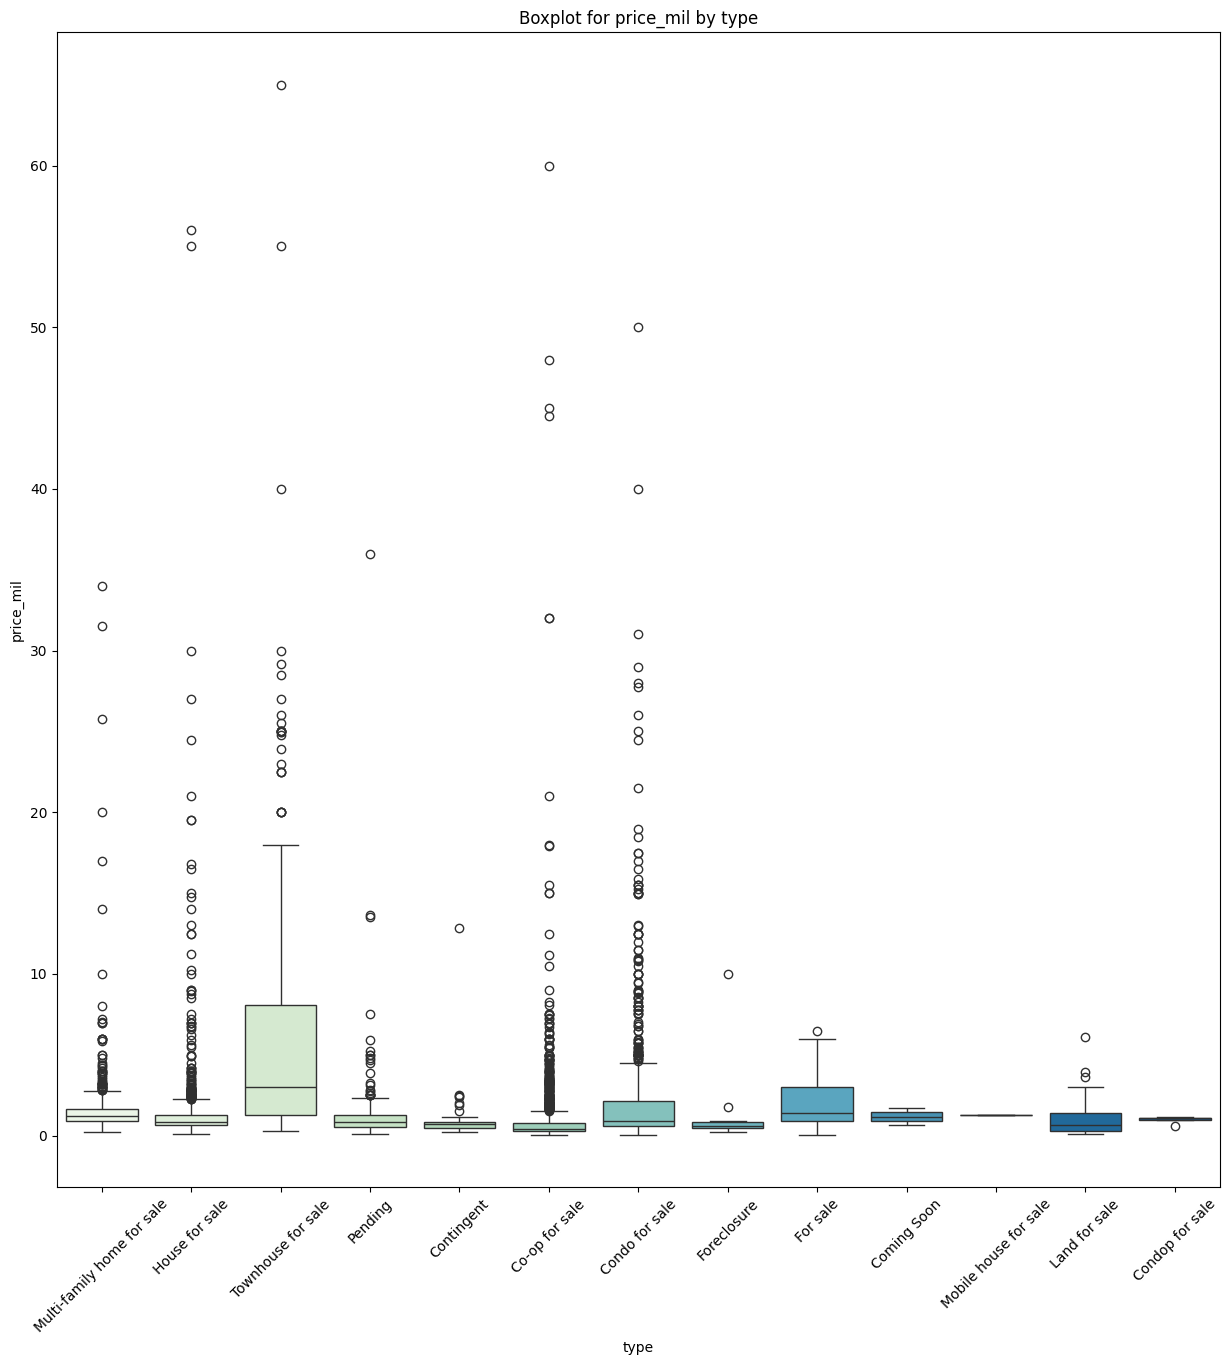

In [154]:
for i in range(len(num_df.columns)):
    num = num_df.iloc[:, i]
    plt.figure(figsize=(15, 15))
    sns.boxplot(x=cat_df.iloc[:, 1], y=num, data=df, palette='GnBu')
    plt.xticks(rotation = 45)
    plt.title(f'Boxplot for {num_df.columns[i]} by {cat_df.columns[1]}')
    plt.show()

* Broker Titles

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


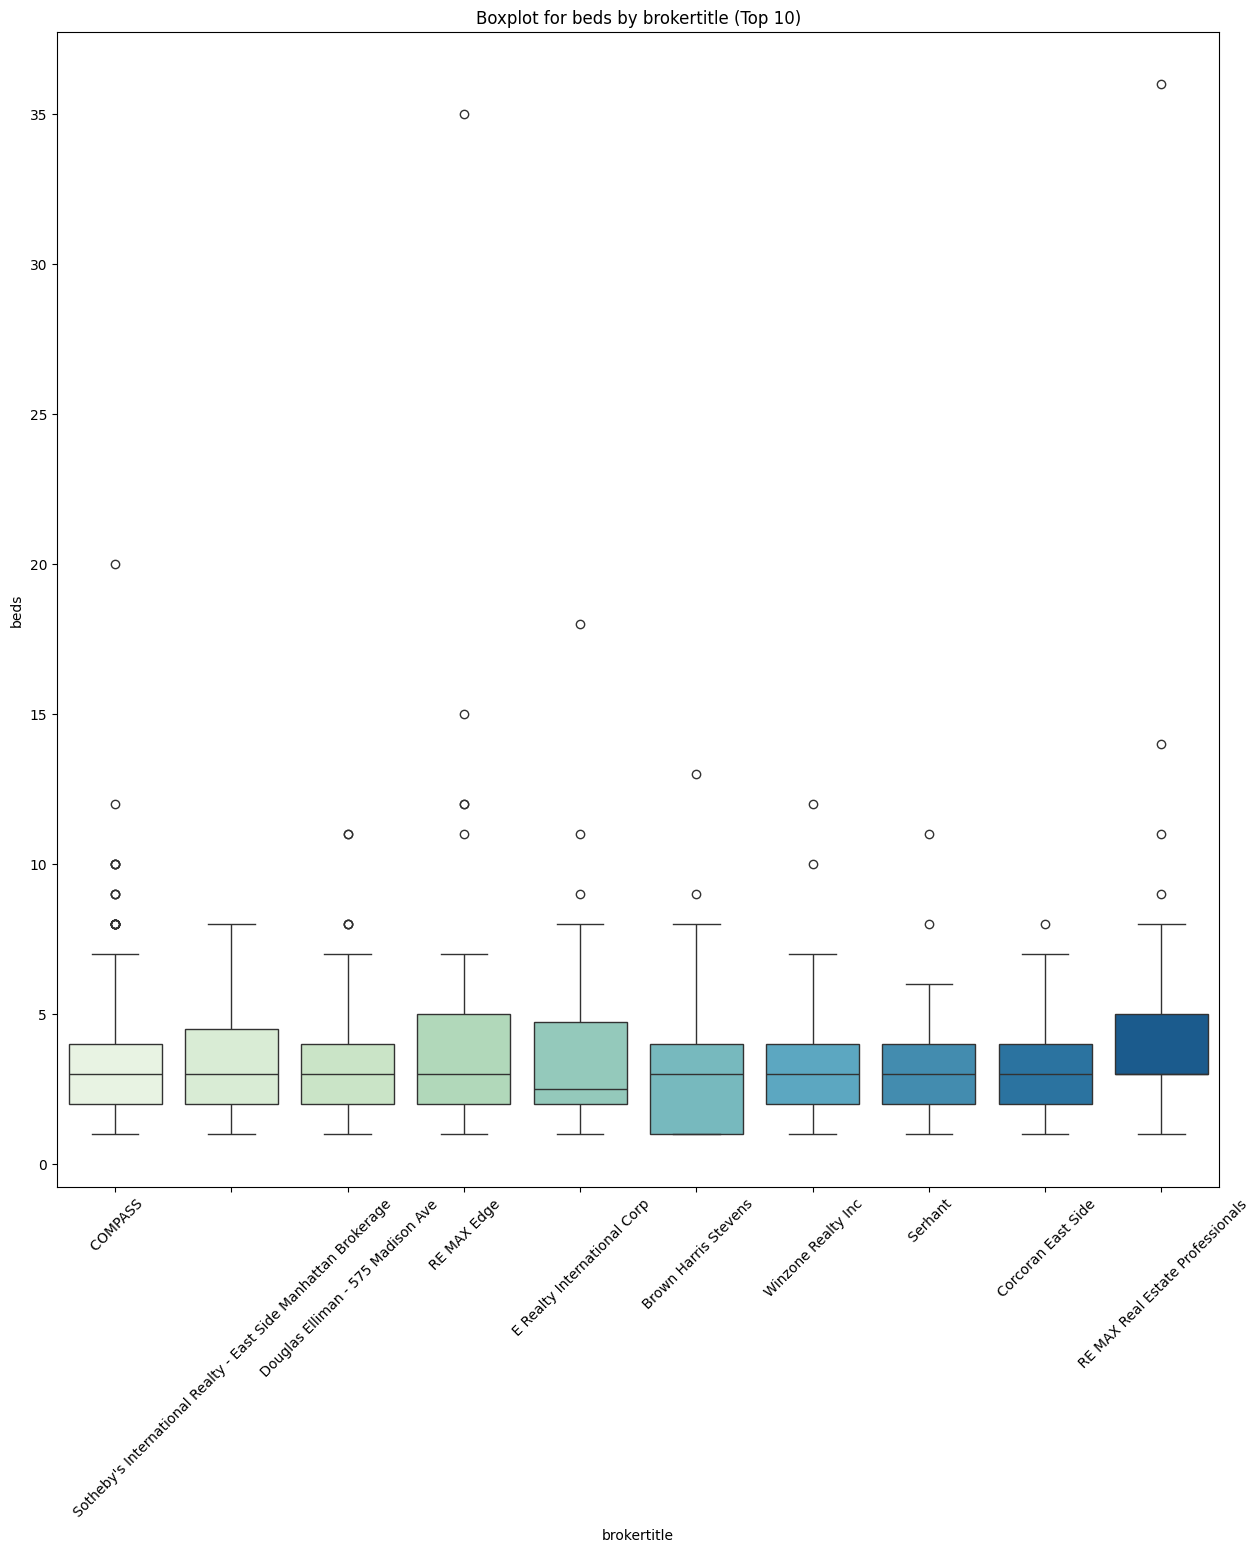

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


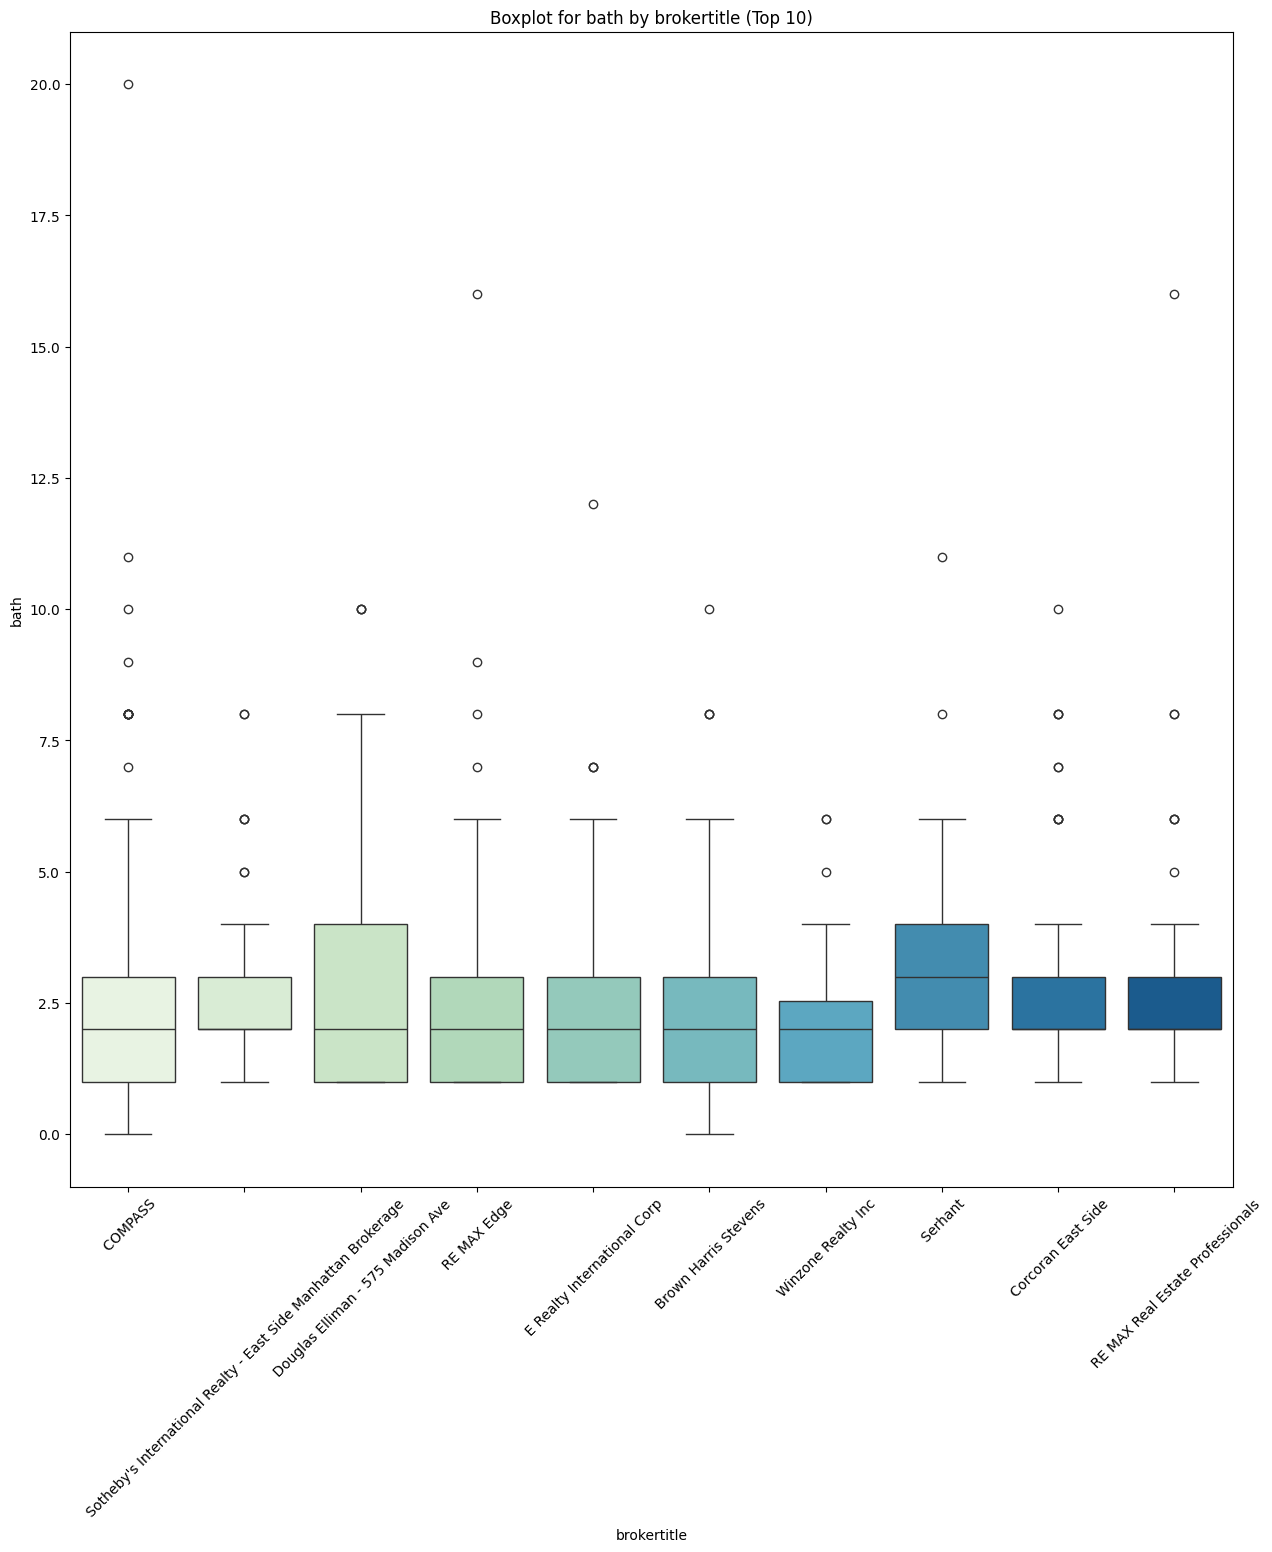

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


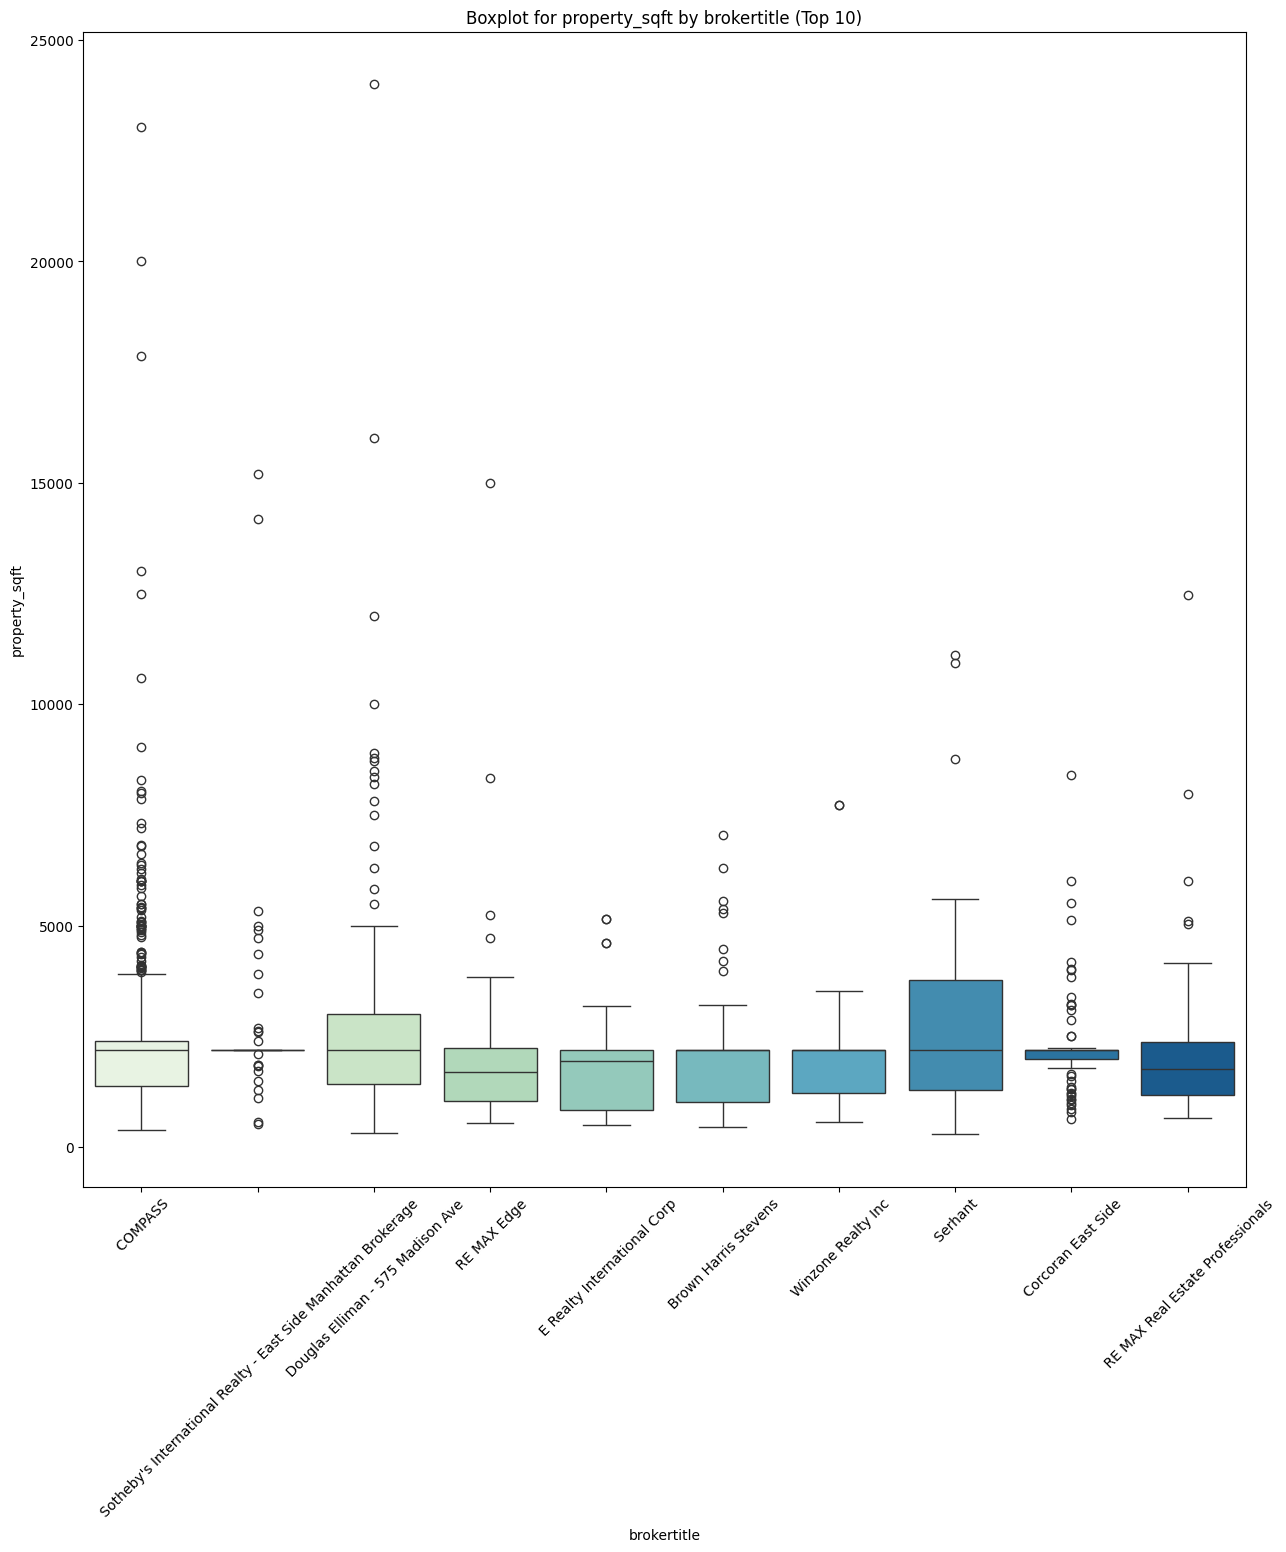

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


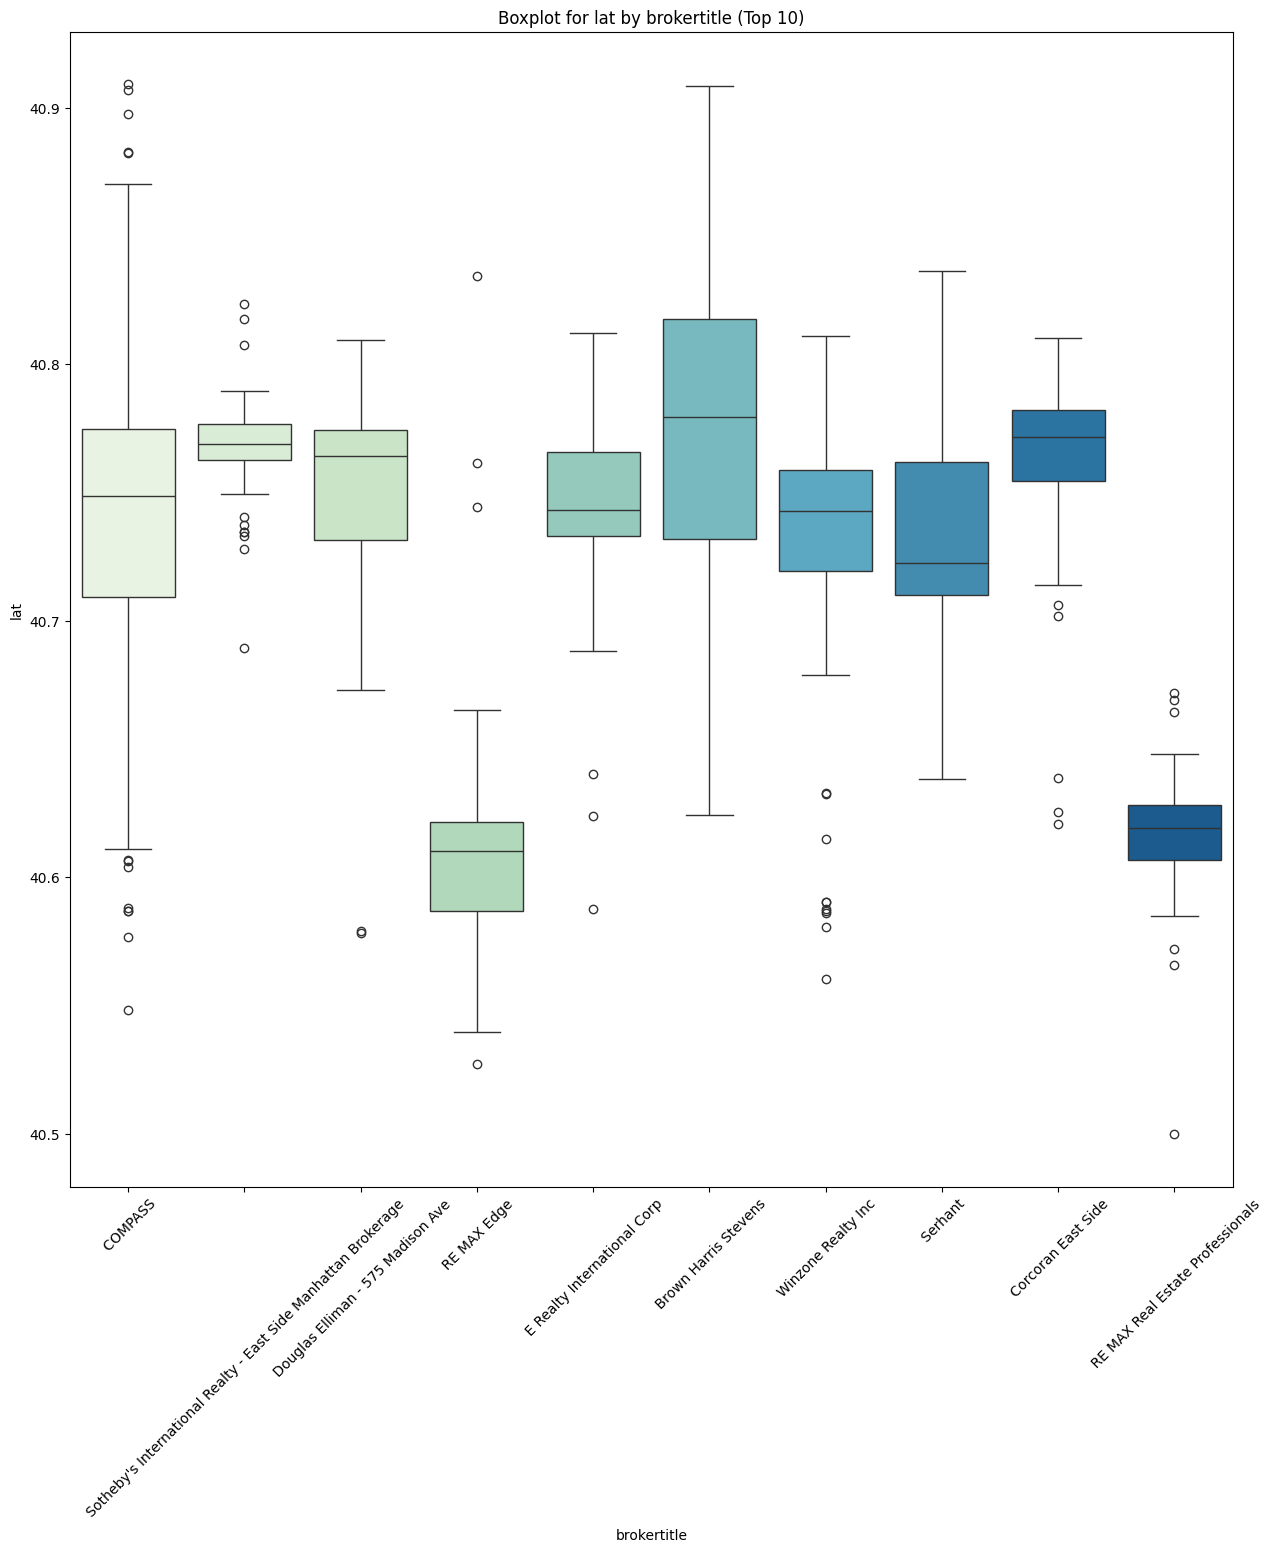

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


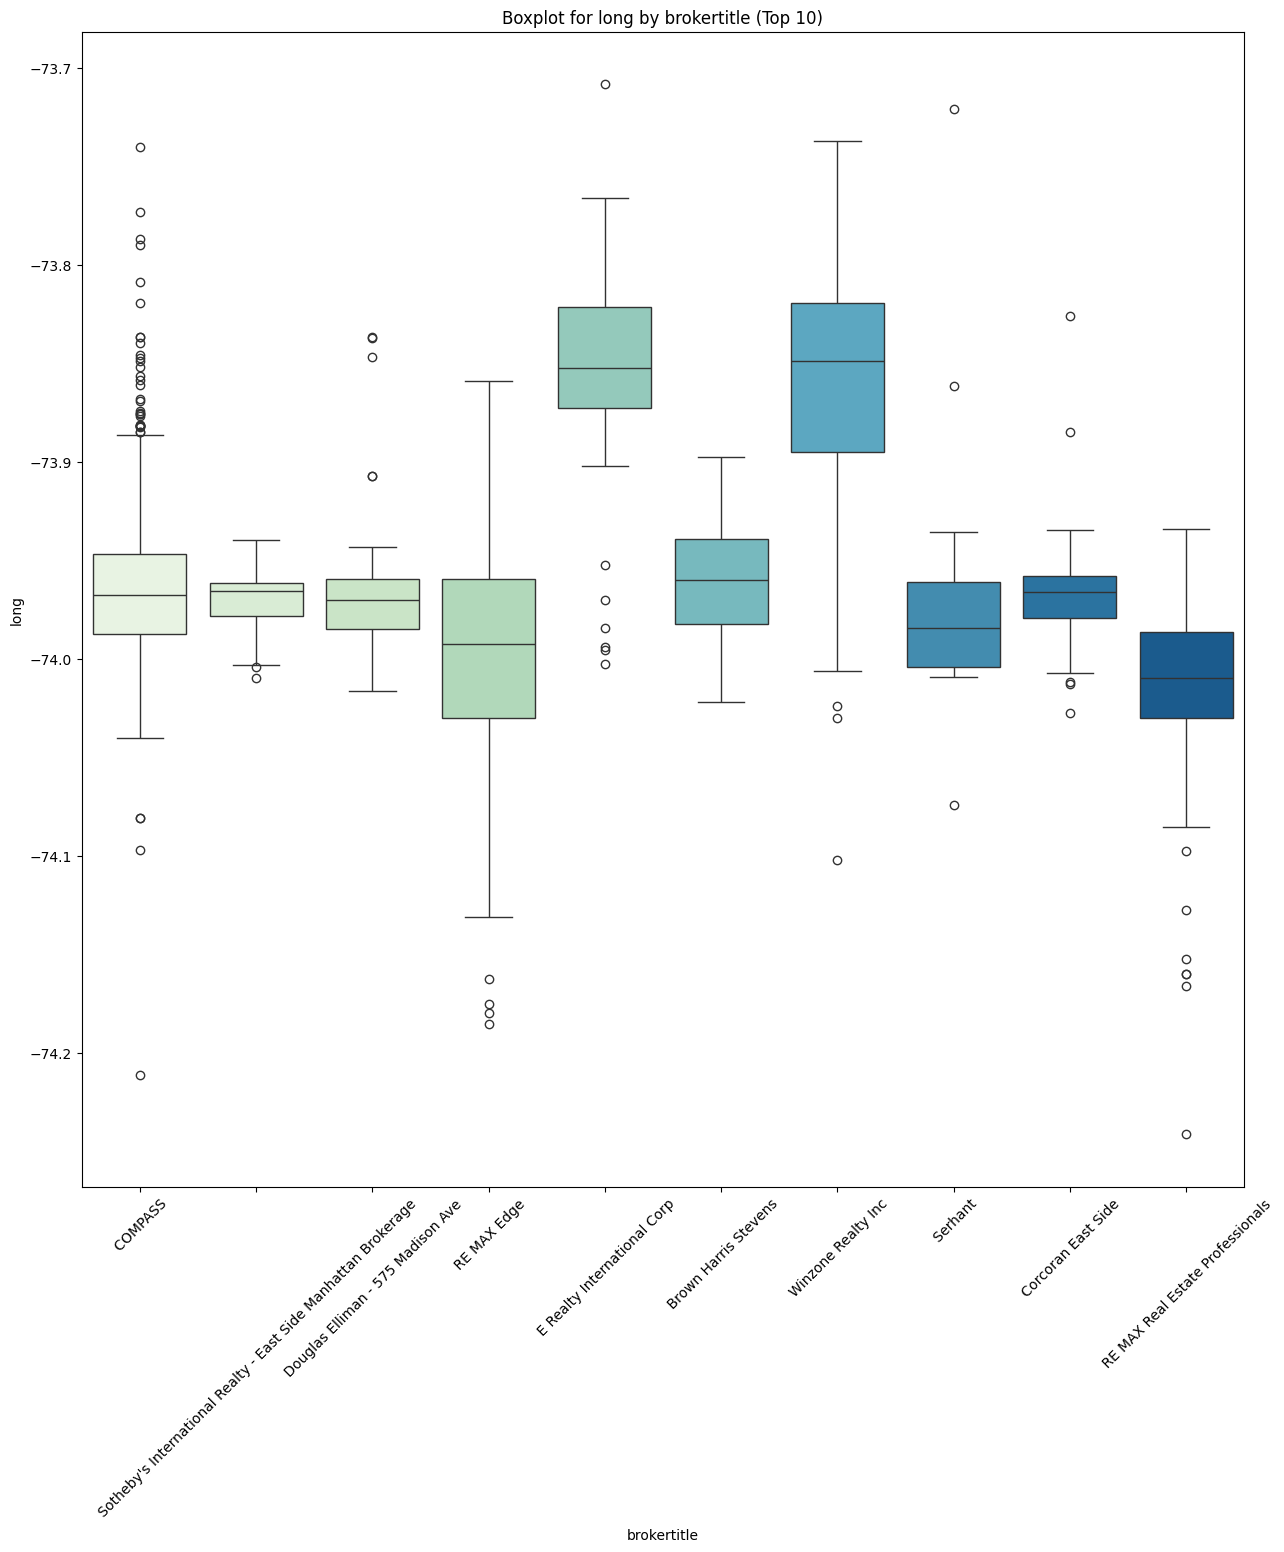

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


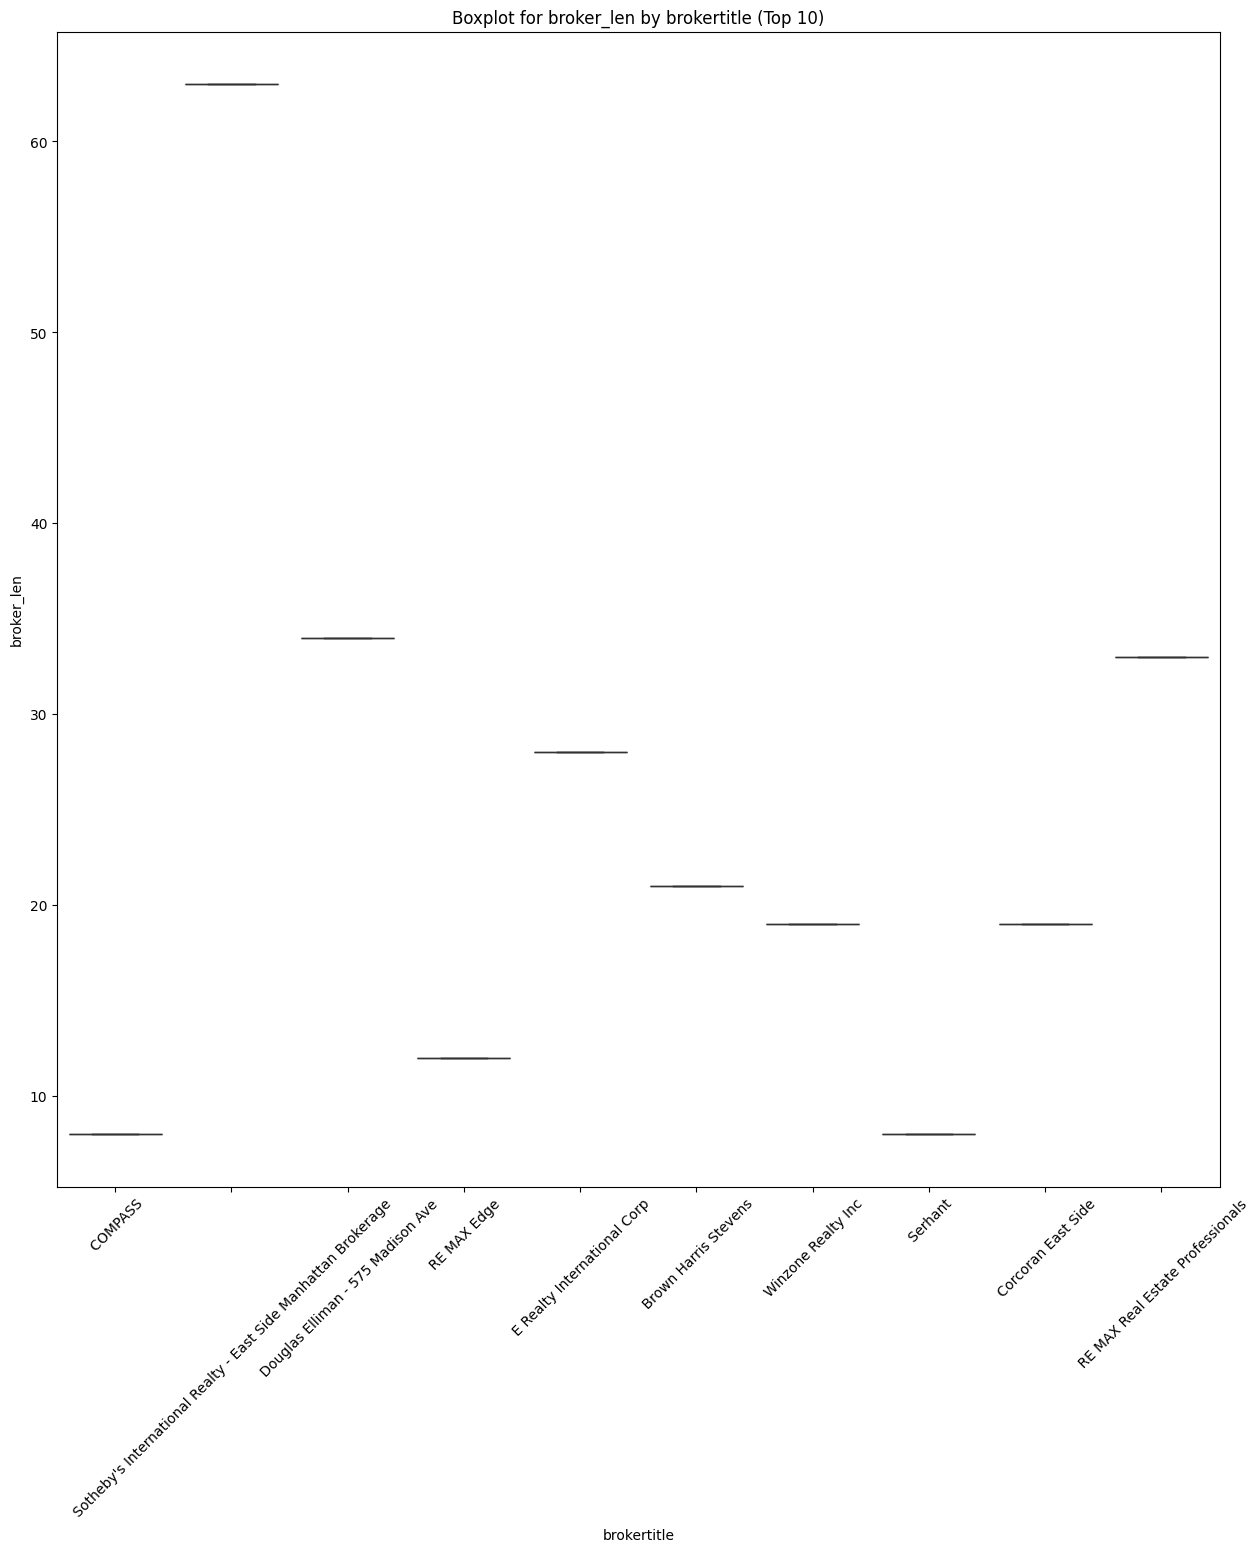

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


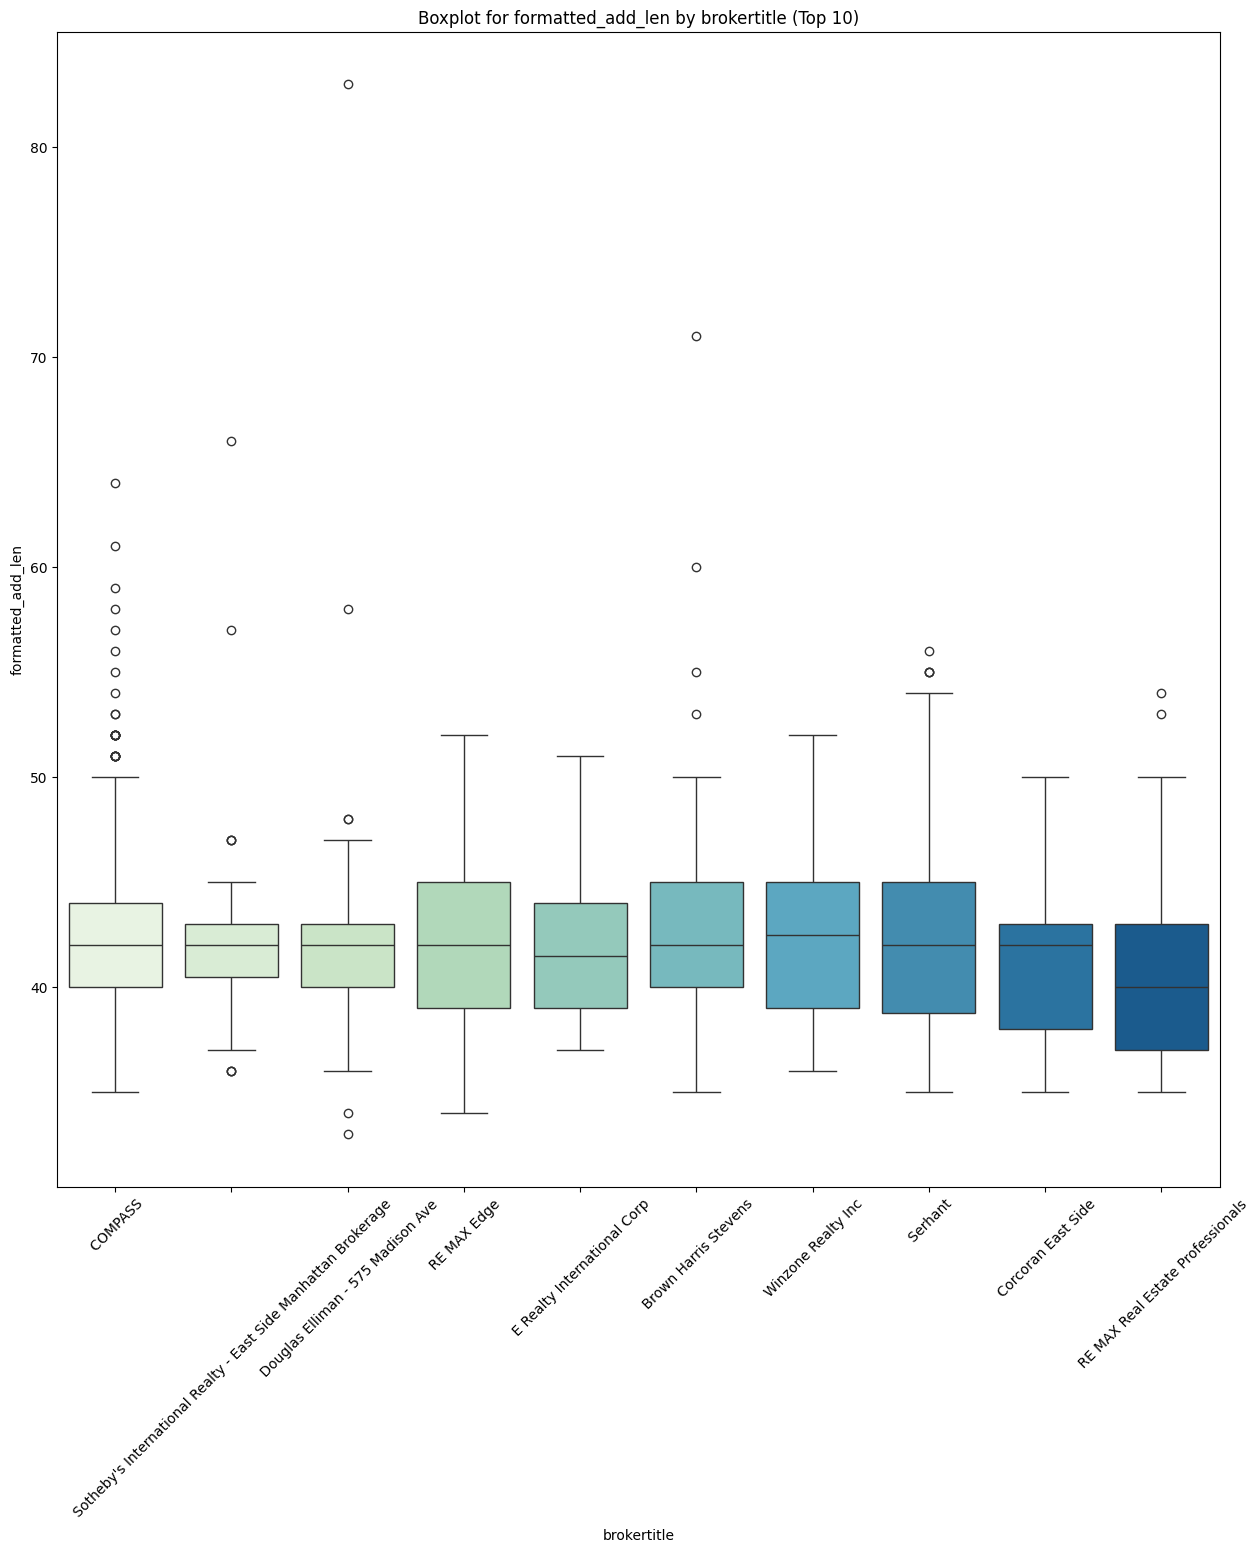

<ipython-input-160-6c983f7fa56c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')


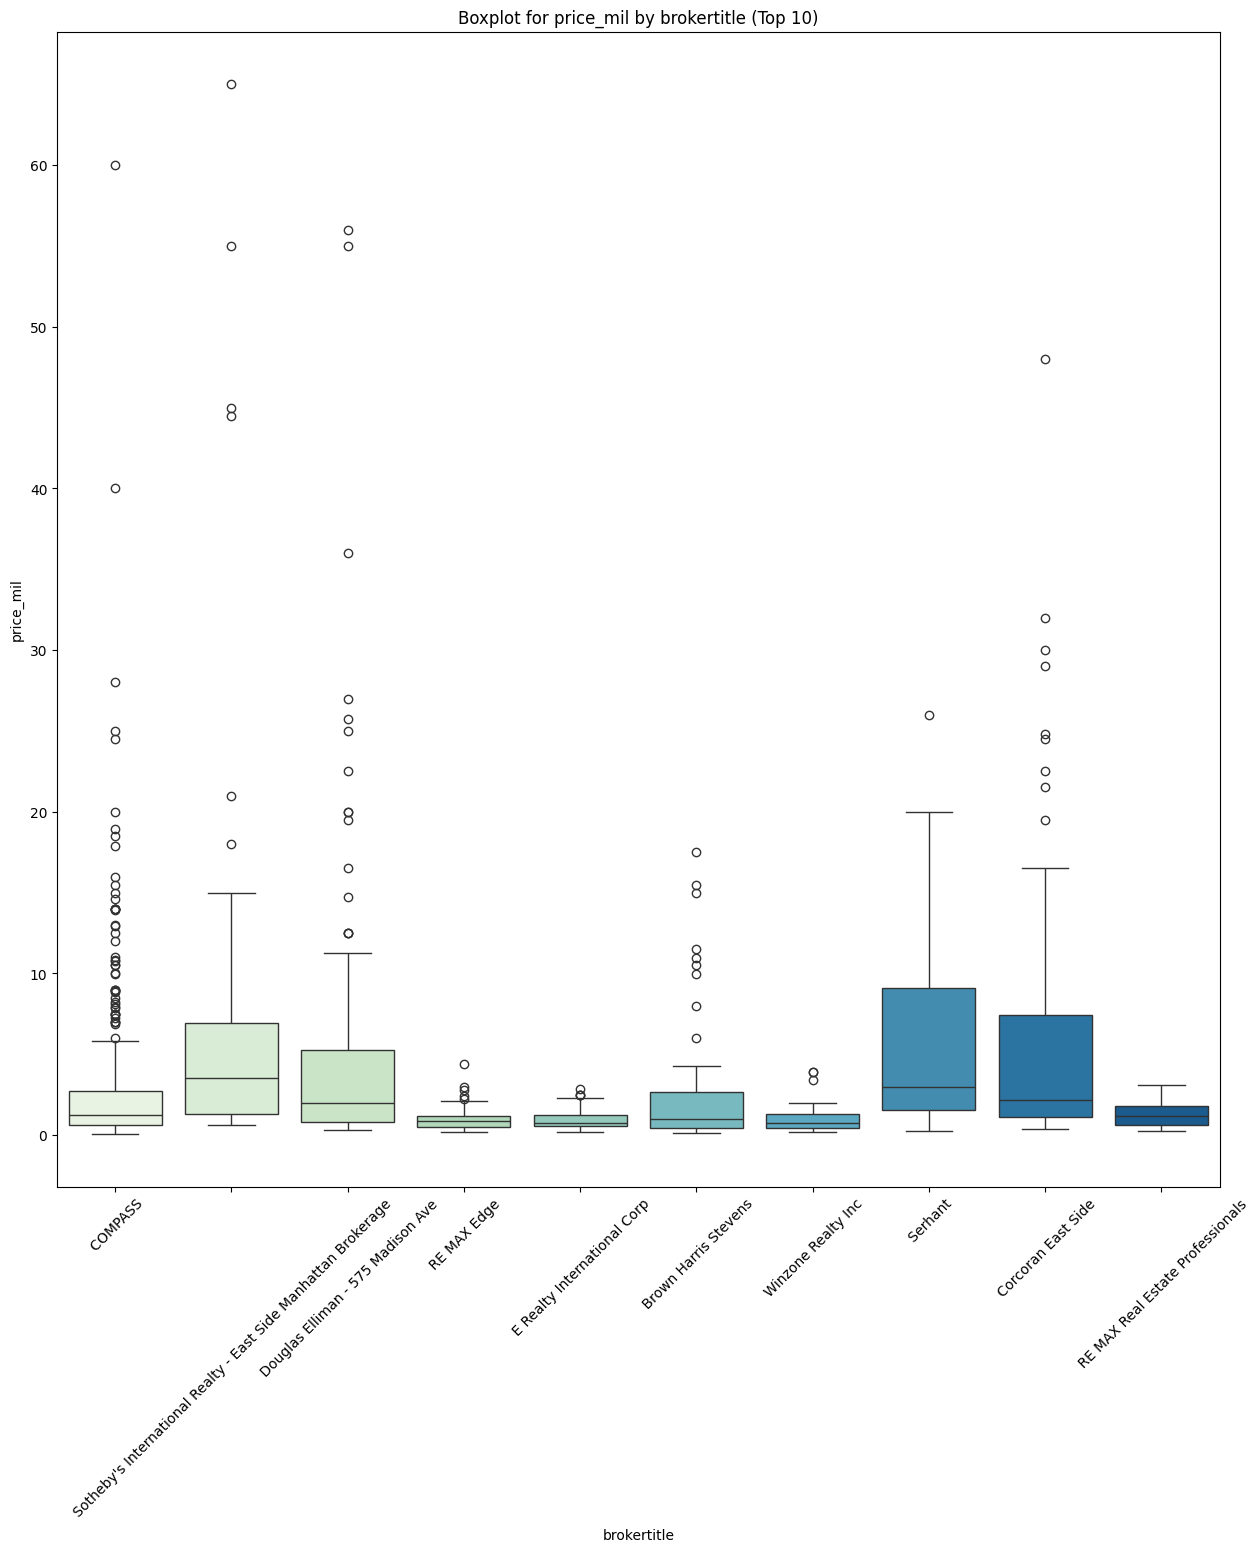

In [160]:
if 'brokertitle' in cat_df.columns:
    primary_cat = 'brokertitle'
    top_brokertitles = df[primary_cat].value_counts().iloc[:10].index

    for i in range(len(num_df.columns)):
        num = num_df.iloc[:, i]
        plt.figure(figsize=(15, 15))
        sns.boxplot(x=primary_cat, y=num, data=df[df[primary_cat].isin(top_brokertitles)], palette='GnBu')
        plt.xticks(rotation=45)
        plt.title(f'Boxplot for {num_df.columns[i]} by {primary_cat} (Top 10)')
        plt.show()

* Locality

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


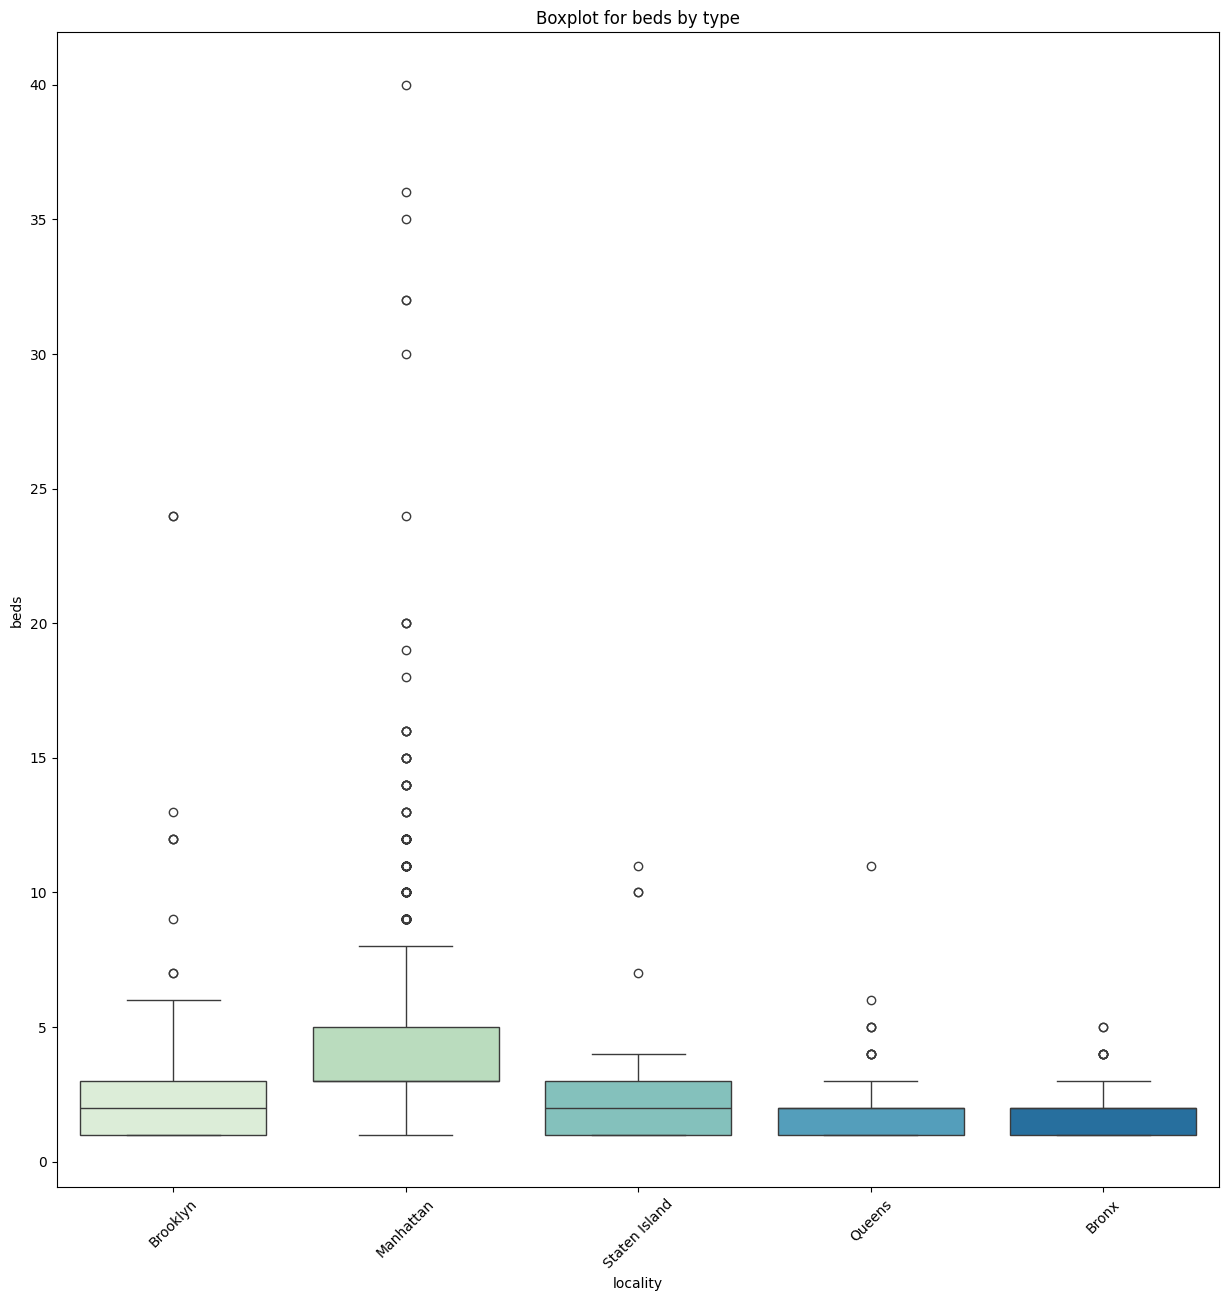

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


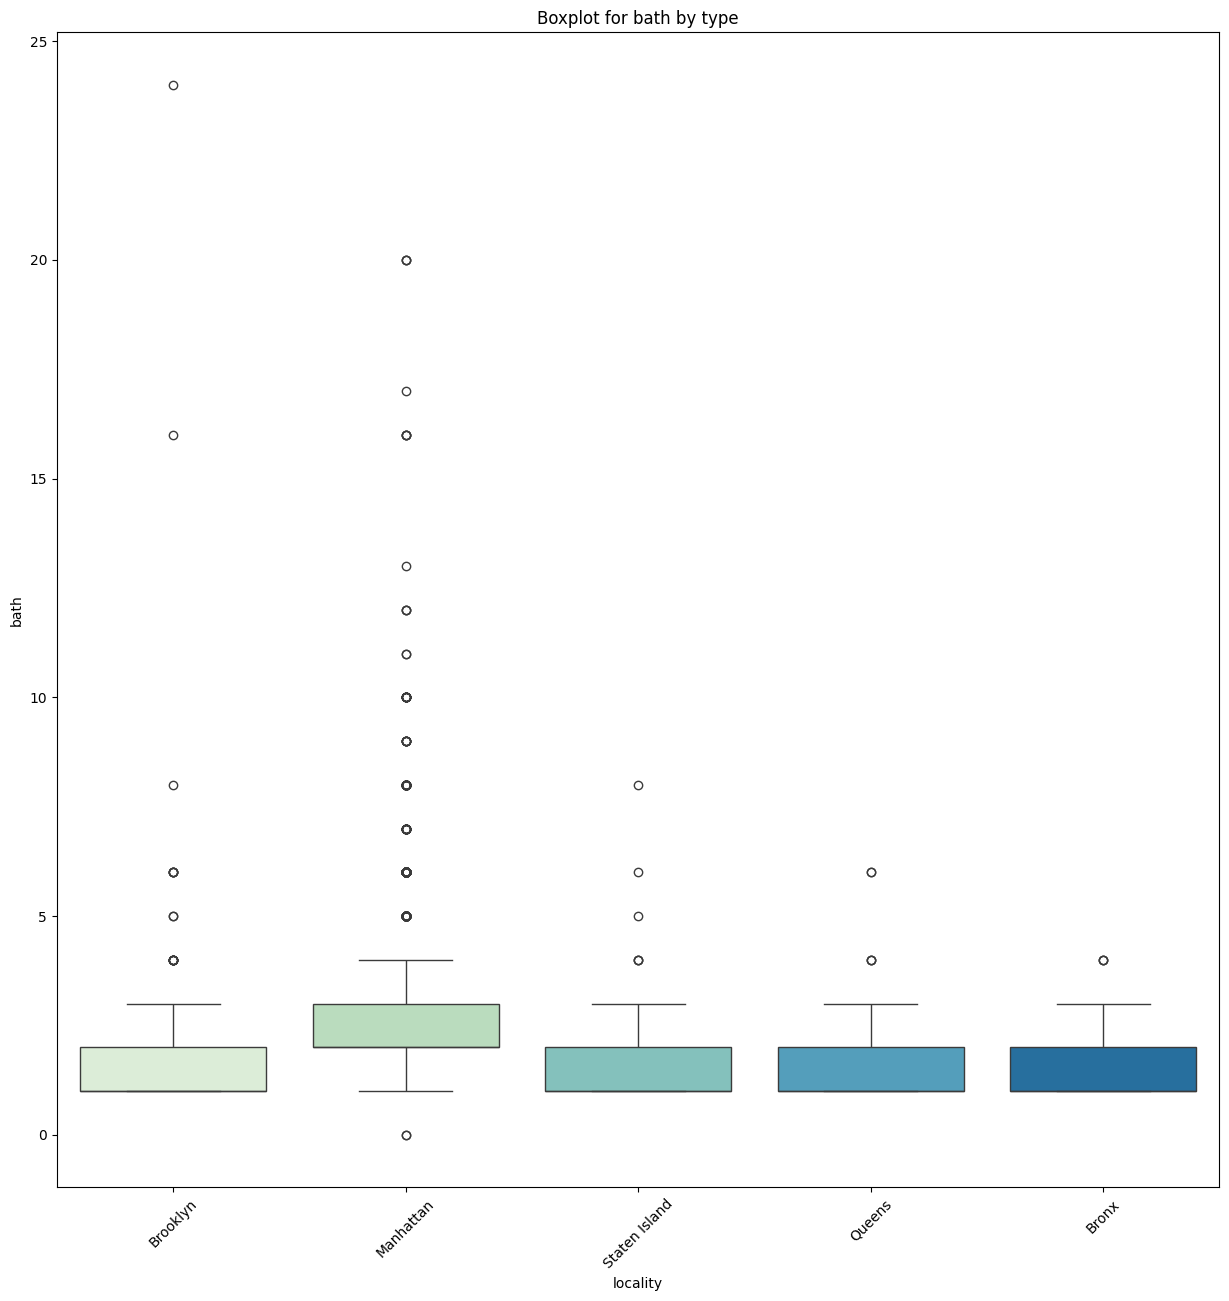

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


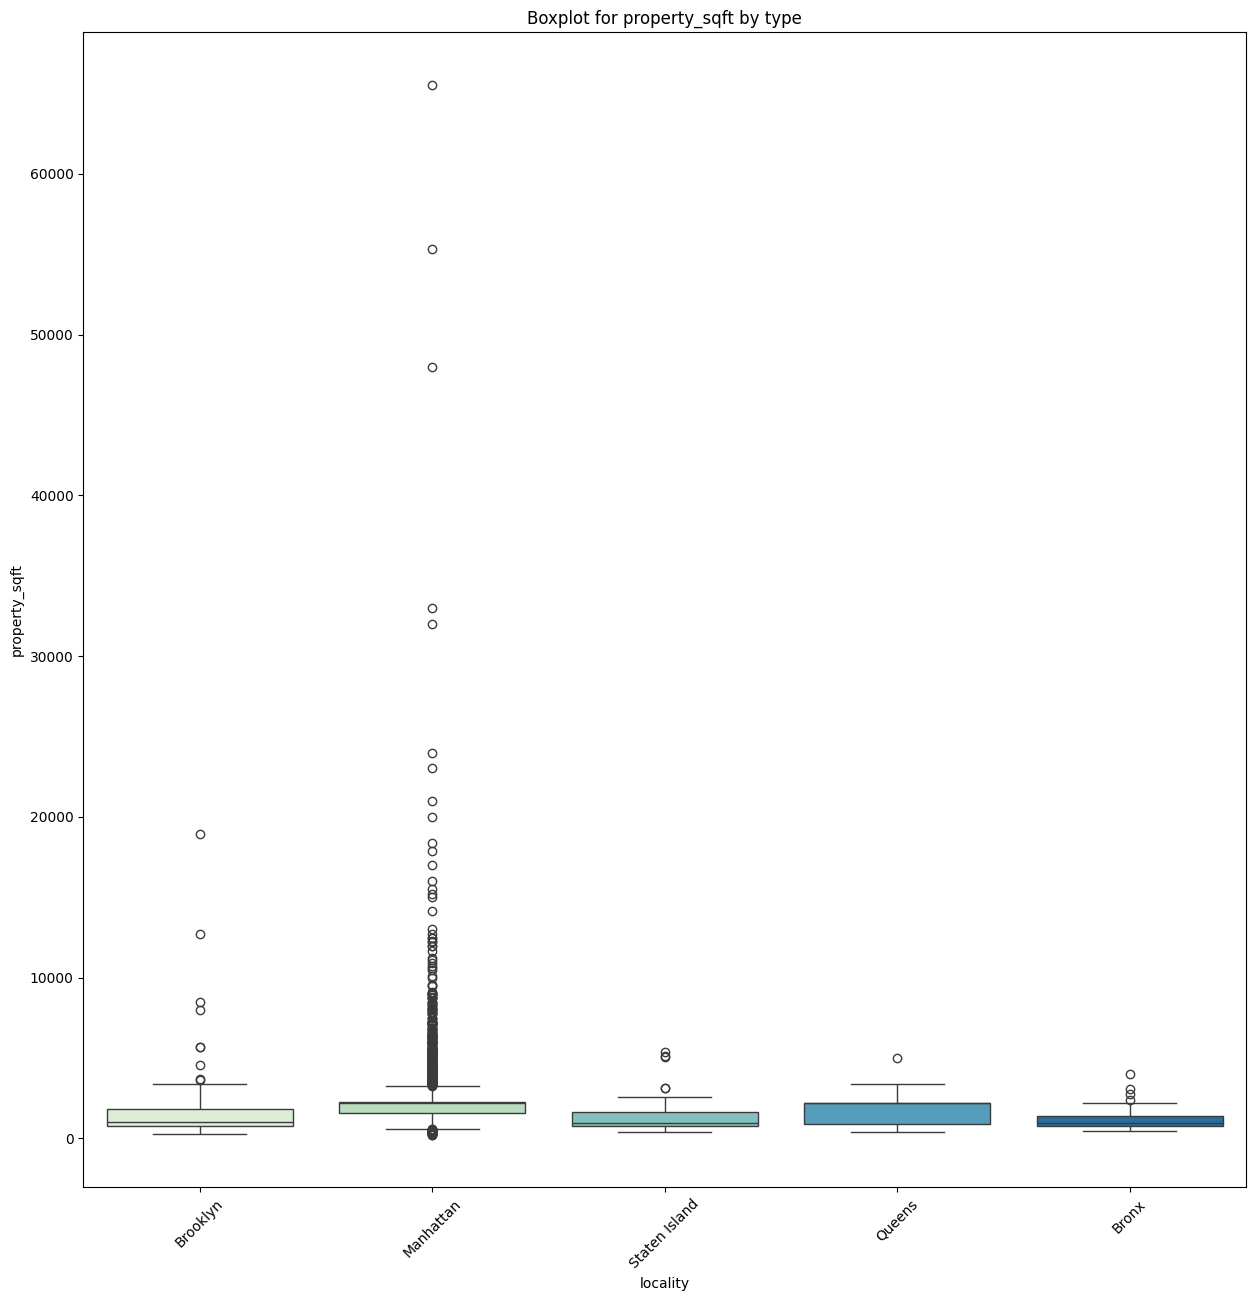

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


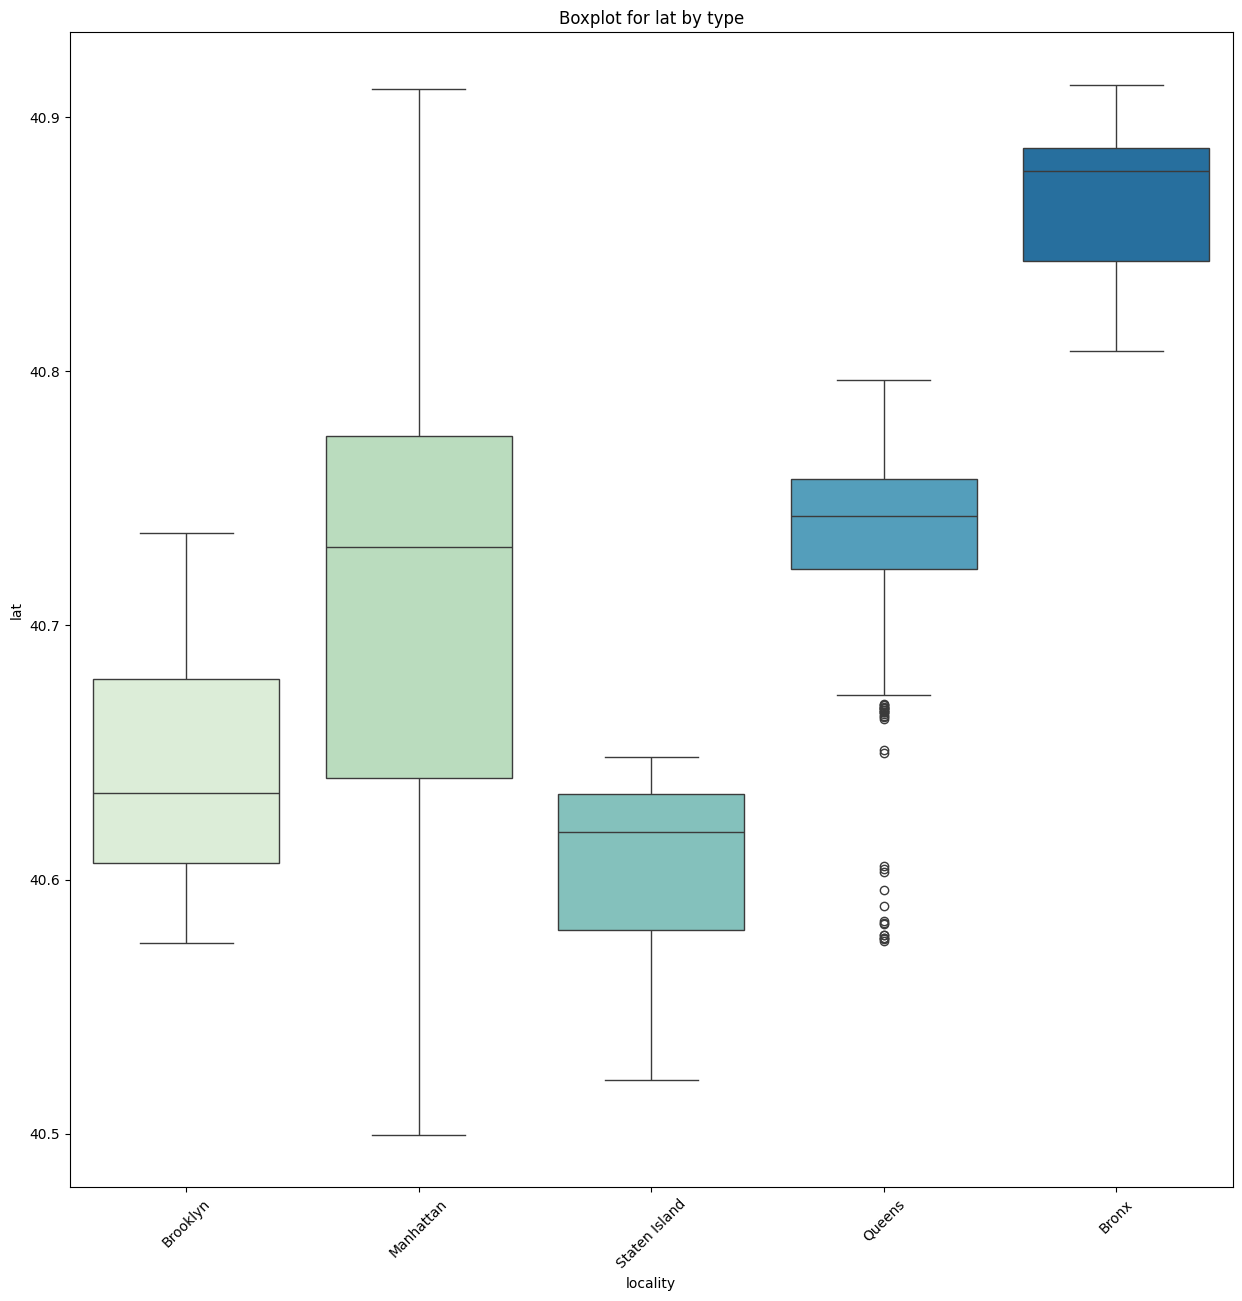

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


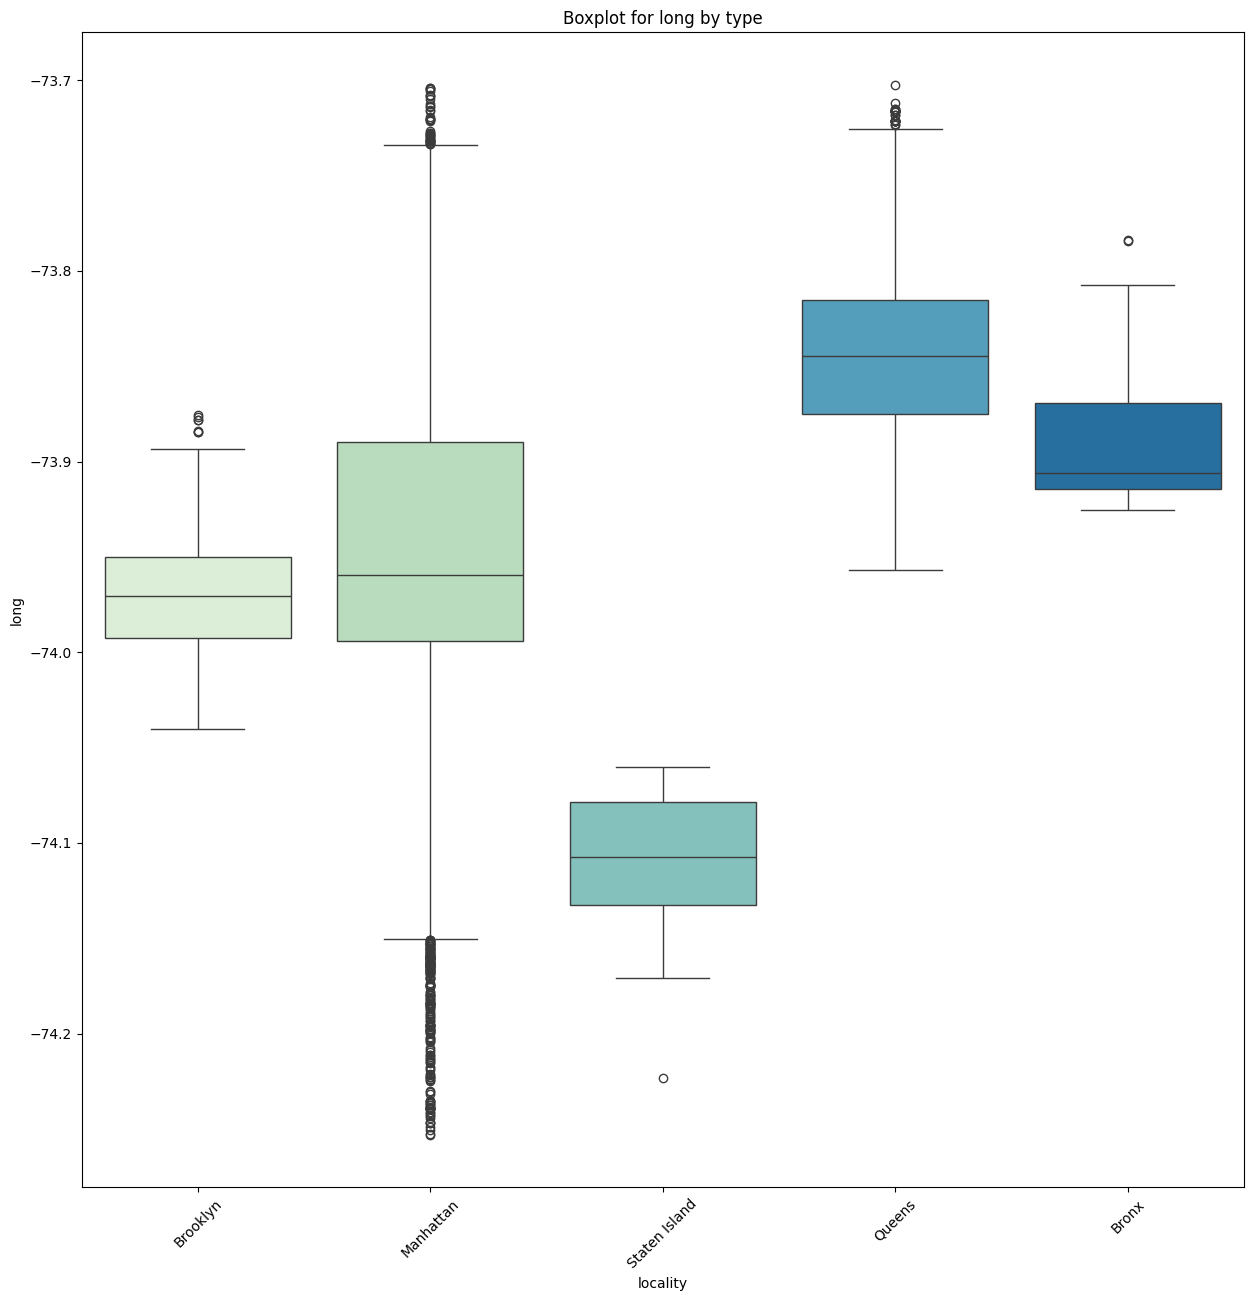

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


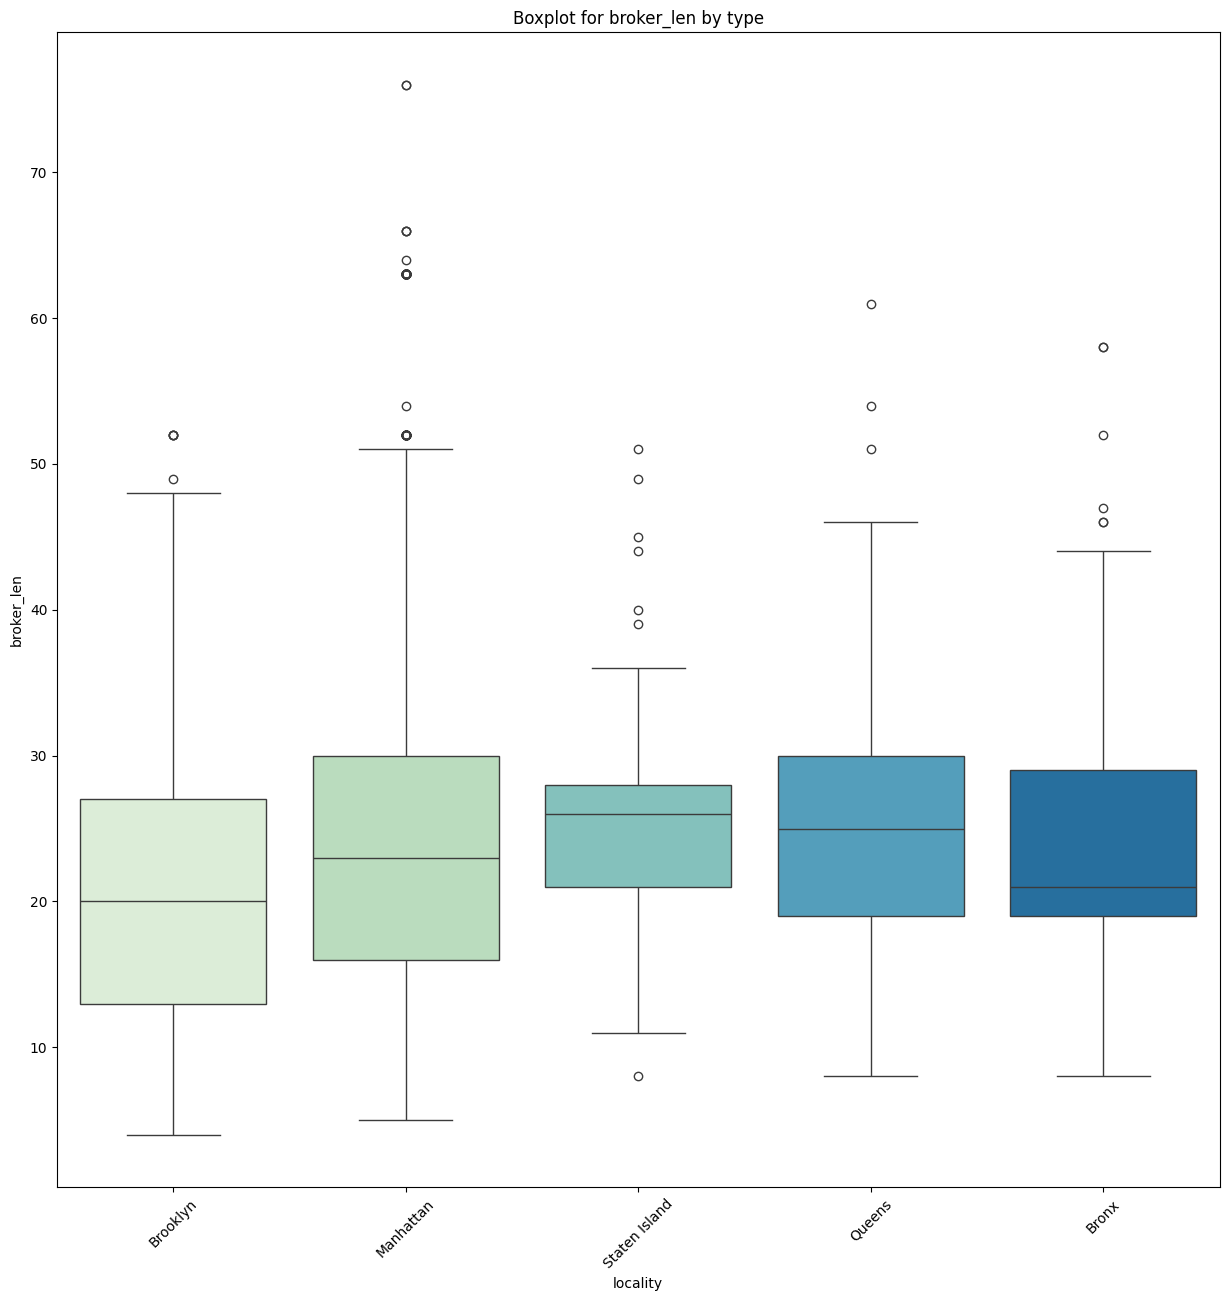

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


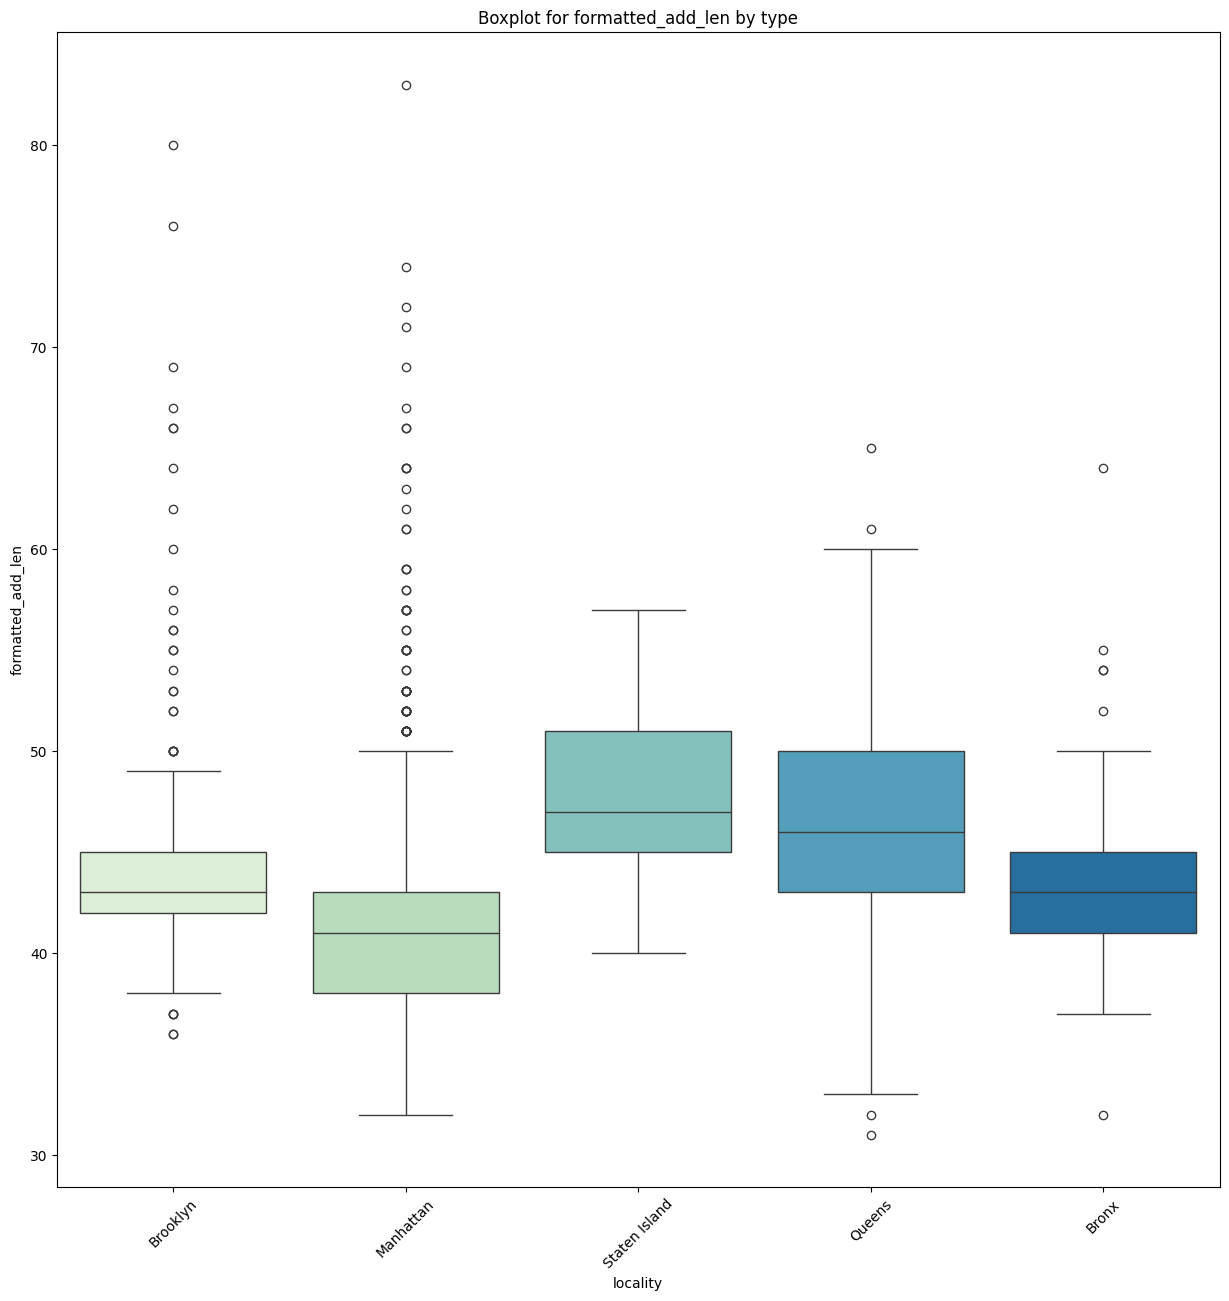

<ipython-input-161-a763d58a2196>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')


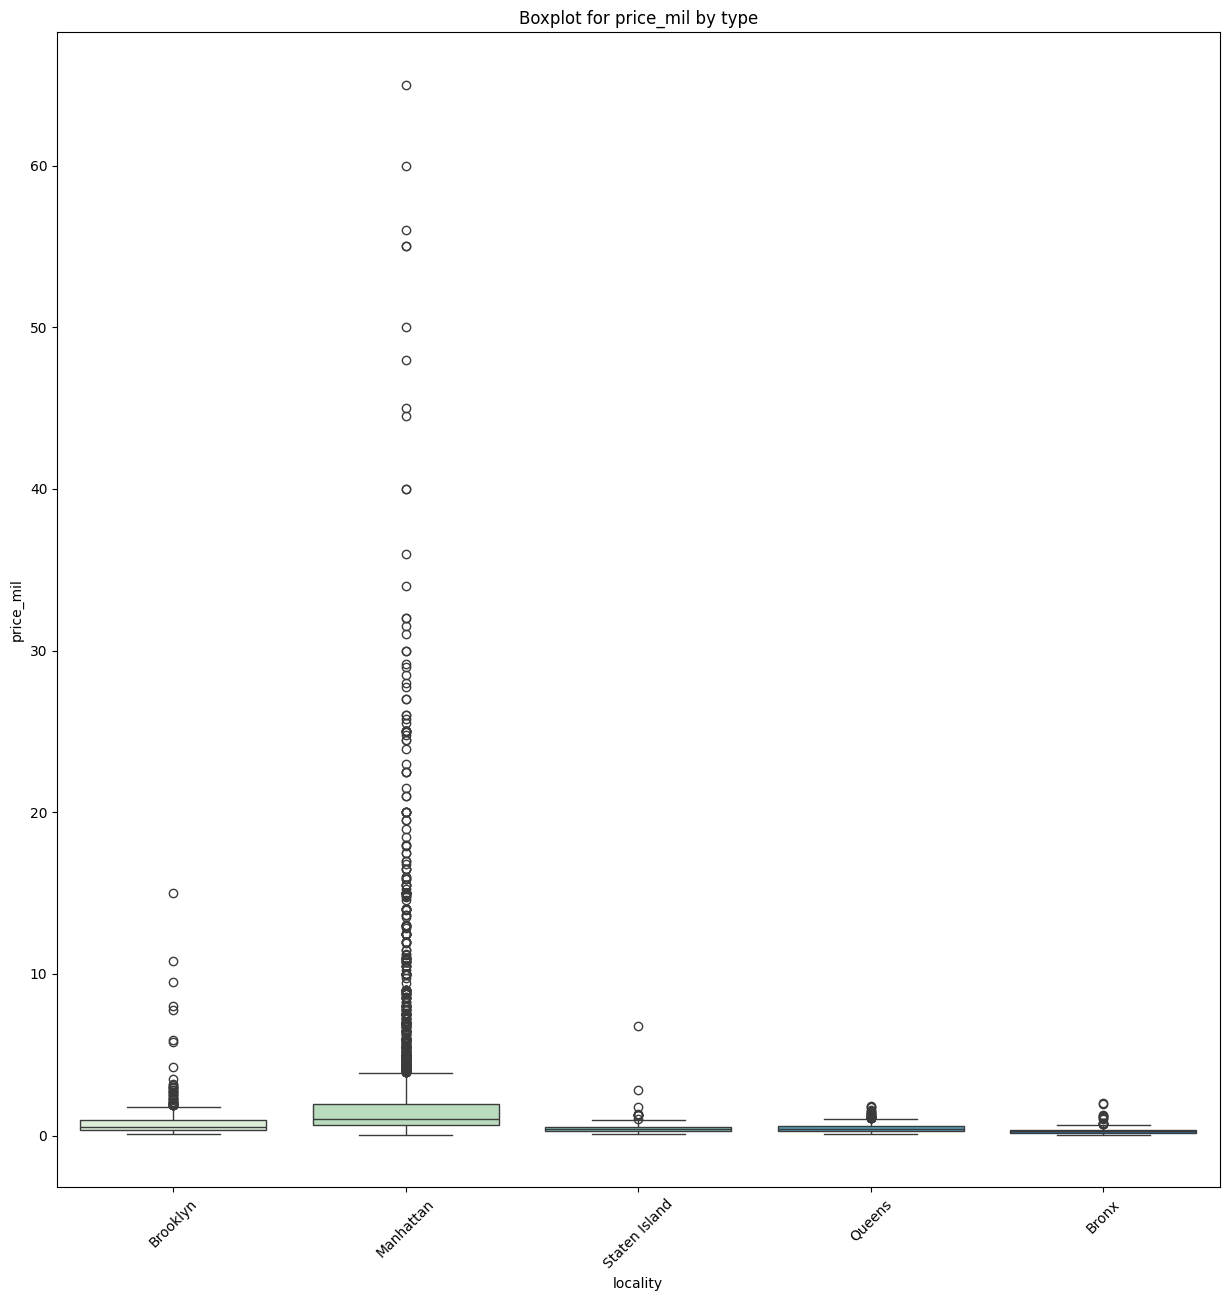

In [161]:
for i in range(len(num_df.columns)):
    num = num_df.iloc[:, i]
    plt.figure(figsize=(15, 15))
    sns.boxplot(x=cat_df.iloc[:, 2], y=num, data=df, palette='GnBu')
    plt.xticks(rotation = 45)
    plt.title(f'Boxplot for {num_df.columns[i]} by {cat_df.columns[1]}')
    plt.show()